1. IMPORTAR BIBLIOTECAS Y MÓDULOS
Selecionamos el dataset y los modulos el cual van a ser necesario para nuestros EDA
Aqui adjuntamos el Dataset que se trabajará con un problema de accidentes en la ciudad de Madrid del año 2012, el mismo que indica tanto los tipos accidentes que se produjeron como las zonas en las cuales fueron ubicadas .

In [117]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

accidentes= pd.read_excel("./Data/2012_Accidentalidad.xlsx")


2. VISUALIZACIONES Y MODIFICACIONES   
En nuestro Dataset realizaremos una modificación por un tema de mejor estética visual, la misma que se produjo el cambio de nombre de columnas 

In [118]:
accidentes_nombres = {"Nº VICTIMAS *": "N VICTIMAS", "Tipo Vehiculo": "TIPO VEHICULO", "Tramo Edad": "TRAMO EDAD"}
accidentes.rename(columns=accidentes_nombres, inplace = True)



3. VISUALIZACIÓN GENERAL DEL DATASET.  
Veremos una breve información general del dataset para deteminar si tenemos datos nulos o missing los mismo que tendremos que tratarlos en el caso de que existan, eso lo detemrinaremos mediante el metodo `info()`

In [119]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26982 entries, 0 to 26981
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FECHA               26982 non-null  datetime64[ns]
 1   RANGO HORARIO       26982 non-null  object        
 2   DIA SEMANA          26982 non-null  object        
 3   DISTRITO            26982 non-null  object        
 4   LUGAR ACCIDENTE     26982 non-null  object        
 5   Nº                  26982 non-null  object        
 6   Nº PARTE            26982 non-null  object        
 7   CPFA Granizo        26982 non-null  object        
 8   CPFA Hielo          26982 non-null  object        
 9   CPFA Lluvia         26982 non-null  object        
 10  CPFA Niebla         26982 non-null  object        
 11  CPFA Seco           26982 non-null  object        
 12  CPFA Nieve          26982 non-null  object        
 13  CPSV Mojada         26982 non-null  object    

4. UTILIZACIÓN DE FUNCIONES.  
Para este dataset se crearan un cierto tipo de funciones que ayudaran a un análisis más descriptivo y visual para la información que vamos a manejar 

In [120]:
def plot_combined_graphs(Accidentes_New, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if Accidentes_New[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(Accidentes_New[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=Accidentes_New[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

In [121]:
def pinta_distribucion_categoricas(Accidentes_New, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = Accidentes_New[col].value_counts().sum()
            serie = Accidentes_New[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = Accidentes_New[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [122]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()


def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()


def plot_combined_graphs(df, columns, whisker_width=1.5, bins = None):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0], bins= "auto" if not bins else bins)
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

def plot_grouped_boxplots(df, cat_col, num_col):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)
    group_size = 5

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=subset_df)
        plt.title(f'Boxplots of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xticks(rotation=45)
        plt.show()



def plot_grouped_histograms(df, cat_col, num_col, group_size):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        for cat in subset_cats:
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat))
        
        plt.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

 


5. ELIMINACIÓN DE COLUMNAS Y ADJUNTO DE INDICE  
Reasignaremos el dataset y lo modificaremos con eliminando dos columnas que sobre entiende la información o que otra columna las sustituye y da una información mucho más resumida y clara, para la eliminación de las mismas procedemos a realizarlo mediante el método `drop()`

In [123]:
Accidentes_New = ["LUGAR ACCIDENTE","Nº"] 
Accidentes_New = accidentes.drop(columns=Accidentes_New)
Accidentes_New.set_index("Nº PARTE", inplace= True)
Accidentes_New


FECHA     RANGO HORARIO DIA SEMANA  \
Nº PARTE                                           
2012/98  2012-01-01    DE 2:00 A 2:59    DOMINGO   
2012/98  2012-01-01    DE 2:00 A 2:59    DOMINGO   
2012/98  2012-01-01    DE 2:00 A 2:59    DOMINGO   
2012/98  2012-01-01    DE 2:00 A 2:59    DOMINGO   
2012/118 2012-01-01    DE 2:00 A 2:59    DOMINGO   
...             ...               ...        ...   
2013/173 2012-12-31  DE 21:00 A 21:59      LUNES   
2013/173 2012-12-31  DE 21:00 A 21:59      LUNES   
2013/1   2012-12-31  DE 21:00 A 21:59      LUNES   
2013/1   2012-12-31  DE 21:00 A 21:59      LUNES   
2013/13  2012-12-31  DE 23:00 A 23:59      LUNES   

                                DISTRITO CPFA Granizo CPFA Hielo CPFA Lluvia  \
Nº PARTE                                                                       
2012/98   CENTRO                                   NO         NO          NO   
2012/98   CENTRO                                   NO         NO          NO   
2012/98   CENTRO                                   NO         NO          NO   
2012/98   CENTRO                                   NO         NO          NO   
2012/118  PUENTE DE VALLECAS                       NO         NO          NO   
...                                  ...          ...        ...         ...   
2013/173  CENTRO                                   NO         NO          SI   
2013/173  CENTRO                                   NO         NO          SI   
2013/1    VILLAVERDE                               NO         NO          SI   
2013/1    VILLAVERDE                               NO         NO          SI   
2013/13   FUENCARRAL-EL PARDO                      NO         NO          SI   

         CPFA Niebla CPFA Seco CPFA Nieve  ... CPSV Grava Suelta CPSV Hielo  \
Nº PARTE                                   ...                                
2012/98           NO        SI         NO  ...                NO         NO   
2012/98           NO        SI         NO  ...                NO         NO   
2012/98           NO        SI         NO  ...                NO         NO   
2012/98           NO        SI         NO  ...                NO         NO   
2012/118          NO        SI         NO  ...                NO         NO   
...              ...       ...        ...  ...               ...        ...   
2013/173          NO        NO         NO  ...                NO         NO   
2013/173          NO        NO         NO  ...                NO         NO   
2013/1            NO        NO         NO  ...                NO         NO   
2013/1            NO        NO         NO  ...                NO         NO   
2013/13           NO        NO         NO  ...                NO         NO   

         CPSV Seca Y Limpia N VICTIMAS  \
Nº PARTE                                 
2012/98                  SI          2   
2012/98                  SI          2   
2012/98                  SI          2   
2012/98                  SI          2   
2012/118                 SI          1   
...                     ...        ...   
2013/173                 NO          1   
2013/173                 NO          1   
2013/1                   NO          1   
2013/1                   NO          1   
2013/13                  NO          1   

                                    TIPO ACCIDENTE  \
Nº PARTE                                             
2012/98   ATROPELLO                                  
2012/98   ATROPELLO                                  
2012/98   ATROPELLO                                  
2012/98   ATROPELLO                                  
2012/118  OTRAS CAUSAS                               
...                                            ...   
2013/173  ATROPELLO                                  
2013/173  ATROPELLO                                  
2013/1    CHOQUE CON OBJETO FIJO                     
2013/1    CHOQUE CON OBJETO FIJO                     
2013/13   CHOQUE CON OBJETO FIJO                     

                  

6. VISUALIZAMOS LAS COLUMNAS  
Hacemos una visualización más simplificada de nuestro dataset, el cual nos permitirá poder reconocer mejor las columnas 

In [124]:
Accidentes_New.columns

Index(['FECHA', 'RANGO HORARIO', 'DIA SEMANA', 'DISTRITO', 'CPFA Granizo',
       'CPFA Hielo', 'CPFA Lluvia', 'CPFA Niebla', 'CPFA Seco', 'CPFA Nieve',
       'CPSV Mojada', 'CPSV Aceite', 'CPSV Barro', 'CPSV Grava Suelta',
       'CPSV Hielo', 'CPSV Seca Y Limpia', 'N VICTIMAS', 'TIPO ACCIDENTE',
       'TIPO VEHICULO', 'TIPO PERSONA', 'SEXO', 'LESIVIDAD', 'TRAMO EDAD'],
      dtype='object')

7. PASOS ANTES DE ASIGNACIÓN DE VARIABLES.  
Es momento de asignar variables y lo vamos a determinar mediante la cardinalidad que tengan cada una de las columnas que nos indicará que tan fiable es esa información, cabe recalcar que gran parte de las asignaciones se basa al rol que tenga el investigador y lo que se desee buscar.
Para determinar la cardinalidad se realizará mediante una función.

In [125]:
df_tipificacion = pd.DataFrame([Accidentes_New.nunique(), Accidentes_New.nunique()/len(Accidentes_New) * 100, Accidentes_New.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

Card    %_Card            Tipo
FECHA               366   1.35646  datetime64[ns]
RANGO HORARIO        24  0.088948          object
DIA SEMANA            7  0.025943          object
DISTRITO             21   0.07783          object
CPFA Granizo          2  0.007412          object
CPFA Hielo            2  0.007412          object
CPFA Lluvia           2  0.007412          object
CPFA Niebla           2  0.007412          object
CPFA Seco             2  0.007412          object
CPFA Nieve            2  0.007412          object
CPSV Mojada           2  0.007412          object
CPSV Aceite           2  0.007412          object
CPSV Barro            2  0.007412          object
CPSV Grava Suelta     2  0.007412          object
CPSV Hielo            2  0.007412          object
CPSV Seca Y Limpia    2  0.007412          object
N VICTIMAS            8  0.029649           int64
TIPO ACCIDENTE       10  0.037062          object
TIPO VEHICULO        11  0.040768          object
TIPO PERSONA          4  0.014825          object
SEXO                  3  0.011119          object
LESIVIDAD             5  0.018531          object
TRAMO EDAD           18  0.066711          object

8.  ASIGNACIÓN Y PRIORIZACIÓN DE VARIABLES  
Priorización de variables, mediante este formato se indicarán las variables, una breve descripción, el tipo de variable a considerar y la importancia que le damos a las mismas.
Algo por destacar, es que solo existen variables categóricas, salvo una variable numérica, esto se debe al tipo de investigación, donde se busca algo más cualitativo y descrptivo.

 Nombre del campo                   | Descripción                                                                 | Tipo de variable      | Importancia Inicial |
|-----------------------------------|-----------------------------------------------------------------------------|-----------------------|---------------------|
| Fecha                             | Registro del día                                                            | Fecha                 |        2             |
| Rango Horario                     | Hora determinada que sucedio el accidente                                   | Categórica            |        1           |
| Dia de la semana                  | Dia que se produjo el incidente                                             | Categórica            |        1            |
| Distrito                          |Zona del incidente                                                           | Categórica            |        1             |
| CPFA                              | Factores Ambientales                                                        | Categórica/Binaria    |        2            |
| CPSV                              | Circunstancias que afectan el estado de la via                              | Categórica/Binaria    |        2           |
| N victimas                        | El número de los afectados en el incidente                                  | Numérica discreta     |        2             |
|Tipo de accidente                  | Descripción de los sucesos                                                  | Categórica            |        0            |
| Tipo de persona                   | Afectado-a                                                                  | Categórica            |        2            |
| Sexo                              | sexo                                                                        | Binaria               |        1            |
| Lesividad                         | Tipo de lesión                                                              | Categórica            |        0             |
| Tramo edad                        | Rango de edades del individuo                                               | Categórica            |        1            |


9. MEDIDAS DE TENDENCIA CENTRAL.    
La media y la mediana no indican un analisis claro debido al manejo de información numérica que se esta observando, ya que existen distancias grandes por ejemplo el numero max de esta variable numérica sobrepasa los valores que indican una tendencia general 

In [126]:
#OBSERVACIÓN DE LA VARIABLE NUMÉRICA 
Accidentes_New["N VICTIMAS"].describe()

count    26982.000000
mean         1.473871
std          0.940920
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: N VICTIMAS, dtype: float64

NOTA:  
A pesar de solo tener una variable numérica, no nos dice mucho al hecho de infirmación que está manejando, es cierto que su nombre indica una importancia alta, pero el tema de sus valores, no nos sirven para poder sacar una infirmación mucho más clara 

10. CATEGÓRICAS 
Mediante la moda en las variables categóricas se puede ver en un analisis breve como es el patrón más recurrente de los accidentes 

In [127]:
categoricas = ['RANGO HORARIO', 'DIA SEMANA', 'DISTRITO', 'CPFA Granizo',
       'CPFA Hielo', 'CPFA Lluvia', 'CPFA Niebla', 'CPFA Seco', 'CPFA Nieve',
       'CPSV Mojada', 'CPSV Aceite', 'CPSV Barro', 'CPSV Grava Suelta',
       'CPSV Hielo', 'CPSV Seca Y Limpia', 'TIPO ACCIDENTE',
       'TIPO VEHICULO', 'TIPO PERSONA', 'SEXO', 'LESIVIDAD', 'TRAMO EDAD']

In [128]:
Accidentes_New[categoricas].mode().T

0
RANGO HORARIO                               DE 19:00 A 19:59
DIA SEMANA                                           VIERNES
DISTRITO                      SALAMANCA                     
CPFA Granizo                                              NO
CPFA Hielo                                                NO
CPFA Lluvia                                               NO
CPFA Niebla                                               NO
CPFA Seco                                                 SI
CPFA Nieve                                                NO
CPSV Mojada                                               NO
CPSV Aceite                                               NO
CPSV Barro                                                NO
CPSV Grava Suelta                                         NO
CPSV Hielo                                                NO
CPSV Seca Y Limpia                                        SI
TIPO ACCIDENTE      COLISIÓN DOBLE                          
TIPO VEHICULO       TURISMO                                 
TIPO PERSONA                                       CONDUCTOR
SEXO                                                  HOMBRE
LESIVIDAD           IL                                      
TRAMO EDAD                                   DE 30 A 34 ANOS

NOTA:  
Por medio de la moda indicamos que los accidentes en madrid del año 2012 se desenvuelen entre los días viernes en el distrito de Salamanca en un rango de hora de 19:00 a 19:59 donde es ocacionado por el conductor en un tipo de veiículo de turismo donde se produce una colisión doble y que la mayoría de los casos salen ilesos
Pero, ¿Esto es totalmente certero para poder indicar nuestras hipotesis, esto representa algo?, a simple vista si. pero no es una realidad absoluta.

11. FRECUENCIA RELATIVA PARA LAS CATEGORÍAS.  
Sacaremos las frecuencias relativas para cada categoría las mismas que nos determinaran el porcentaje de frecuencia que aparece ese valor por cada una de las columnas, eso determinaremos por medio de una función la cual recorrerá cada uno de los valores de las colummnas sacando su valor con `value_counts()`y multiplicandolo por cien

In [129]:
for catego in categoricas:
    print (f"Para {catego}")
    print(Accidentes_New[catego].value_counts()/len(Accidentes_New)*100)
    print("\n"*2)

Para RANGO HORARIO
RANGO HORARIO
DE 19:00 A 19:59    7.471648
DE 20:00 A 20:59    6.693351
DE 18:00 A 18:59    6.674820
DE 14:00 A 14:59    6.404270
DE 13:00 A 13:59    6.322734
DE 12:00 A 12:59    6.122600
DE 9:00 A 9:59      5.826106
DE 17:00 A 17:59    5.774220
DE 21:00 A 21:59    5.362834
DE 16:00 A 16:59    5.222000
DE 15:00 A 15:59    5.021866
DE 10:00 A 10:59    4.999629
DE 11:00 A 11:59    4.966274
DE 8:00 A 8:59      4.380698
DE 22:00 A 22:59    3.672819
DE 23:00 A 23:59    3.124305
DE 7:00 A 7:59      2.472018
DE 00:00 A 00:59    1.797495
DE 6:00 A 6:59      1.753021
DE 1:00 A 1:59      1.567712
DE 2:00 A 2:59      1.293455
DE 5:00 A 5:59      1.156326
DE 4:00 A 4:59      0.978430
DE 3:00 A 3:59      0.941368
Name: count, dtype: float64



Para DIA SEMANA
DIA SEMANA
VIERNES      16.985398
JUEVES       16.251575
MIERCOLES    14.880291
MARTES       14.861760
LUNES        13.909273
SABADO       12.256319
DOMINGO      10.855385
Name: count, dtype: float64



Para DISTRITO
DISTRIT

12. VISUALIZACIÓN DE LA FRECUENCIA RELATIVA (ANALISIS DE VARIABLES)
Vemos la realidad de la distribución de los valores de cada variable las cuales puede sacar una idea un poco más clara, por ejemplo poblaciones de las variables como las de tipo de persona( Conductor), Sexo (Hombre), lesividad (IL, HL), representan un gran porcentaje en cada una de sus columnas y no tienen una igualdad por decirlo en cierta manera.

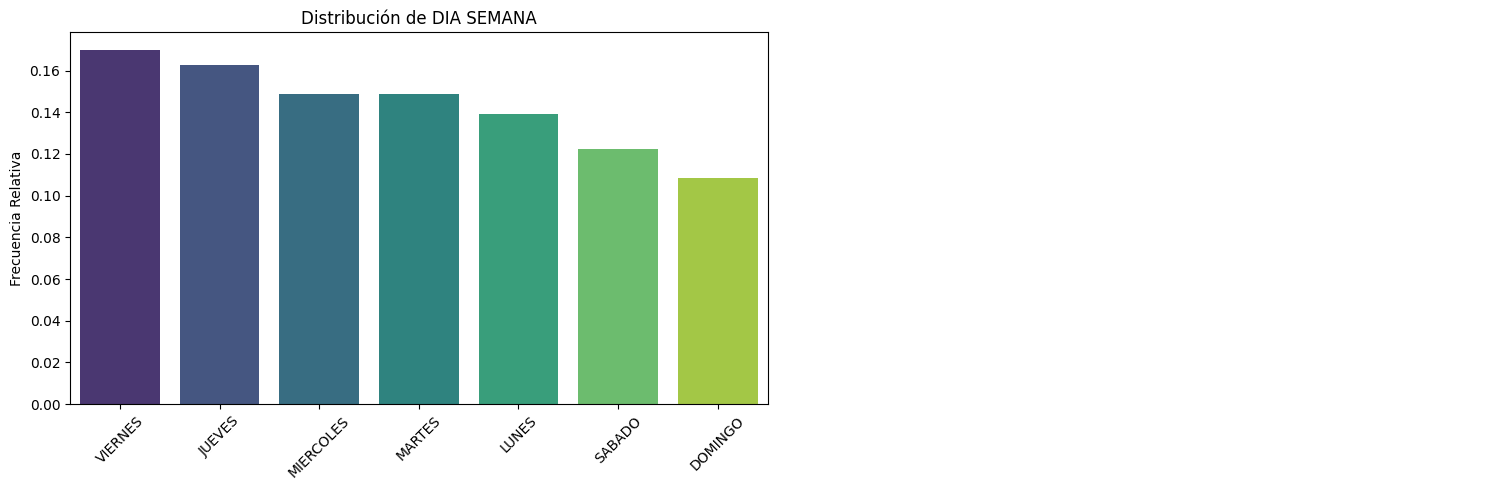

In [130]:
pinta_distribucion_categoricas(Accidentes_New,["DIA SEMANA"],relativa= True)

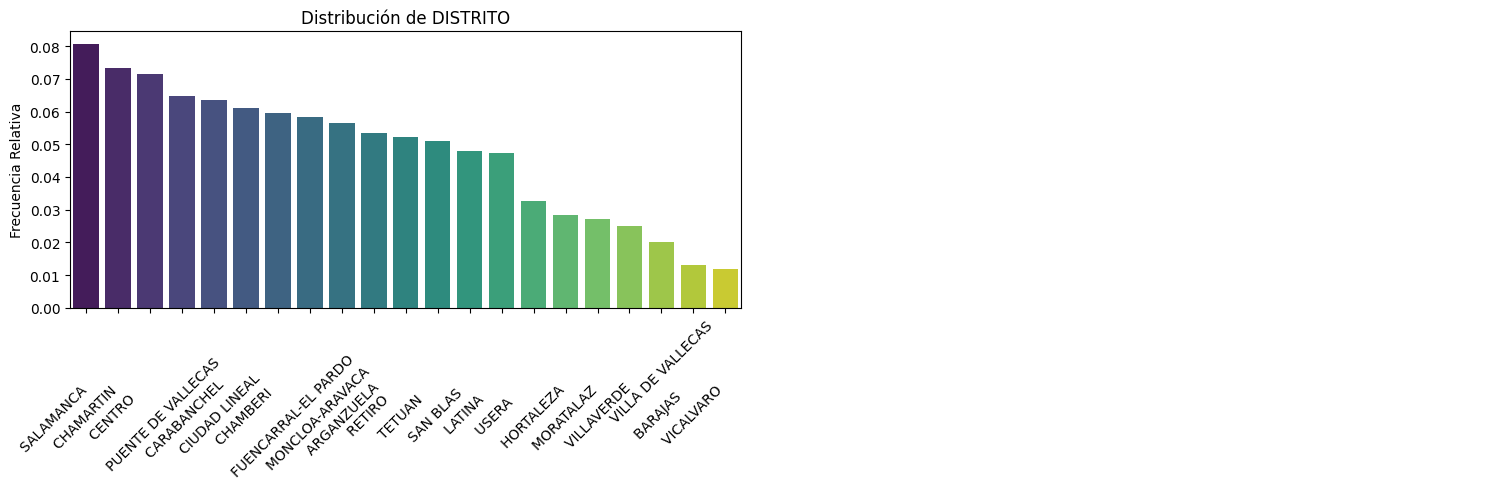

In [131]:
pinta_distribucion_categoricas(Accidentes_New,["DISTRITO"],relativa= True)

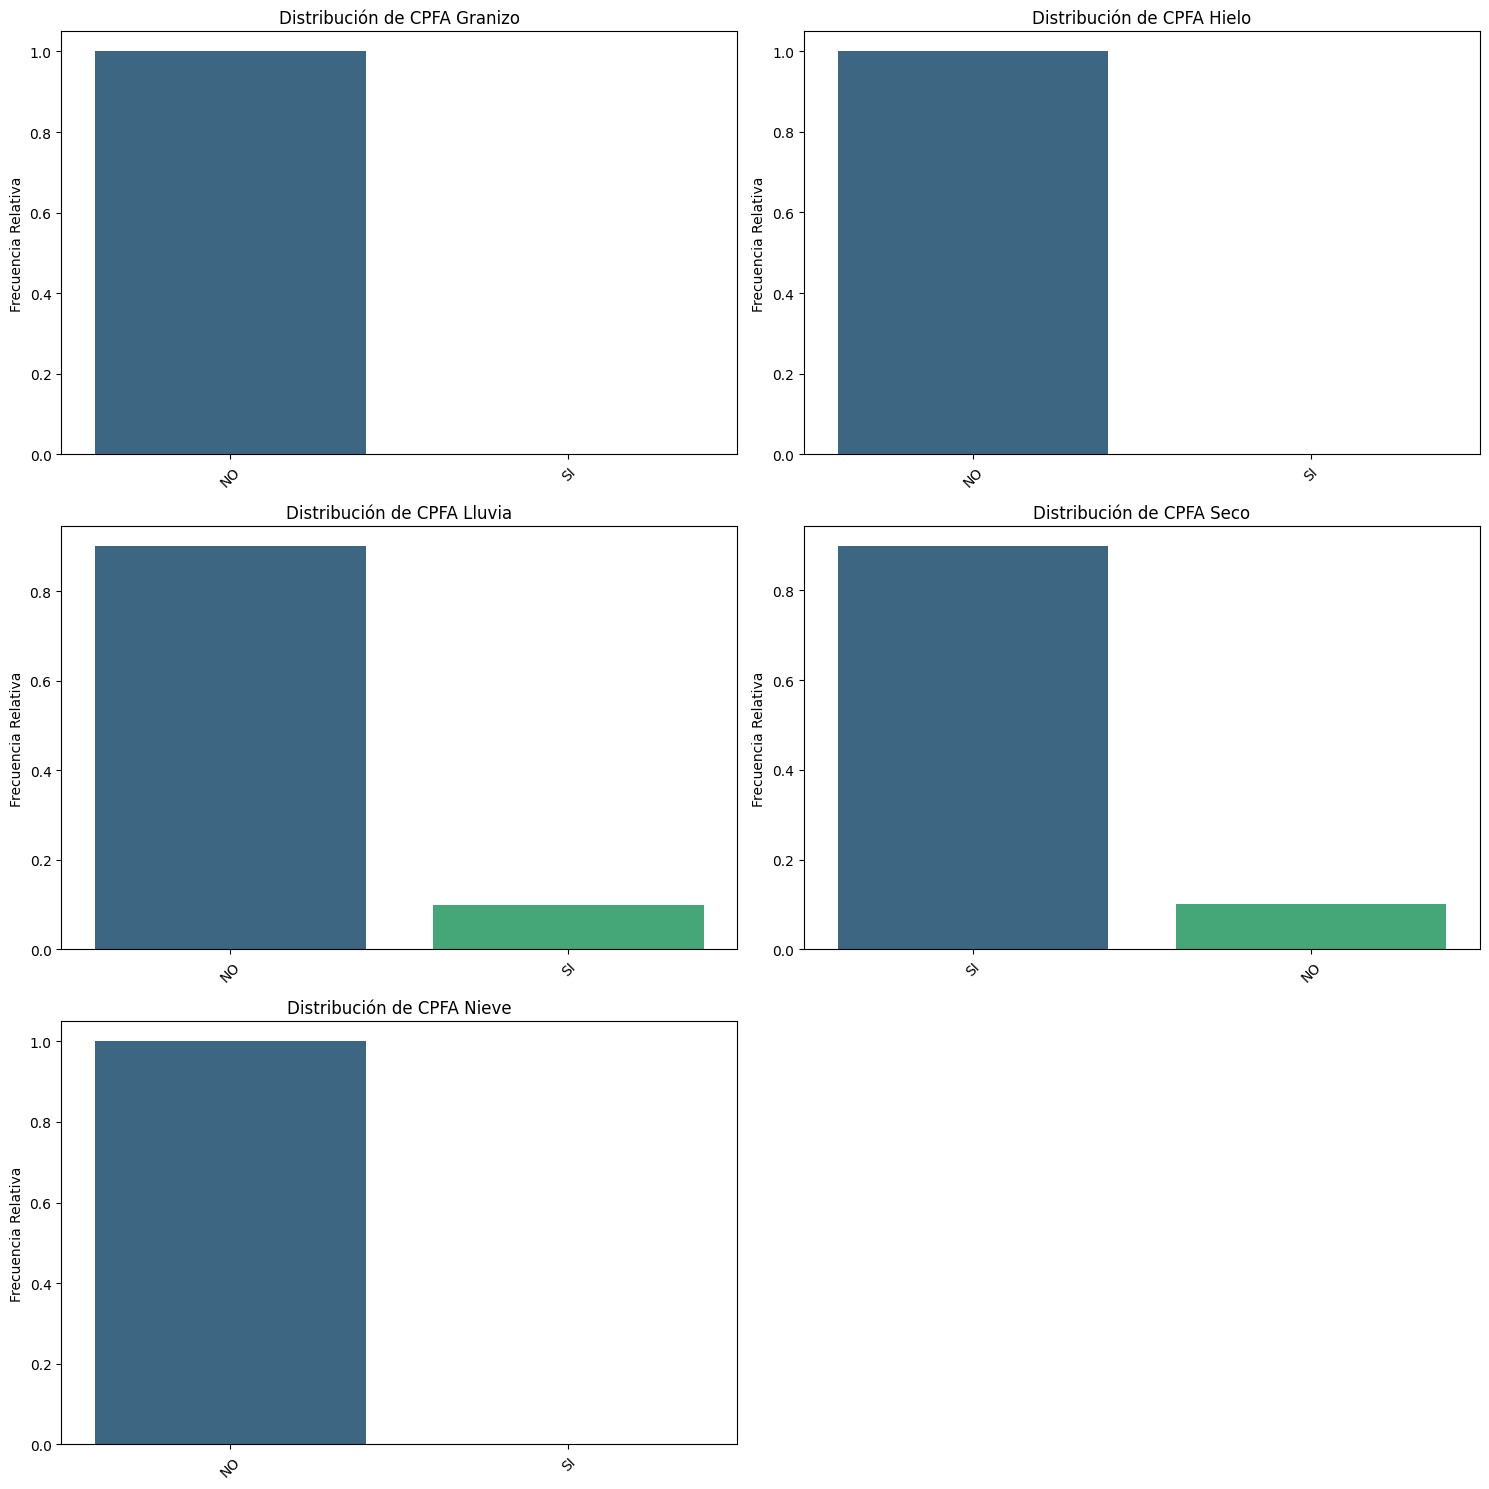

In [132]:
pinta_distribucion_categoricas(Accidentes_New,["CPFA Granizo", "CPFA Hielo", "CPFA Lluvia","CPFA Seco","CPFA Nieve"],relativa= True)

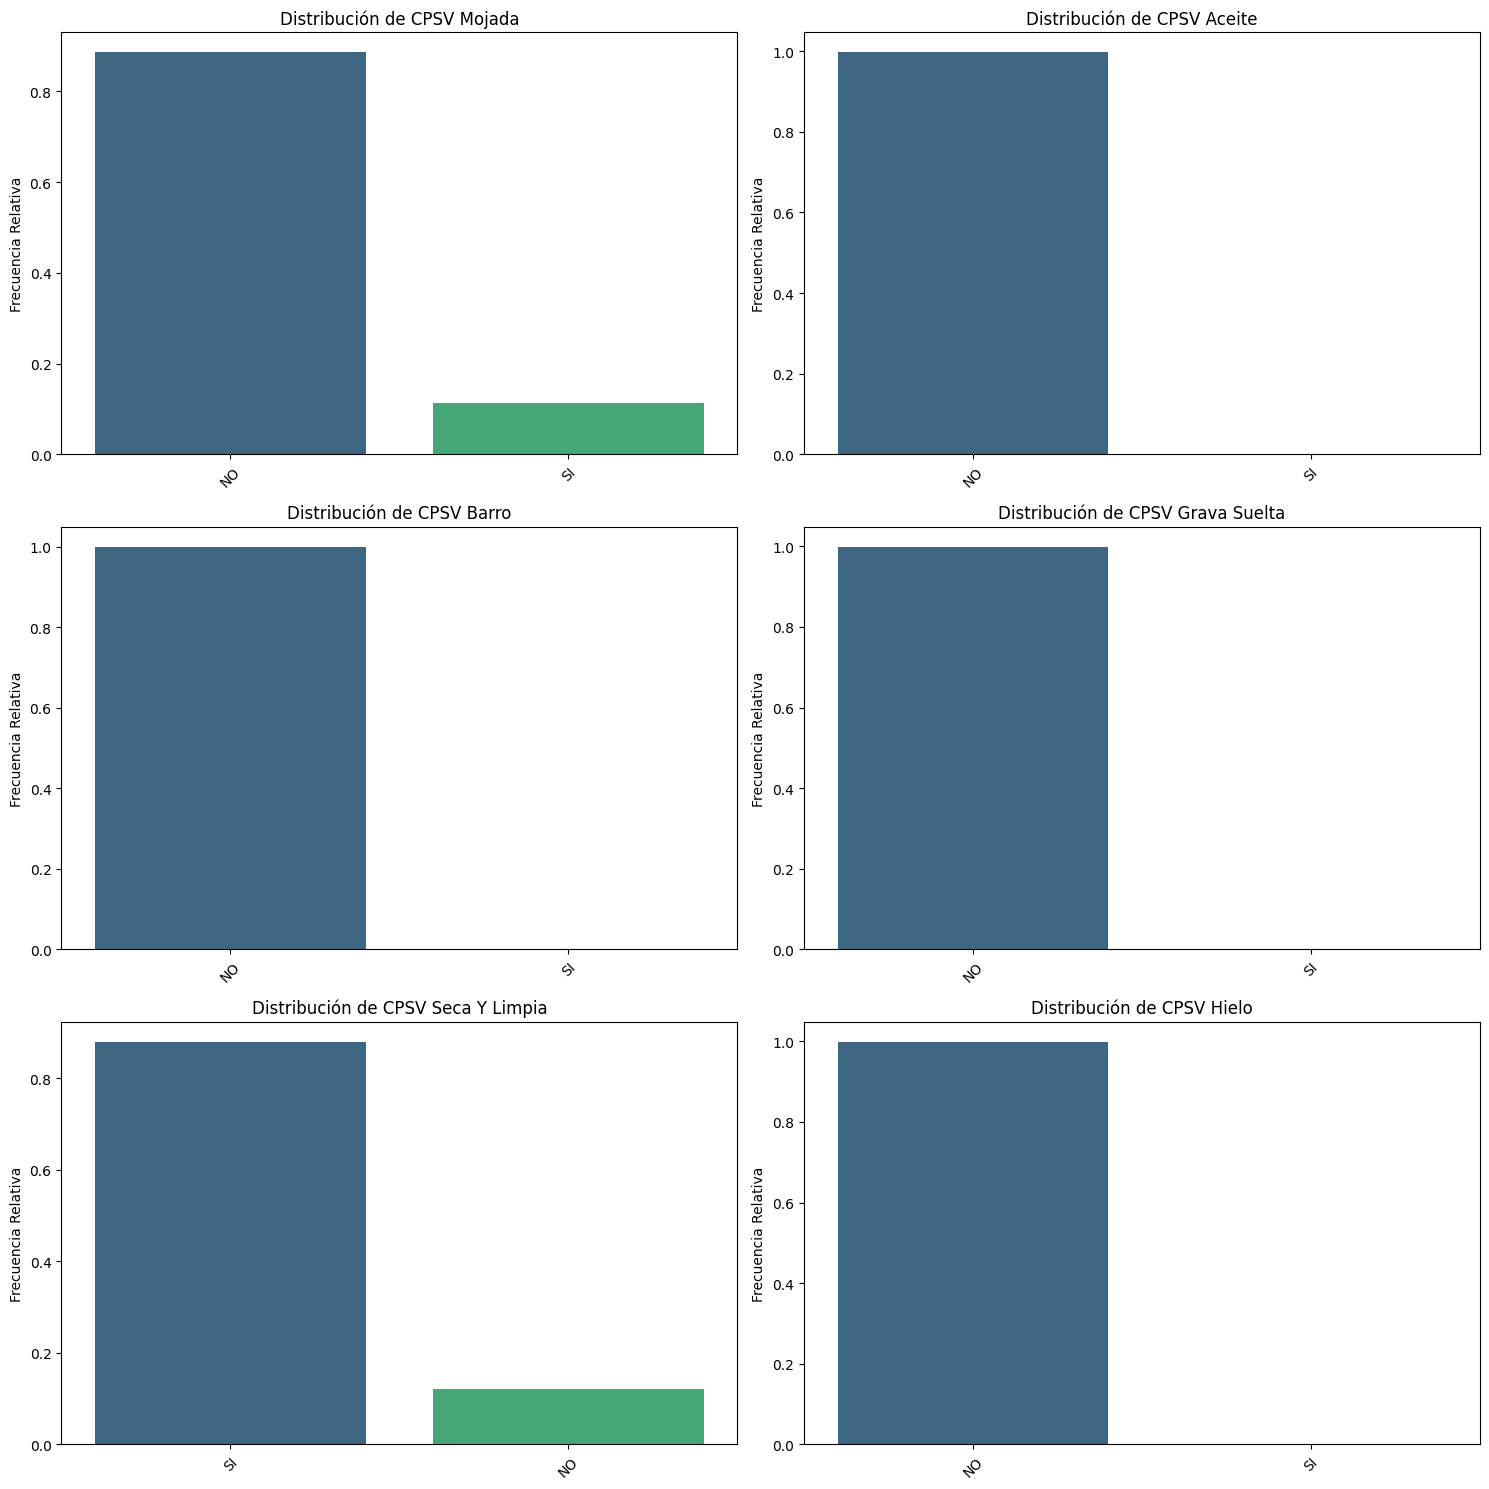

In [133]:
pinta_distribucion_categoricas(Accidentes_New,["CPSV Mojada", "CPSV Aceite", "CPSV Barro","CPSV Grava Suelta","CPSV Seca Y Limpia", "CPSV Hielo"],relativa= True)

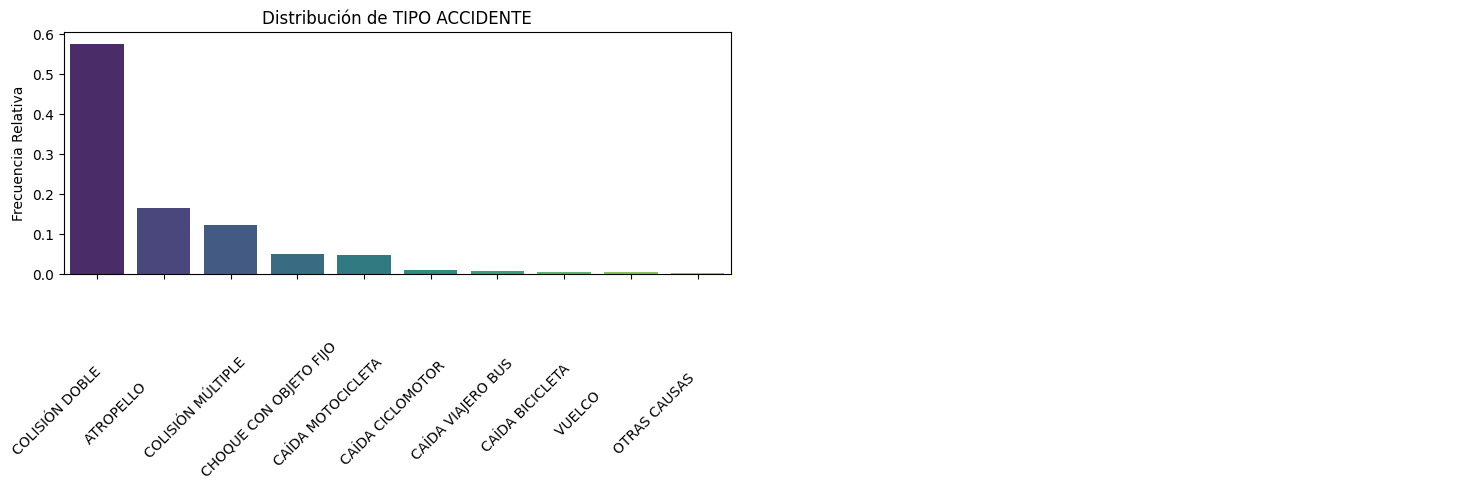

In [134]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO ACCIDENTE"],relativa= True)

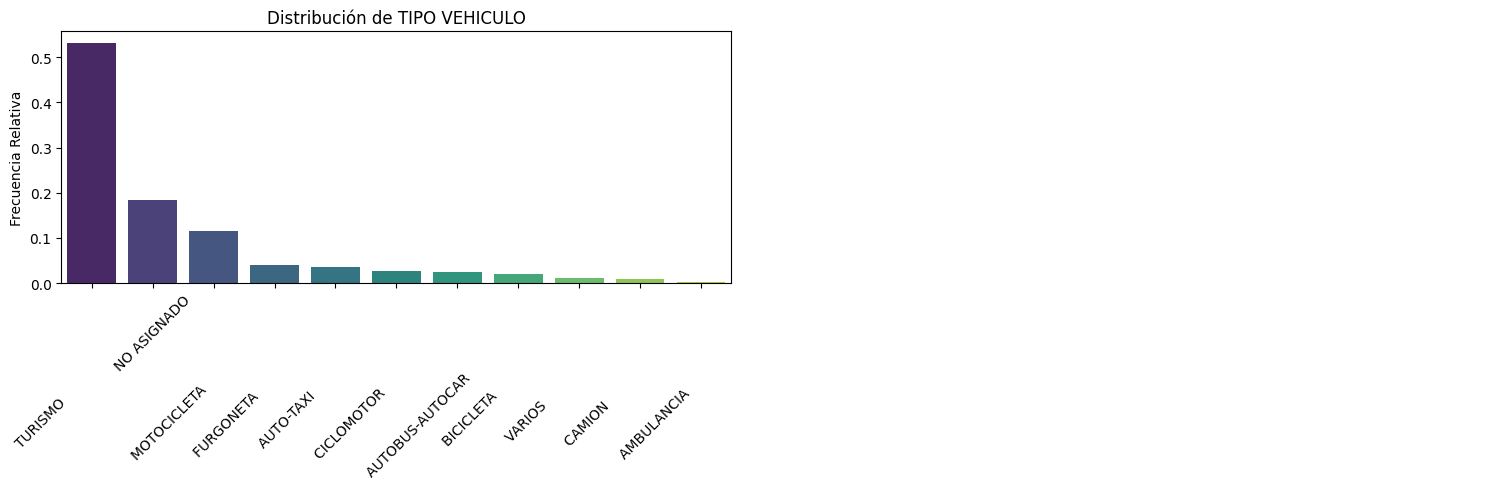

In [135]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO VEHICULO"],relativa= True)

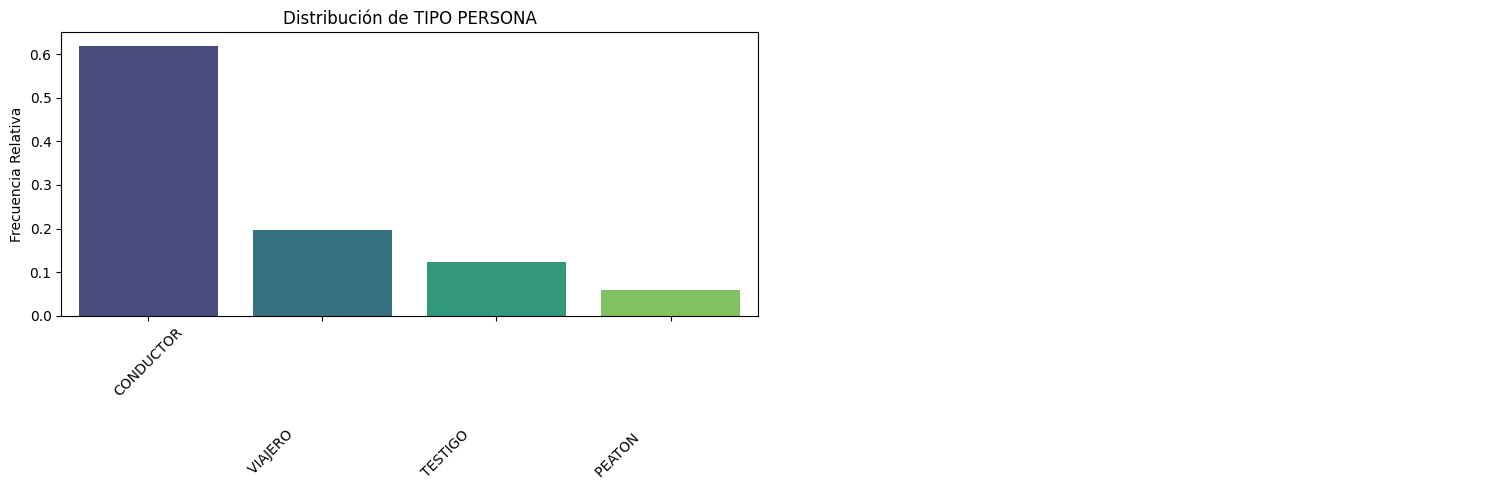

In [136]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO PERSONA"],relativa= True)

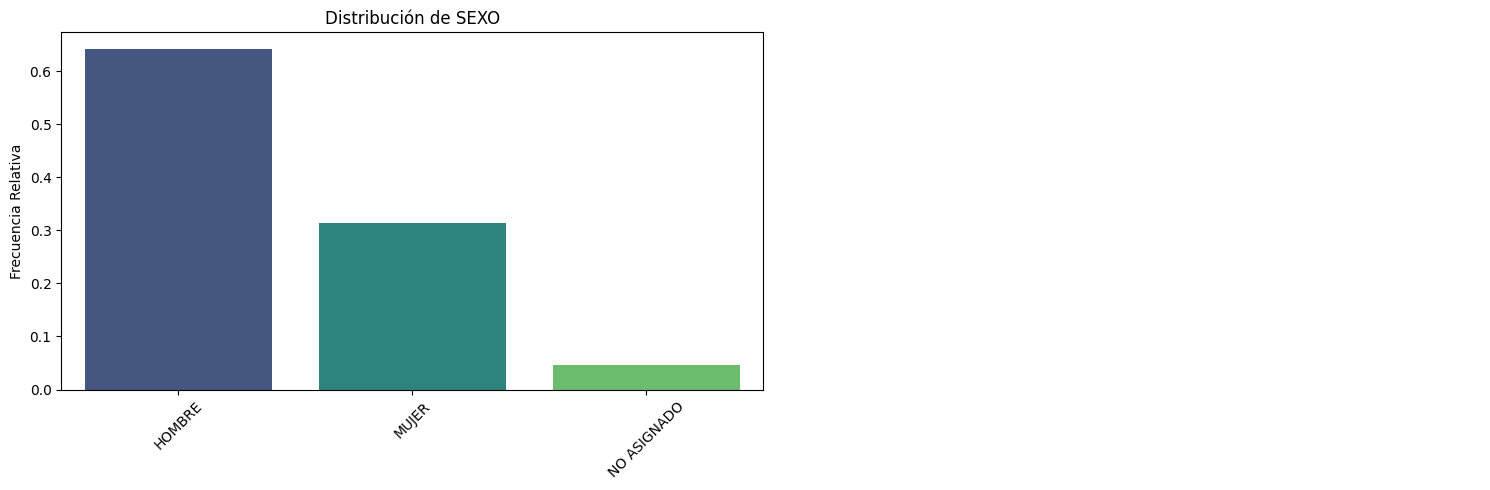

In [137]:
pinta_distribucion_categoricas(Accidentes_New,["SEXO"],relativa= True)

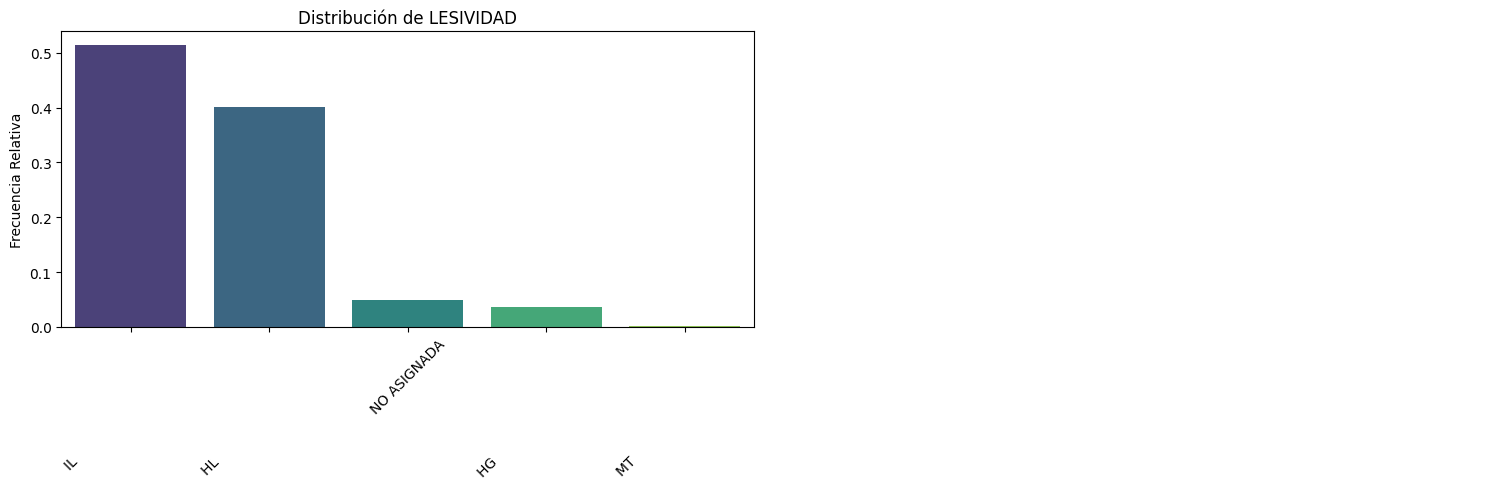

In [138]:
pinta_distribucion_categoricas(Accidentes_New,["LESIVIDAD"],relativa= True)

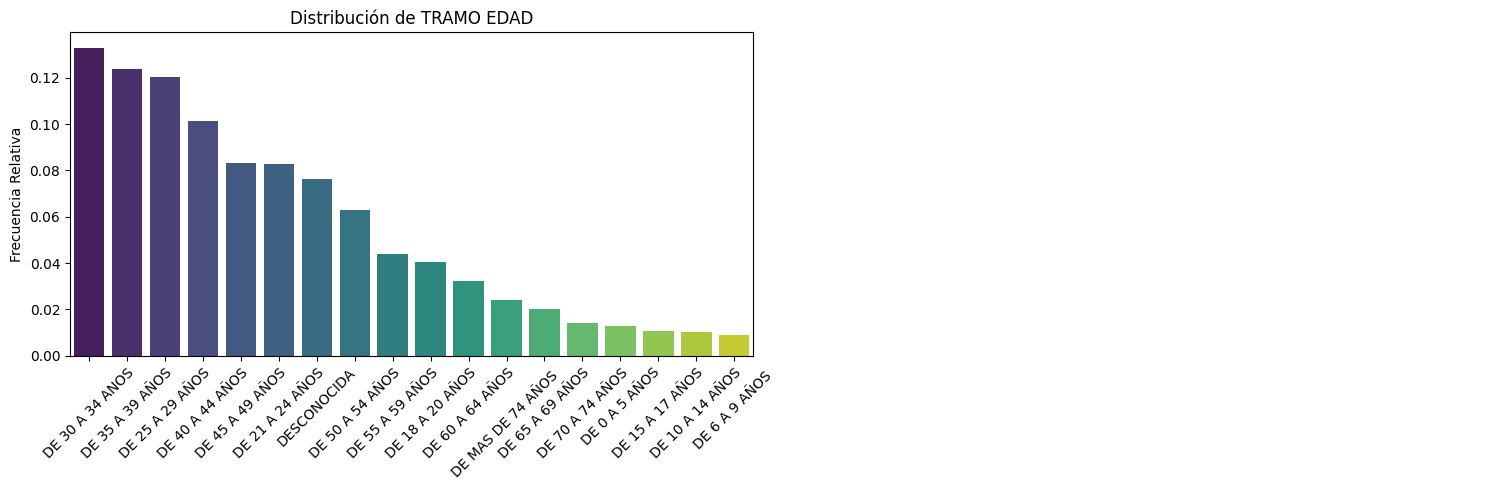

In [139]:
pinta_distribucion_categoricas(Accidentes_New,["TRAMO EDAD"],relativa= True)

13. MEDIDAS DE POSICIÓN  
Estas medidas de posicion determinaran en que conjunto está relacionandose nuestra población

<Axes: >

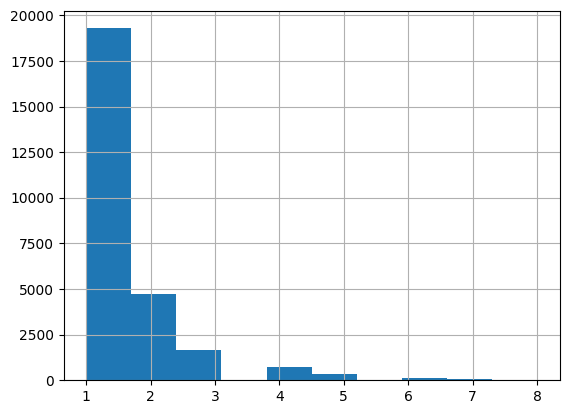

In [140]:
Accidentes_New["N VICTIMAS"].hist()

(2,)


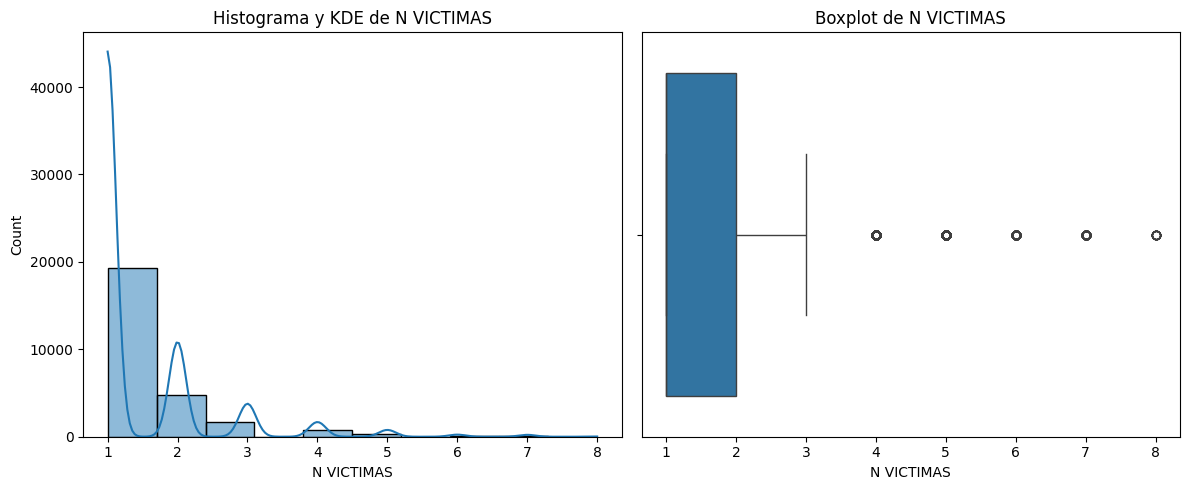

In [190]:
plot_combined_graphs(Accidentes_New,["N VICTIMAS"],bins= 10)

14. ANALISIS BI-VARIANTE CATEGÓRICO   
Estamos buscando la dependencia de las variables como una correlacion o temas de causalidad, si una cambia tambien cambia la otra

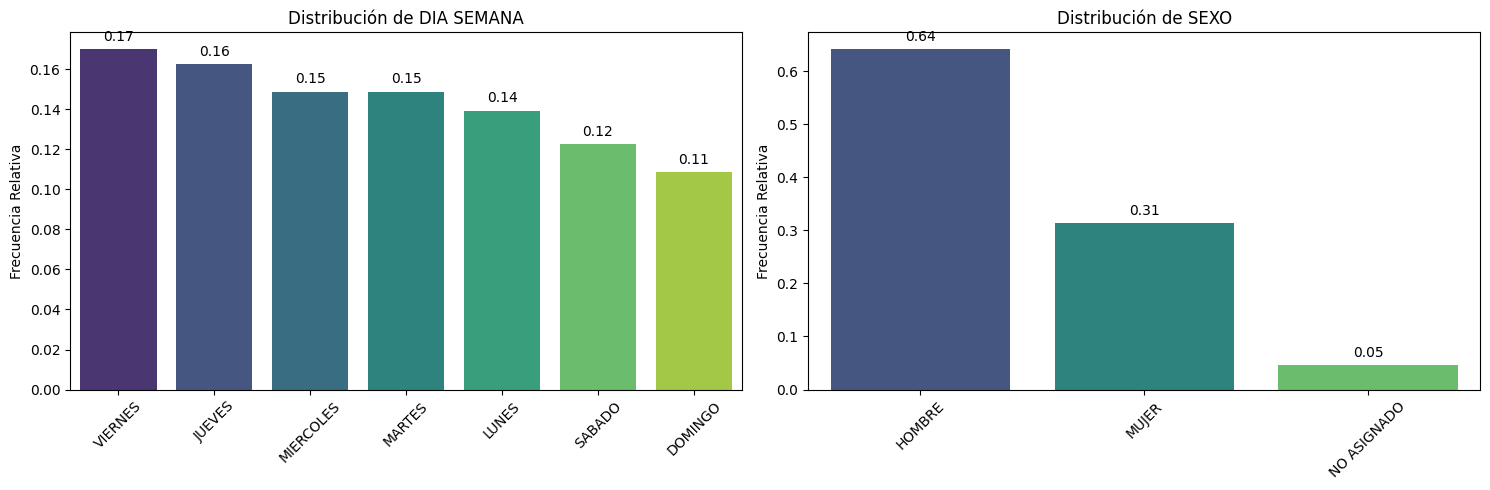

In [143]:
pinta_distribucion_categoricas(Accidentes_New,["DIA SEMANA","SEXO"],relativa= True, mostrar_valores= True)

In [144]:
tabla_contingencia = pd.crosstab(Accidentes_New['DIA SEMANA'], Accidentes_New['SEXO'])

tabla_contingencia

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 57.613755361570746
P-Value: 6.122708354635037e-08
Grados de Libertad: 12
Tabla de Frecuencias Esperadas:
 [[1877.00463272  918.36557705  133.62979023]
 [2810.05985472 1374.8832555   200.05688978]
 [2405.05236825 1176.72448299  171.22314877]
 [2569.74686828 1257.30486991  182.9482618 ]
 [2572.95104144 1258.87258172  183.17637684]
 [2119.24012304 1036.88458973  150.87528723]
 [2936.94511156 1436.9646431   209.09024535]]


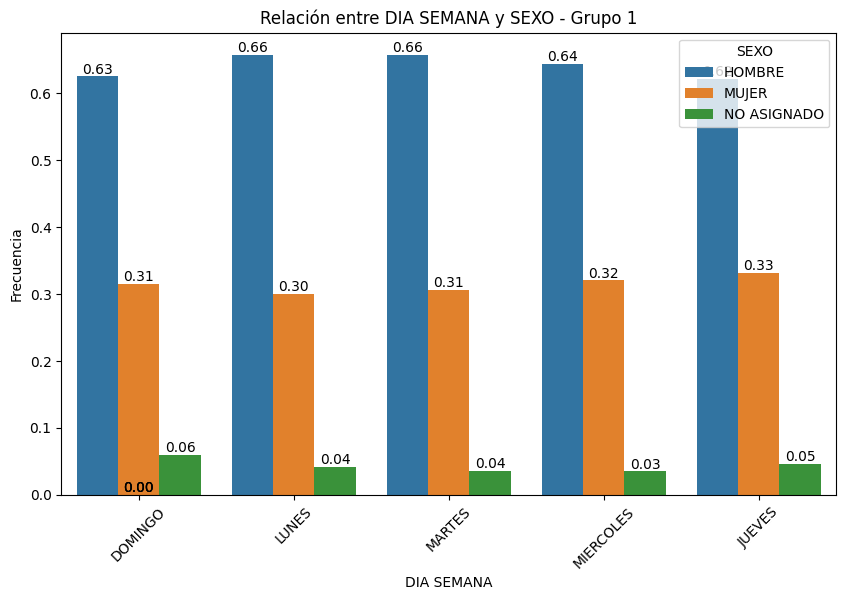

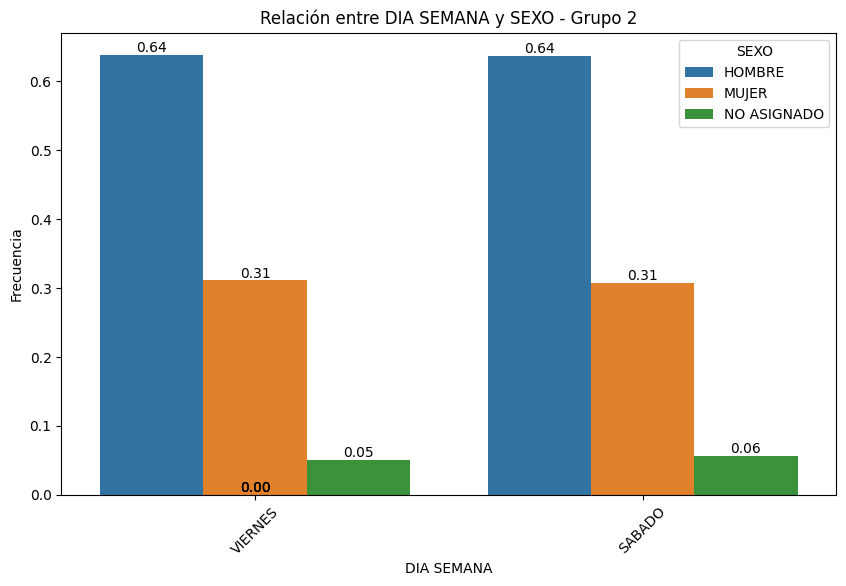

In [145]:
plot_categorical_relationship_fin(Accidentes_New,"DIA SEMANA","SEXO", relative_freq= True, show_values=True)

In [146]:
'''
EL analisis de "SEXO" con " DIA SEMANA" no es considerado un analisis relevante para el estudio ya que no existen relaciones algunas, 
a pesar de haber podido realizar la comprobación por medio del chi cuadrado y diciendo que existen relaciones algunas, 
mirando gráficamente no se ve cierta correlación alguna y no infiere una de la otra, por lo tanto queda descartado
'''

'\nEL analisis de "SEXO" con " DIA SEMANA" no es considerado un analisis relevante para el estudio ya que no existen relaciones algunas, \na pesar de haber podido realizar la comprobación por medio del chi cuadrado y diciendo que existen relaciones algunas, \nmirando gráficamente no se ve cierta correlación alguna y no infiere una de la otra, por lo tanto queda descartado\n'

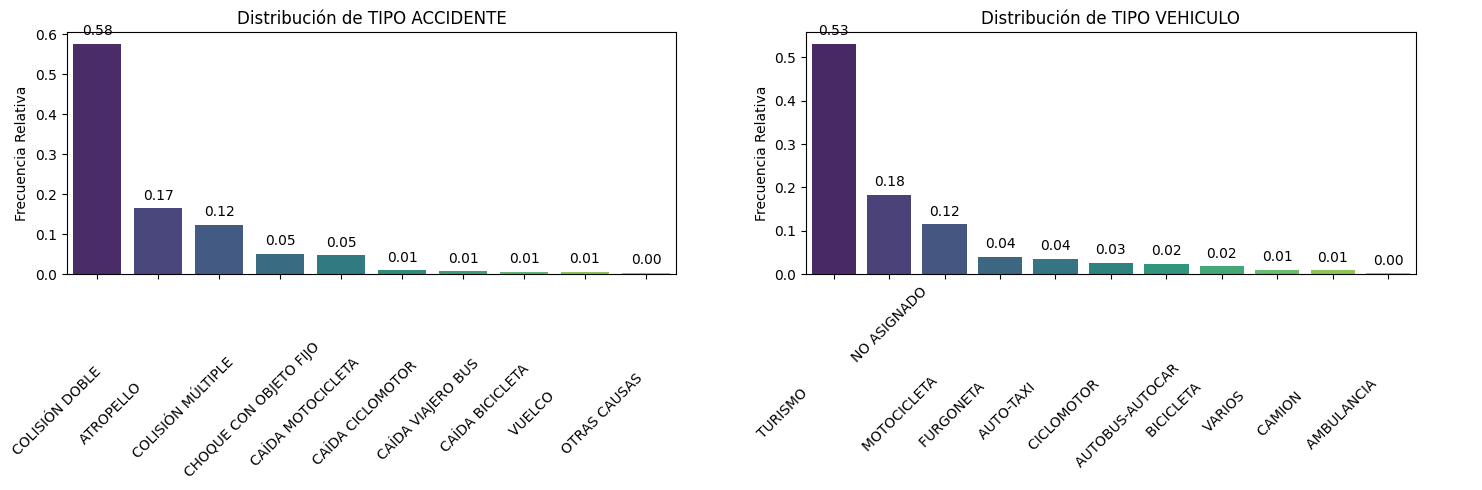

In [147]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO ACCIDENTE","TIPO VEHICULO"],relativa= True, mostrar_valores= True)


In [148]:
tabla_contingencia = pd.crosstab(Accidentes_New['TIPO ACCIDENTE'], Accidentes_New['TIPO VEHICULO'])

tabla_contingencia

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25252.580377424616
P-Value: 0.0
Grados de Libertad: 90
Tabla de Frecuencias Esperadas:
 [[1.32532800e+01 1.61524350e+02 1.11327552e+02 8.51523238e+01
  4.39014899e+01 1.18285524e+02 1.82729598e+02 5.17706249e+02
  8.18390038e+02 2.37184012e+03 4.58894819e+01]
 [5.24794307e-01 6.39593062e+00 4.40827218e+00 3.37180342e+00
  1.73838114e+00 4.68378919e+00 7.23560151e+00 2.04997776e+01
  3.24060485e+01 9.39185012e+01 1.81710029e+00]
 [8.36112964e-01 1.01901268e+01 7.02334890e+00 5.37202579e+00
  2.76962419e+00 7.46230821e+00 1.15279075e+01 3.26606627e+01
  5.16299755e+01 1.49632866e+02 2.89504114e+00]
 [3.84849159e+00 4.69034912e+01 3.23273293e+01 2.47265584e+01
  1.27481284e+01 3.43477874e+01 5.30610778e+01 1.50331703e+02
  2.37644355e+02 6.88735676e+02 1.33254021e+01]
 [6.37462012e-01 7.76906827e+00 5.35468090e+00 4.09569343e+00
  2.11159291e+00 5.68934845e+00 8.78900749e+00 2.49008598e+01
  3.93632792e+01 1.14081795e+02 2.20721222e+00]
 [4.10940627e+00 5.00833889e+01 

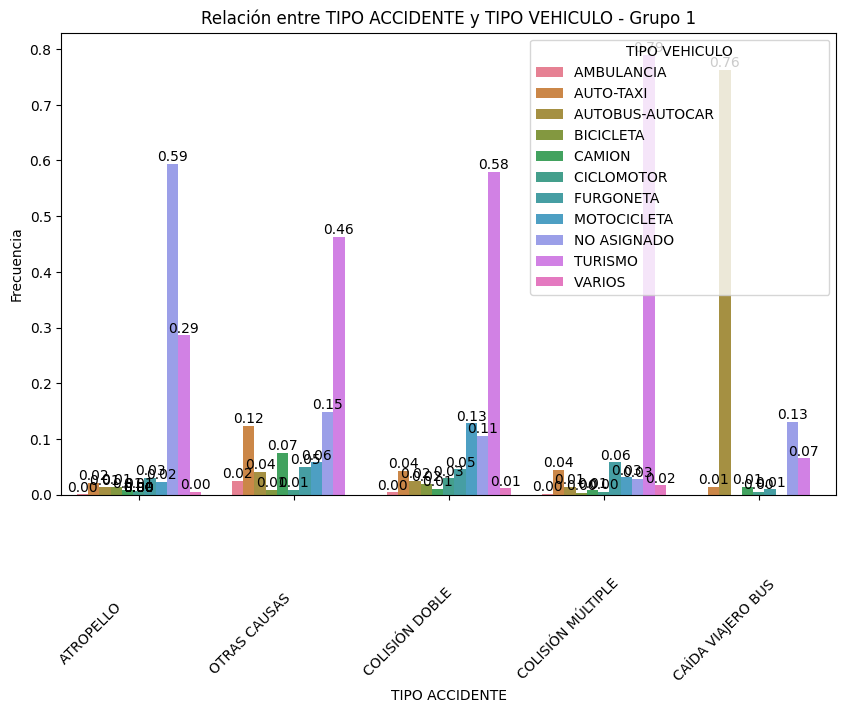

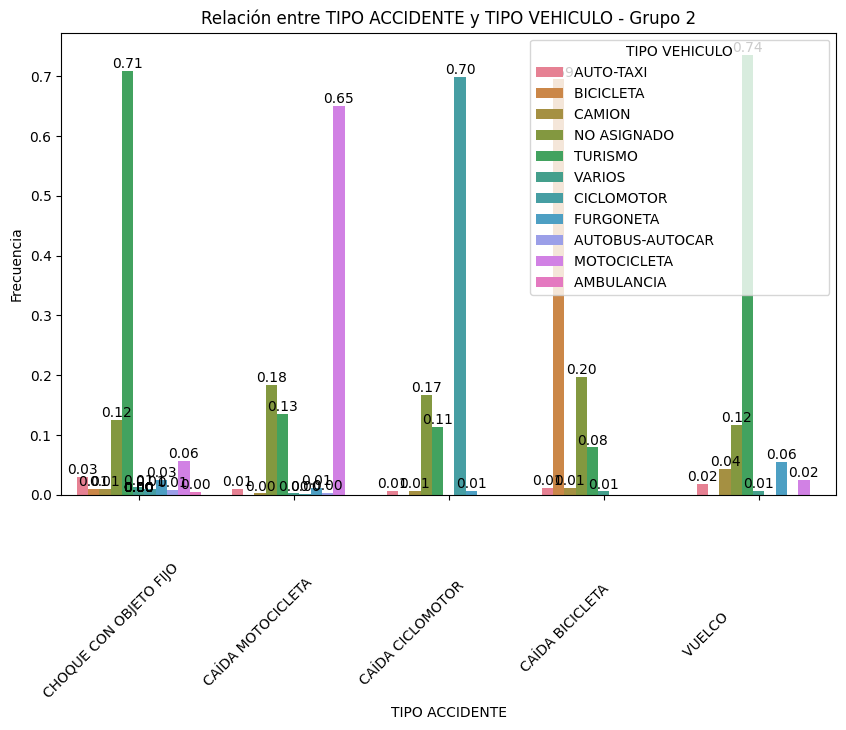

In [194]:
plot_categorical_relationship_fin(Accidentes_New,"TIPO ACCIDENTE","TIPO VEHICULO", relative_freq= True, show_values=True)

In [150]:
'''
Por otro lado las relaciones que existen entre el tipo del vehículo con el tipo de accidente, varía una de la otra, esto da a entender así como los distintos valores que otorgan estas dos variables se relacionan a los cambios que tienen el uno del otro
al tener mayor inferencia, el tipo de vehículo de turismo con los distintos tipos de accidentes, así como colisiones multiples, vuelcos o incluso choque a objetos fijos.
'''

'\nPor otro lado las relaciones que existen entre el tipo del vehículo con el tipo de accidente, varía una de la otra, se pueden ver tanto graficamente, como bajon los parametros \ndel chi cuadrado el mismo que lo indica, esto da a entender así como los distintos valores que otorgan estas dos variables se relacionan a los cambios que tienen el uno del otro\nal tener mayor inferencia, el tipo de vehículo de turismo con los distintos tipos de accidentes, así como colisiones multiples, vuelcos o incluso choque a objetos fijos.\n'

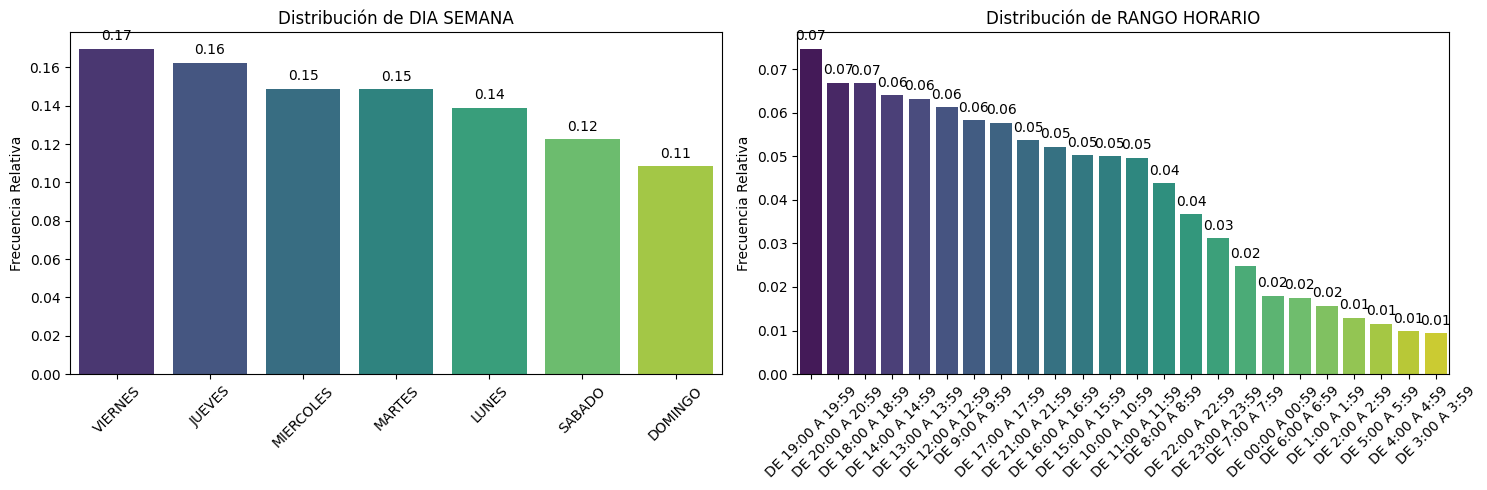

In [151]:
pinta_distribucion_categoricas(Accidentes_New,["DIA SEMANA","RANGO HORARIO"],relativa= True, mostrar_valores= True)

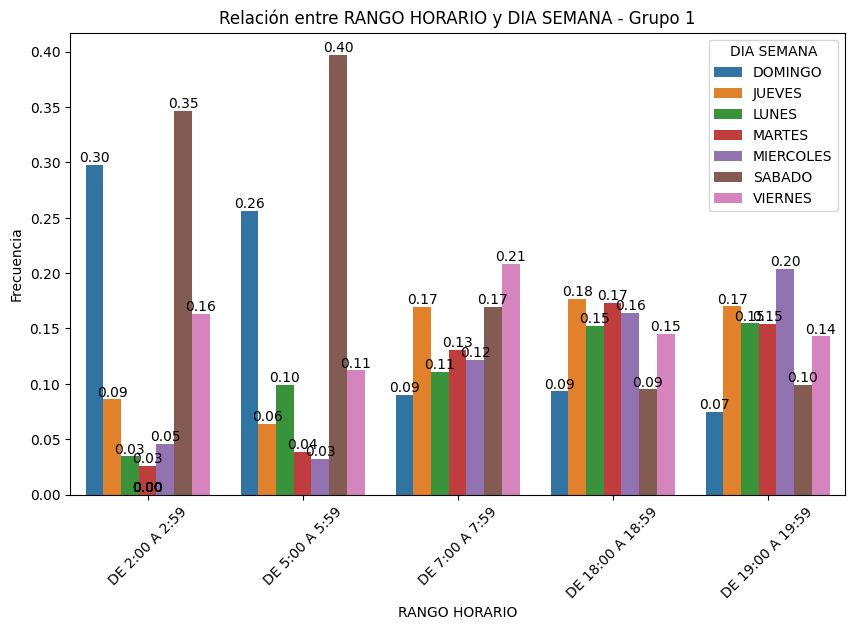

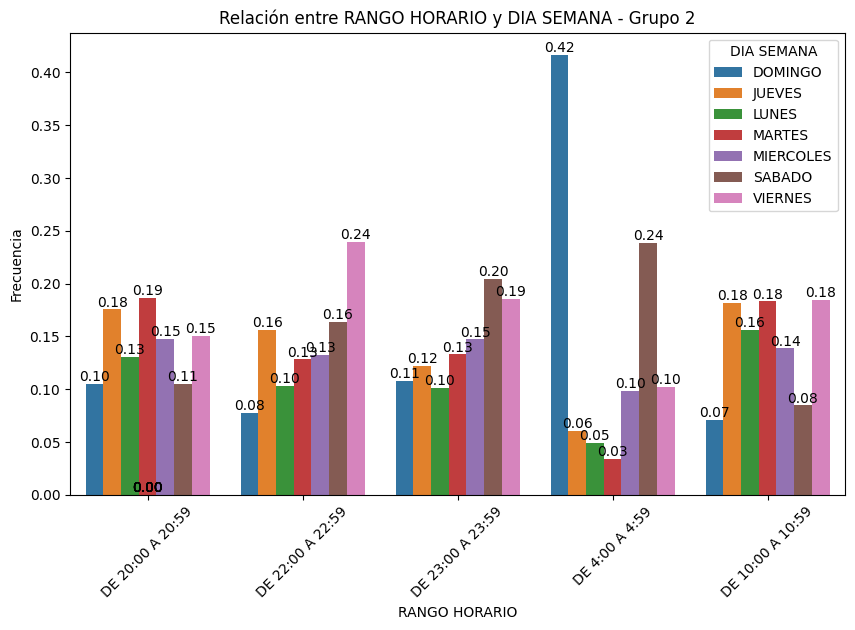

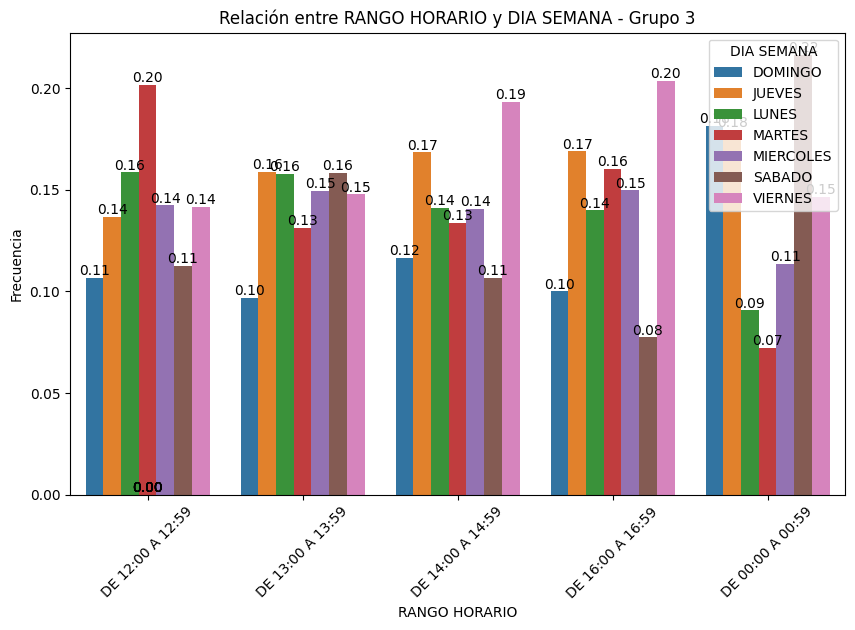

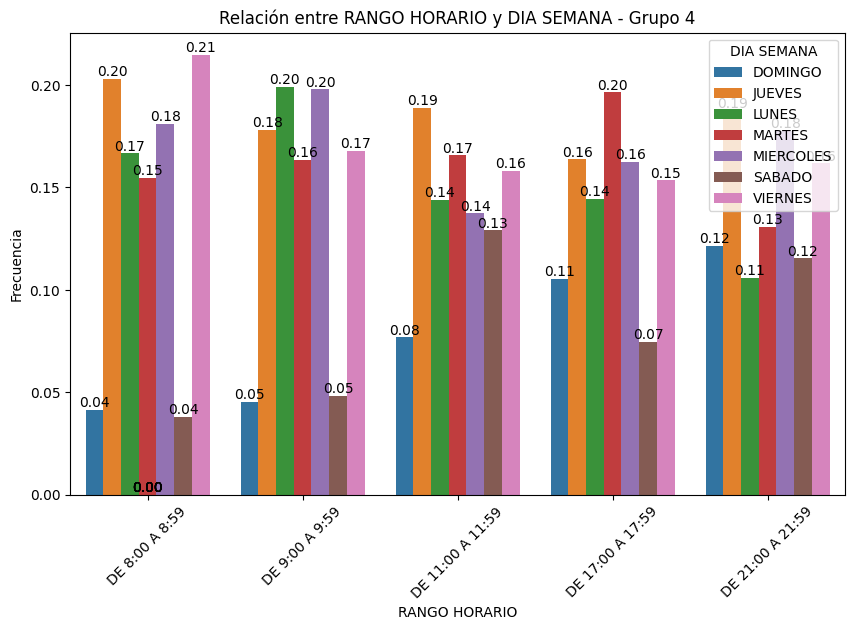

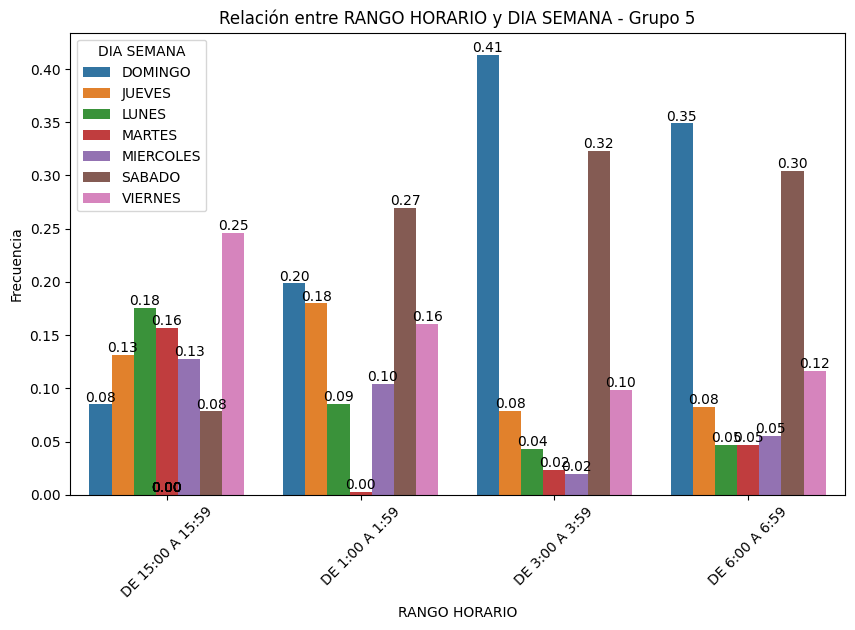

In [152]:
plot_categorical_relationship_fin(Accidentes_New,"RANGO HORARIO","DIA SEMANA", relative_freq= True, show_values=True)

In [153]:

tabla_contingencia = pd.crosstab(Accidentes_New['DIA SEMANA'], Accidentes_New['RANGO HORARIO'])

tabla_contingencia

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 3253.7662922413583
P-Value: 0.0
Grados de Libertad: 138
Tabla de Frecuencias Esperadas:
 [[ 52.6486176  146.43914461 145.46215996 179.33096138 185.19286932
  187.58105404 147.09046772 152.95237566 169.12689941 195.50548514
  218.84456304  45.91827885 196.04825439 157.07742199 107.57686606
   91.51089615  37.8852939   27.57267808  28.65821659  33.86880142
   51.34597139  72.40541843 128.31065155 170.64665332]
 [ 78.82013935 219.23374842 217.77110666 268.47602105 277.25187162
  280.82721815 220.20884293 228.9846935  253.19954043 292.69086799
  327.6317545   68.74416278 293.50344674 235.16029205 161.05310948
  137.0007783   56.71799718  41.27900082  42.90415833  50.70491439
   76.86995034 108.39800608 192.09361797 255.47476095]
 [ 67.45997332 187.63609073 186.38425617 229.78118746 237.2921948
  240.35223482 188.4706471  195.98165444 216.70647098 250.506004
  280.41094063  58.83622415 251.20146765 201.26717812 137.84089393
  117.25517011  48.54336224  35.32955304  36.72

In [154]:
'''
Clara correlacion entre estas dos variable categóricas, no estan sujetas a un parametro espécifico que indique que los accidentes solo sucederían a una hora determinanda
más el tema indica la volatidad como se interactuan estas variables, indicando más que los accidentes con mayor frecuencia, se desarrollan a base d ela vida noctruna de la ciudad 
'''

'\nClara correlacion entre estas dos variable categóricas, no estan sujetas a un parametro espécifico que indique que los accidentes solo sucederían a una hora determinanda\nmás el tema indica la volatidad como se interactuan estas variables, indicando más que los accidentes con mayor frecuencia, se desarrollan a base d ela vida noctruna de la ciudad \n'

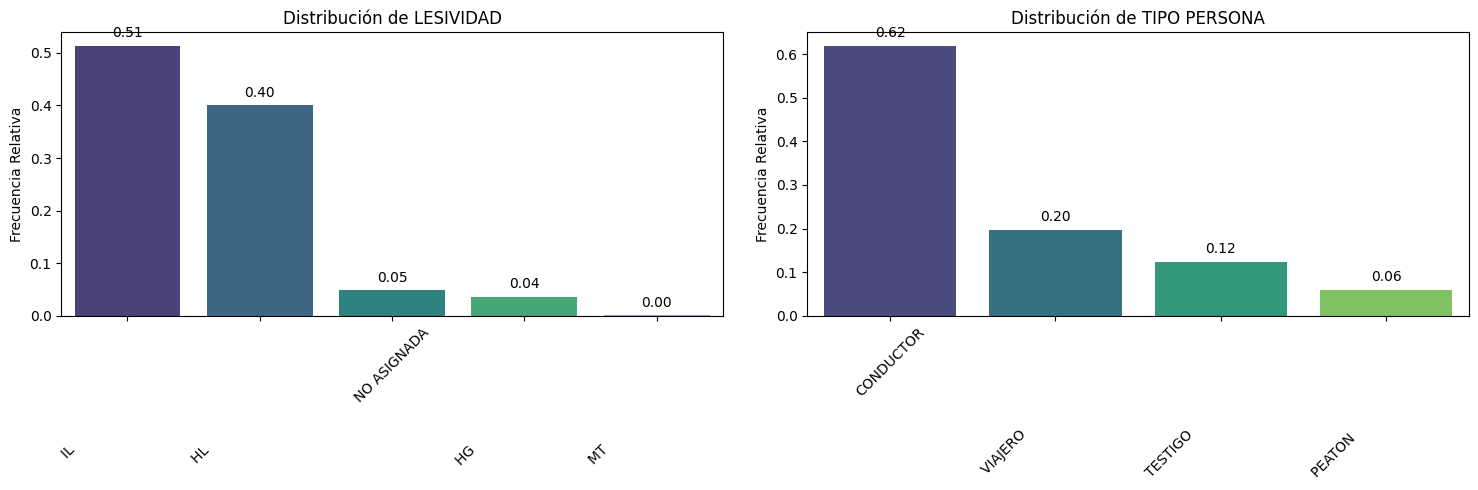

In [155]:
pinta_distribucion_categoricas(Accidentes_New,["LESIVIDAD","TIPO PERSONA"],relativa= True, mostrar_valores= True)

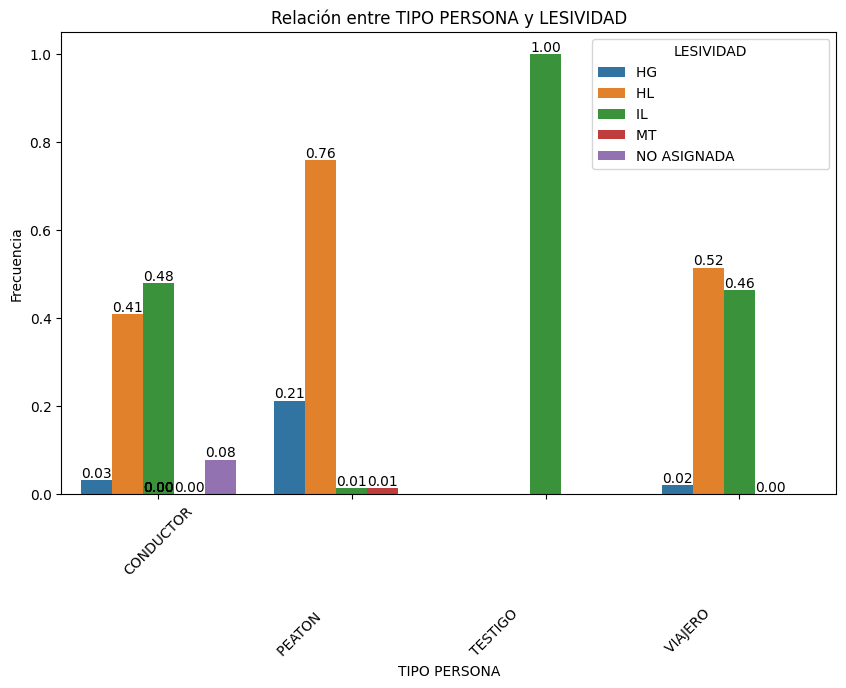

In [156]:
plot_categorical_relationship_fin(Accidentes_New,"TIPO PERSONA","LESIVIDAD", relative_freq= True, show_values=True)

In [157]:
tabla_contingencia = pd.crosstab(Accidentes_New['TIPO PERSONA'], Accidentes_New['LESIVIDAD'])

tabla_contingencia

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 6978.961524740569
P-Value: 0.0
Grados de Libertad: 12
Tabla de Frecuencias Esperadas:
 [[6.05242161e+02 6.69170091e+03 8.57178853e+03 2.04222815e+01
  8.08846120e+02]
 [5.84291750e+01 6.46006819e+02 8.27507672e+02 1.97153658e+00
  7.80847973e+01]
 [1.21280409e+02 1.34090497e+03 1.71764310e+03 4.09228374e+00
  1.62079238e+02]
 [1.93048254e+02 2.13438730e+03 2.73406071e+03 6.51389815e+00
  2.57989845e+02]]


In [158]:
'''
El desarrollo de estas dos variables involucran interacciones específicas, donde en una manera se indica a los afectados como lo es el tipo de persona "peaton" con una
representación pequeña en la población total, pero el mayor afectado.
'''


'\nEl desarrollo de estas dos variables involucran interacciones específicas, donde en una manera se indica a los afectados como lo es el tipo de persona "peaton" con una\nrepresentación pequeña en la población total, pero el mayor afectado.\n'

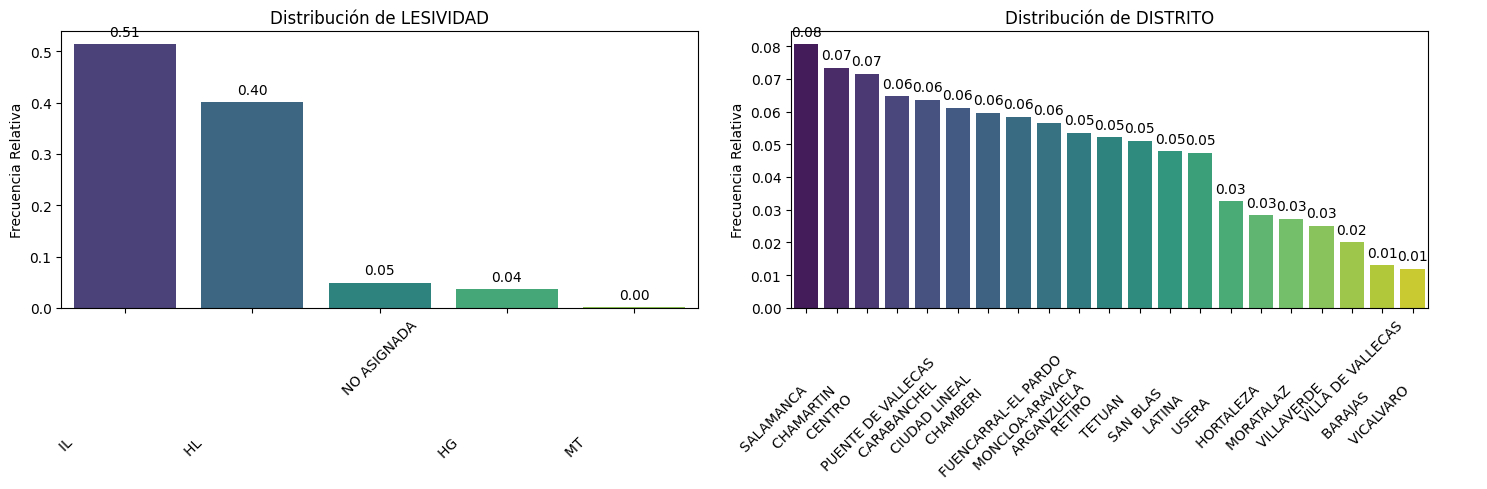

In [159]:
pinta_distribucion_categoricas(Accidentes_New,["LESIVIDAD","DISTRITO"],relativa= True, mostrar_valores= True)

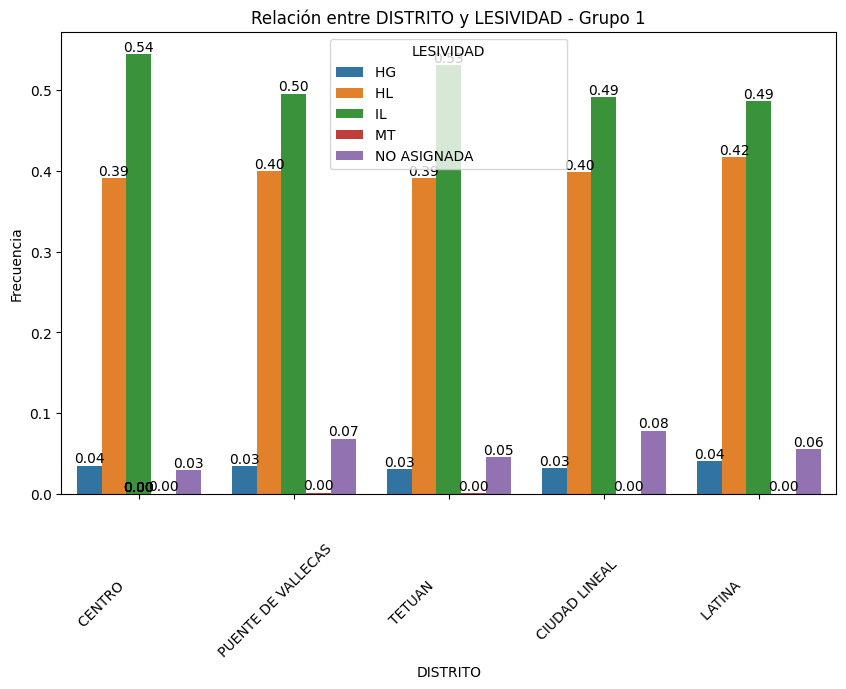

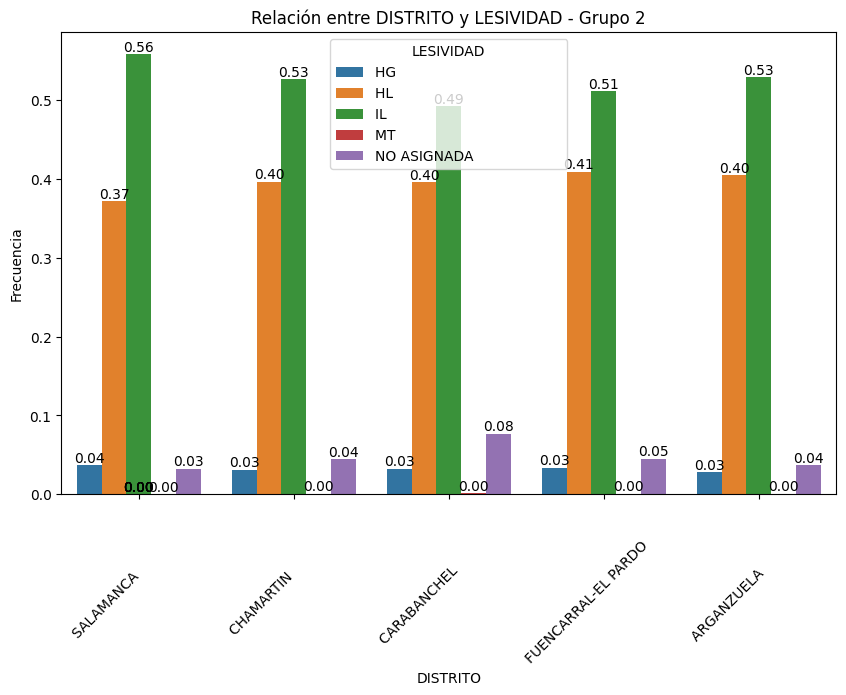

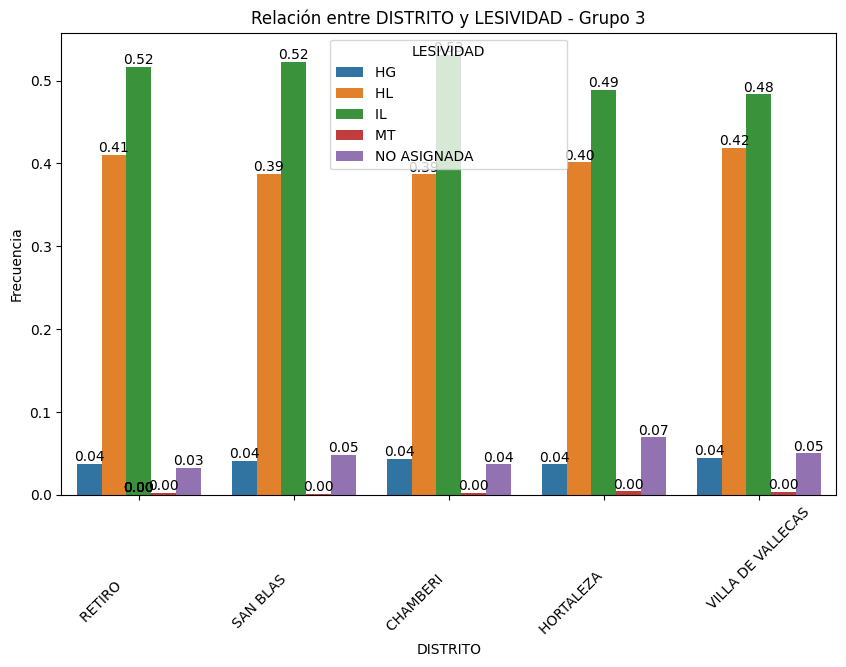

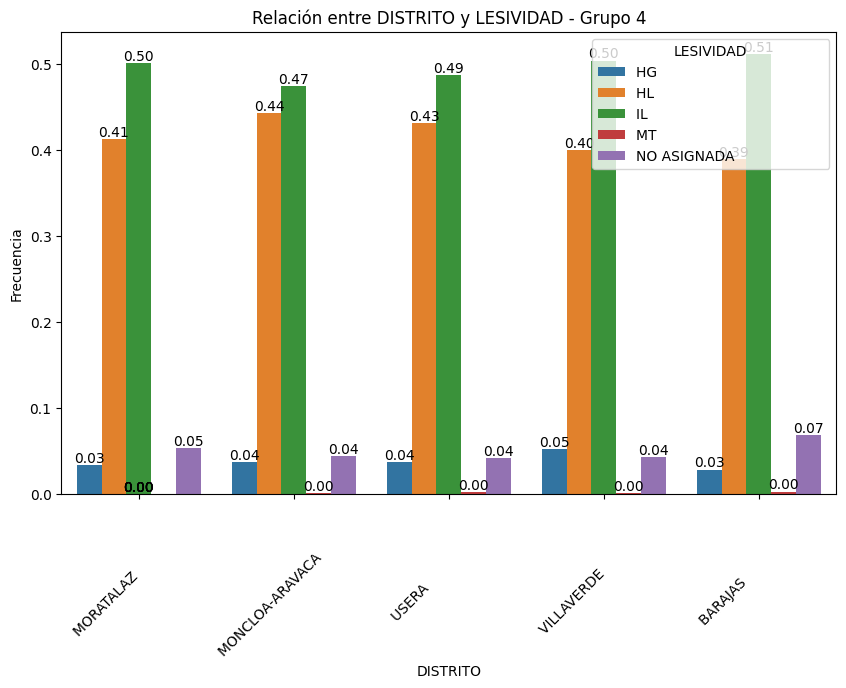

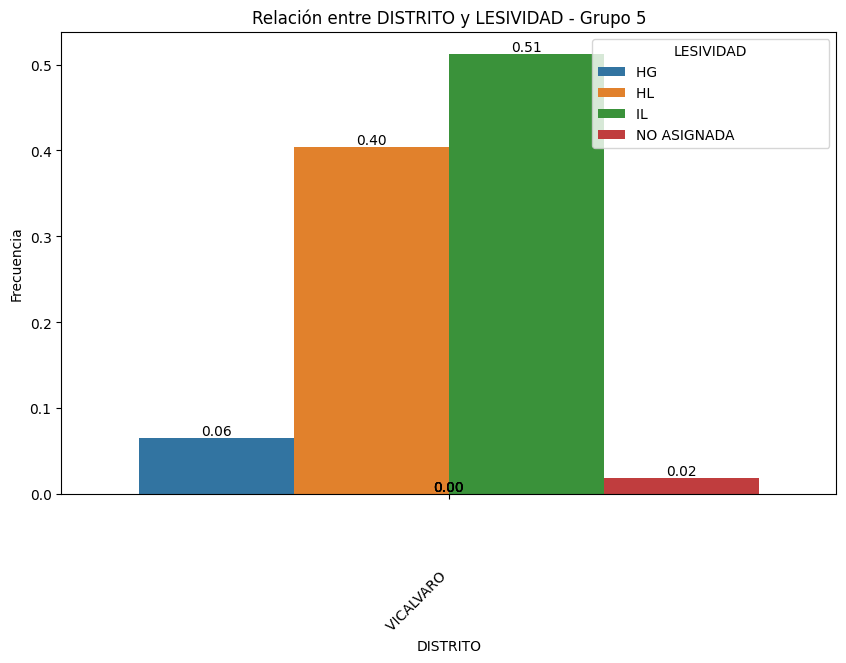

In [160]:
plot_categorical_relationship_fin(Accidentes_New,"DISTRITO","LESIVIDAD", relative_freq= True, show_values=True)

In [161]:
tabla_contingencia = pd.crosstab(Accidentes_New['DISTRITO'], Accidentes_New['LESIVIDAD'])

tabla_contingencia

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 224.495862273611
P-Value: 1.2052380136678413e-15
Grados de Libertad: 80
Tabla de Frecuencias Esperadas:
 [[5.23760285e+01 5.79081795e+02 7.41779520e+02 1.76728930e+00
  6.99953673e+01]
 [1.27587280e+01 1.41063524e+02 1.80696464e+02 4.30509228e-01
  1.70507746e+01]
 [6.22350456e+01 6.88085427e+02 8.81408606e+02 2.09995553e+00
  8.31709658e+01]
 [7.00280187e+01 7.74246386e+02 9.91777185e+02 2.36290861e+00
  9.35855014e+01]
 [7.18403380e+01 7.94283819e+02 1.01744430e+03 2.42406048e+00
  9.60074865e+01]
 [5.83929286e+01 6.45606071e+02 8.26994330e+02 1.97031354e+00
  7.80363576e+01]
 [5.98790305e+01 6.62036765e+02 8.48041361e+02 2.02045808e+00
  8.00223853e+01]
 [5.71243051e+01 6.31579868e+02 8.09027352e+02 1.92750723e+00
  7.63409681e+01]
 [2.77284857e+01 3.06572715e+02 3.92706805e+02 9.35623749e-01
  3.70563709e+01]
 [4.63228819e+01 5.12156771e+02 6.56051368e+02 1.56304203e+00
  6.19059373e+01]
 [5.53119858e+01 6.11542436e+02 7.83360240e+02 1.86635535e+00
  7.39189830e

In [162]:
'''
A pesar de una comprobación de variables, graficamente no se determina un cambio relevante entre la lesividad y el distrito, no se desarrollan en el mismo plano de interacción 
para un analisis
'''

'\nA pesar de una comprobación de variables, graficamente no se determina un cambio relevante entre la lesividad y el distrito, no se desarrollan en el mismo plano de interacción \npara un analisis\n'

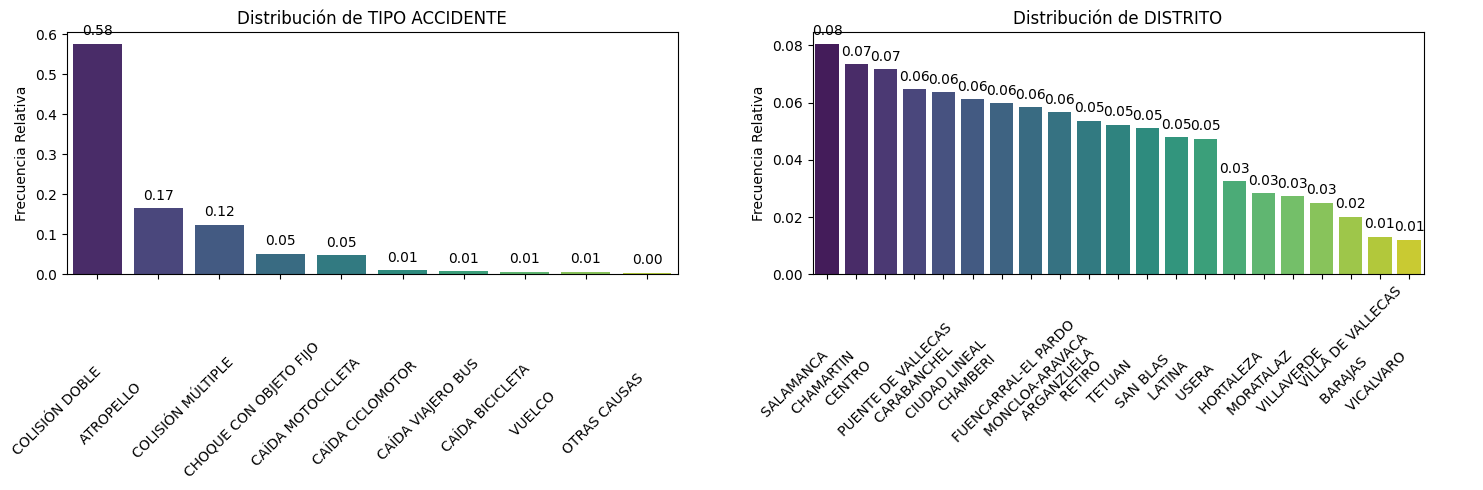

In [163]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO ACCIDENTE","DISTRITO"],relativa= True, mostrar_valores= True)

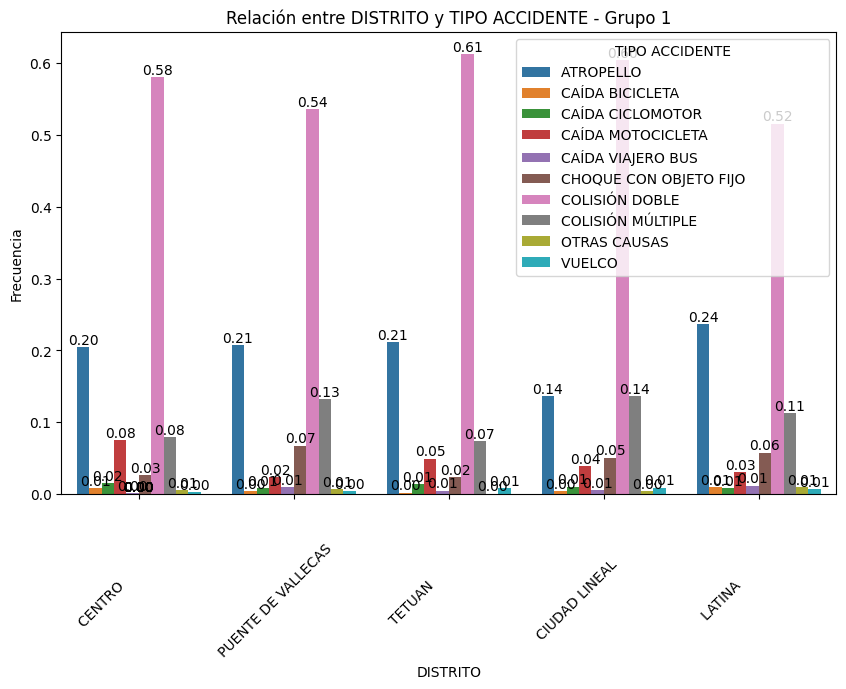

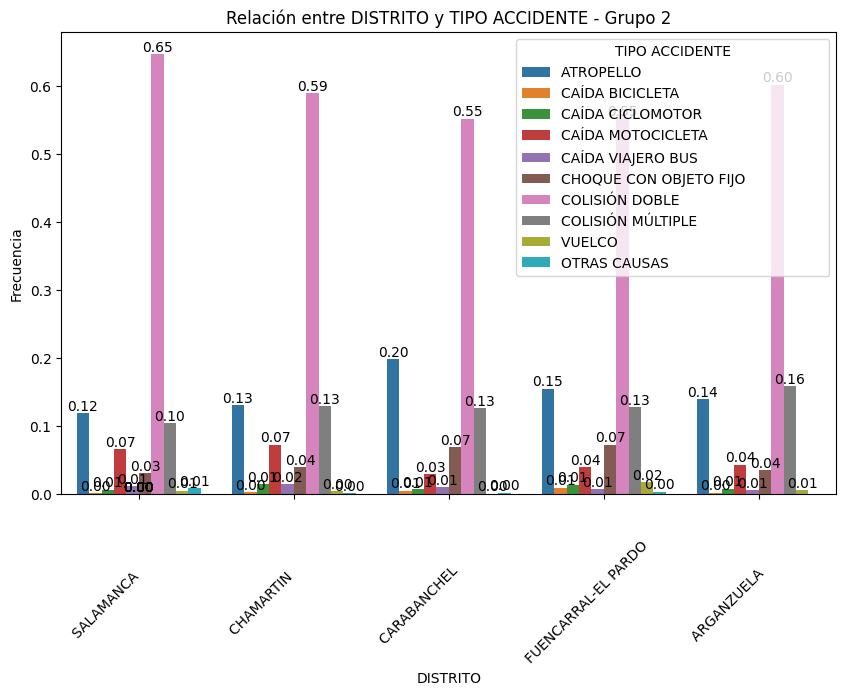

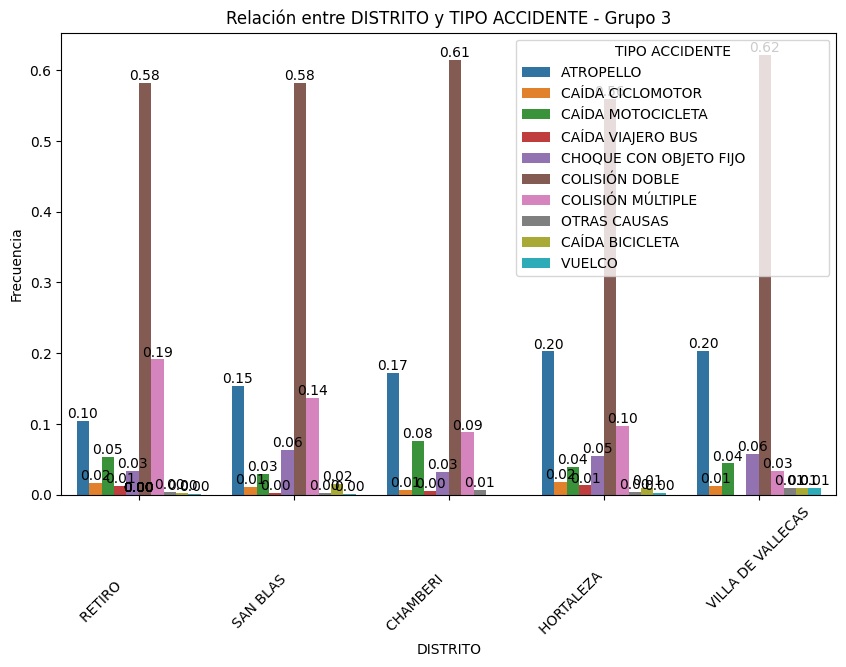

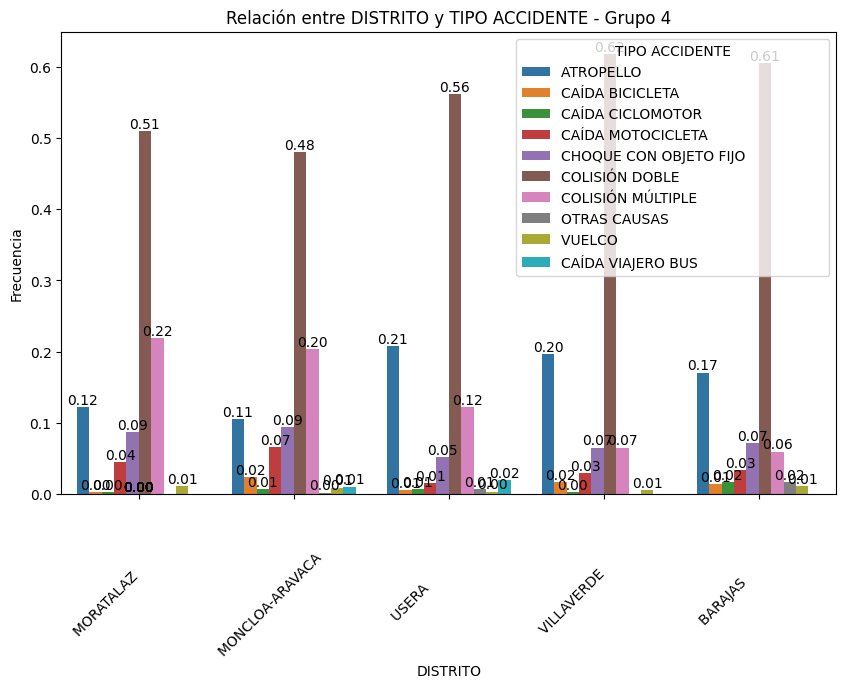

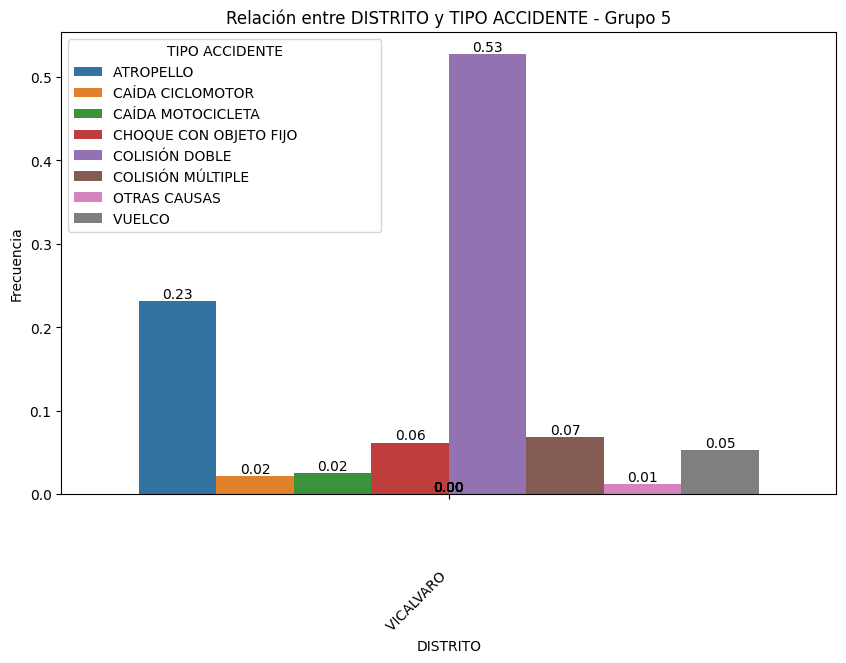

In [164]:
plot_categorical_relationship_fin(Accidentes_New,"DISTRITO","TIPO ACCIDENTE", relative_freq= True, show_values=True)

In [165]:
'''
Se descarta la variable, son idependientes una de  la otra
'''

'\nSe descarta la variable, son idependientes una de  la otra\n'

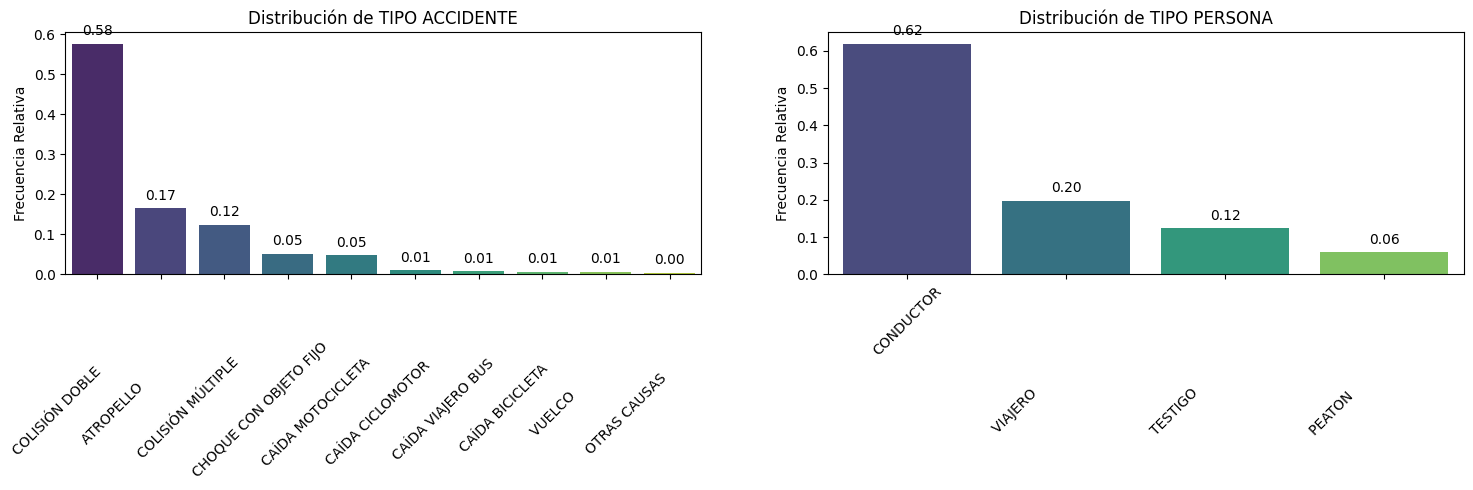

In [166]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO ACCIDENTE","TIPO PERSONA"],relativa= True, mostrar_valores= True)

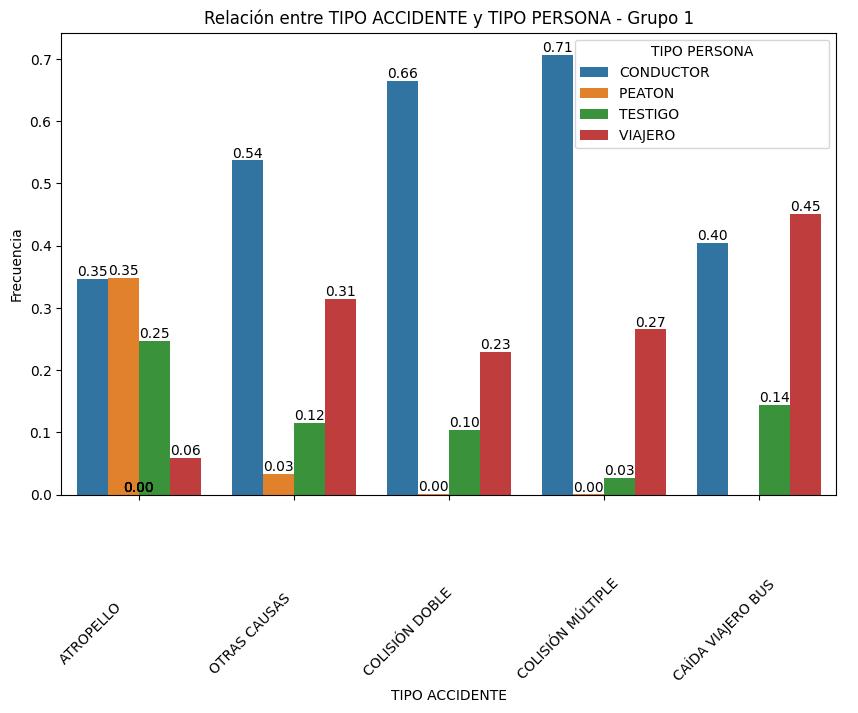

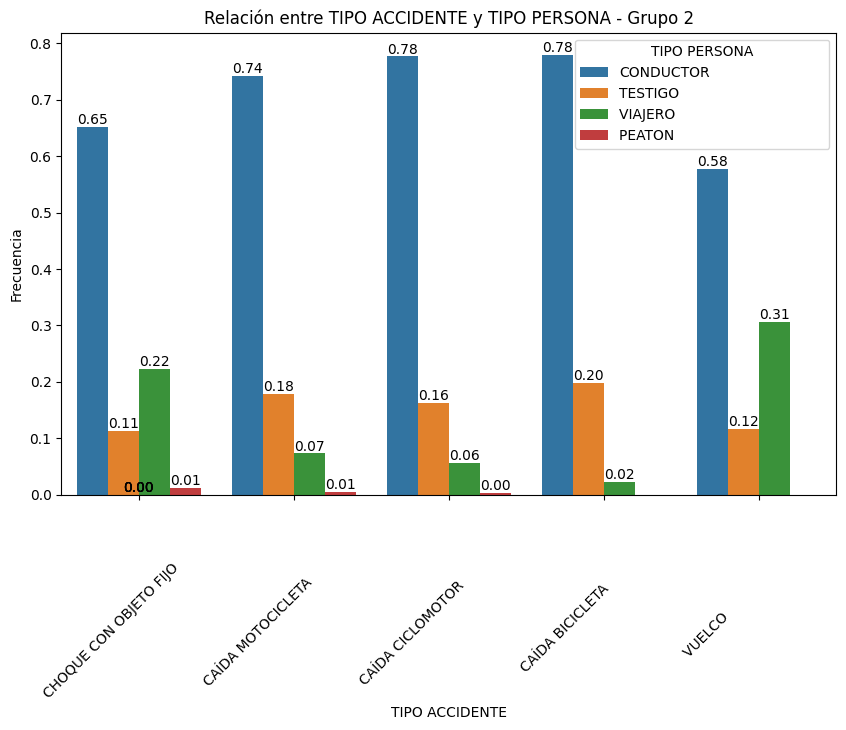

In [167]:
plot_categorical_relationship_fin(Accidentes_New,"TIPO ACCIDENTE","TIPO PERSONA", relative_freq= True, show_values=True)

In [198]:
tabla_contingencia = pd.crosstab(Accidentes_New['TIPO PERSONA'], Accidentes_New['TIPO ACCIDENTE'])

tabla_contingencia

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 9893.873483238509
P-Value: 0.0
Grados de Libertad: 27
Tabla de Frecuencias Esperadas:
 [[2.76629086e+03 1.09537692e+02 1.74517678e+02 8.03276406e+02
  1.33054258e+02 8.57735824e+02 9.61641917e+03 2.06141272e+03
  7.48816989e+01 1.00873694e+02]
 [2.67053591e+02 1.05746053e+01 1.68476762e+01 7.75471055e+01
  1.28448595e+01 8.28045364e+01 9.28354755e+02 1.99005708e+02
  7.22896746e+00 9.73819583e+00]
 [5.54318435e+02 2.19495219e+01 3.49704247e+01 1.60963161e+02
  2.66618486e+01 1.71875917e+02 1.92696961e+03 4.13072641e+02
  1.50050404e+01 2.02134015e+01]
 [8.82337114e+02 3.49381810e+01 5.56642206e+01 2.56213327e+02
  4.24390334e+01 2.73583722e+02 3.06725647e+03 6.57508932e+02
  2.38842932e+01 3.21747091e+01]]


In [196]:
'''
Dato a destacar es el de atropello, el cual tanto conductor como paton, se mantinen equilibrados en los porcentajes de lesividad'''

'\nDato a destacar es el de atropello, el cual tanto conductor como paton, se mantinen equilibrados en los porcentajes de lesividad'

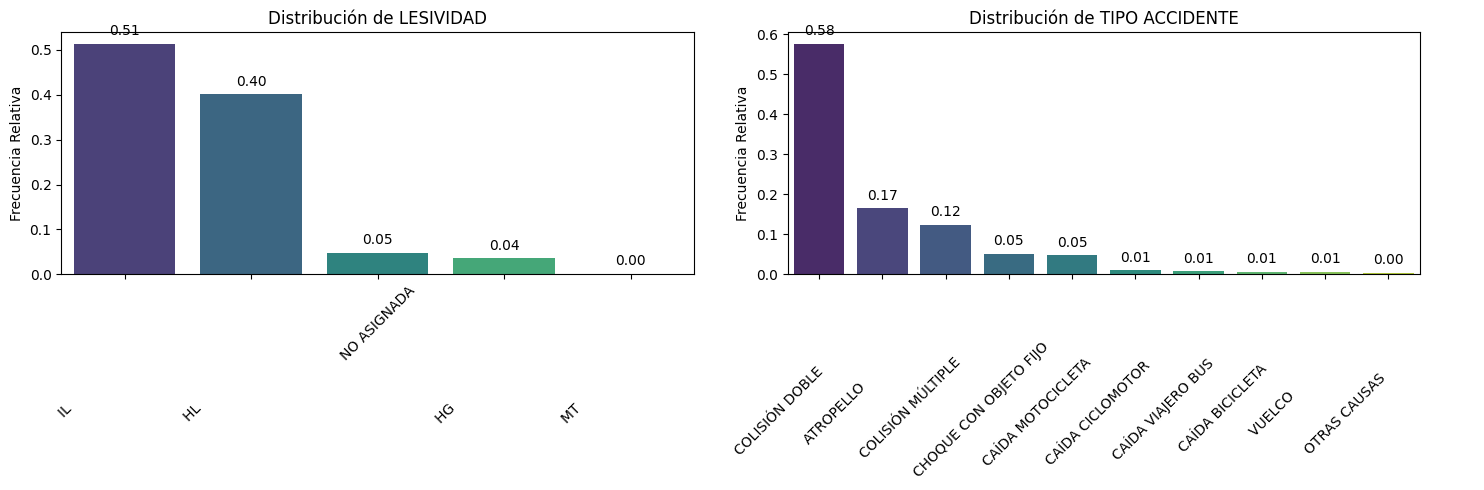

In [169]:
pinta_distribucion_categoricas(Accidentes_New,["LESIVIDAD","TIPO ACCIDENTE"],relativa= True, mostrar_valores= True)

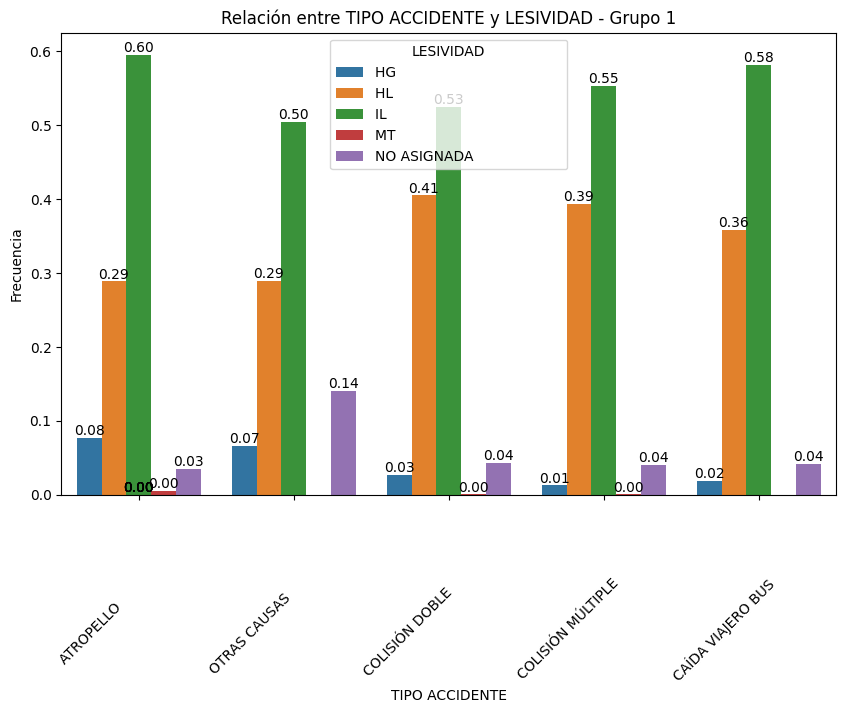

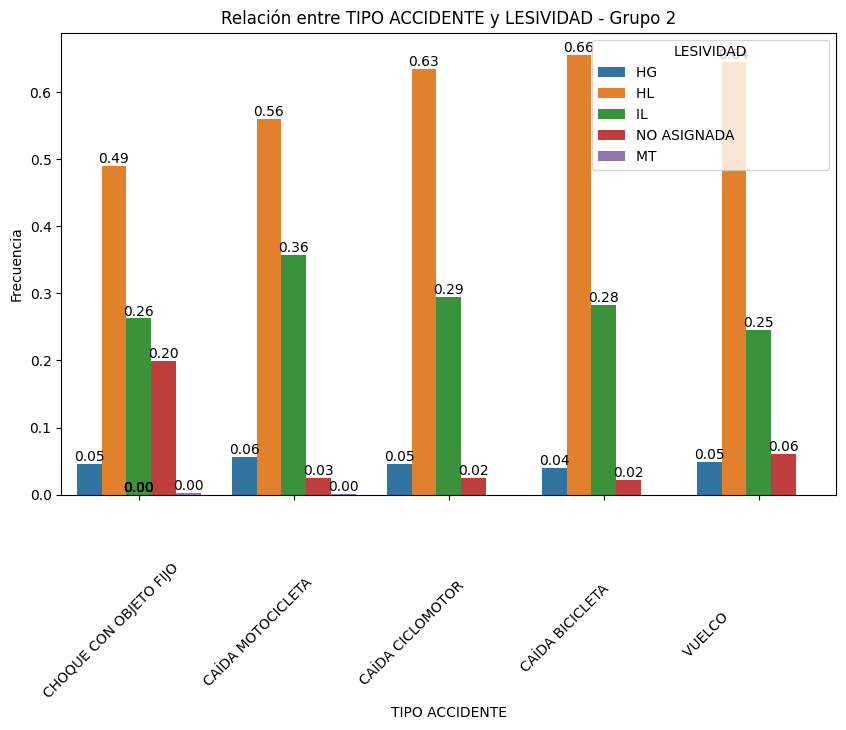

In [170]:
plot_categorical_relationship_fin(Accidentes_New,"TIPO ACCIDENTE","LESIVIDAD", relative_freq= True, show_values=True)

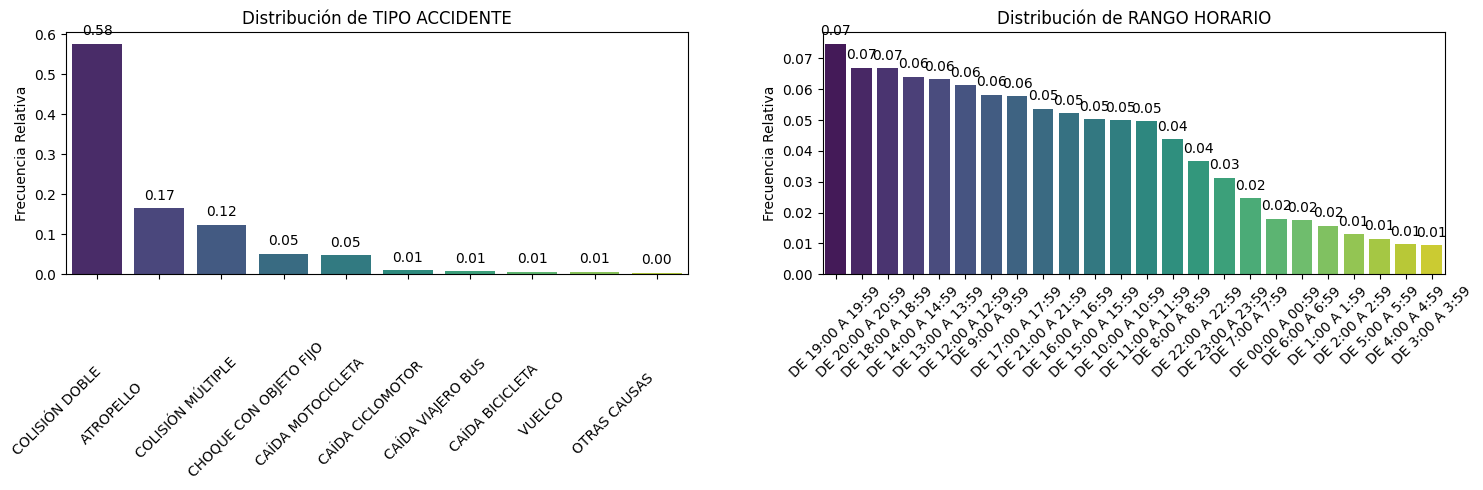

In [171]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO ACCIDENTE","RANGO HORARIO"],relativa= True, mostrar_valores= True)

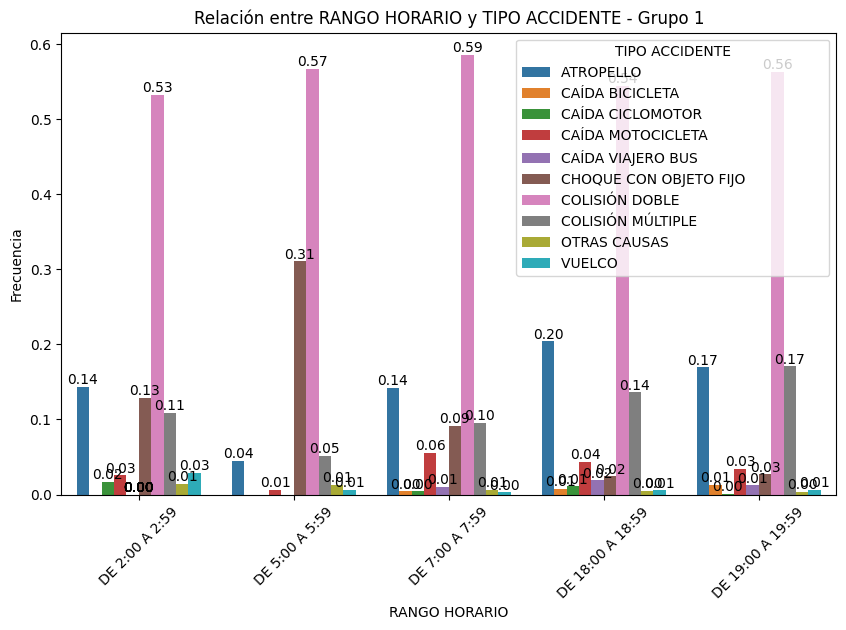

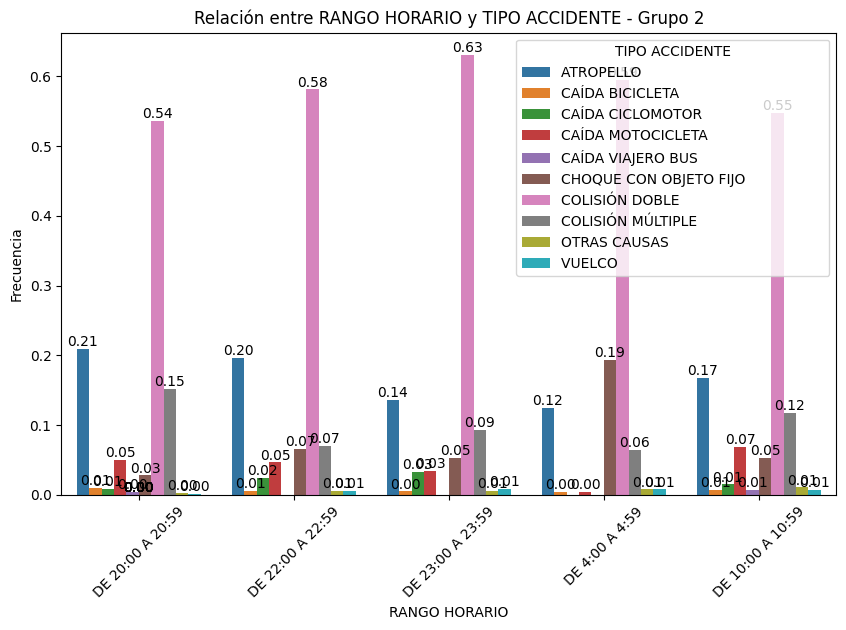

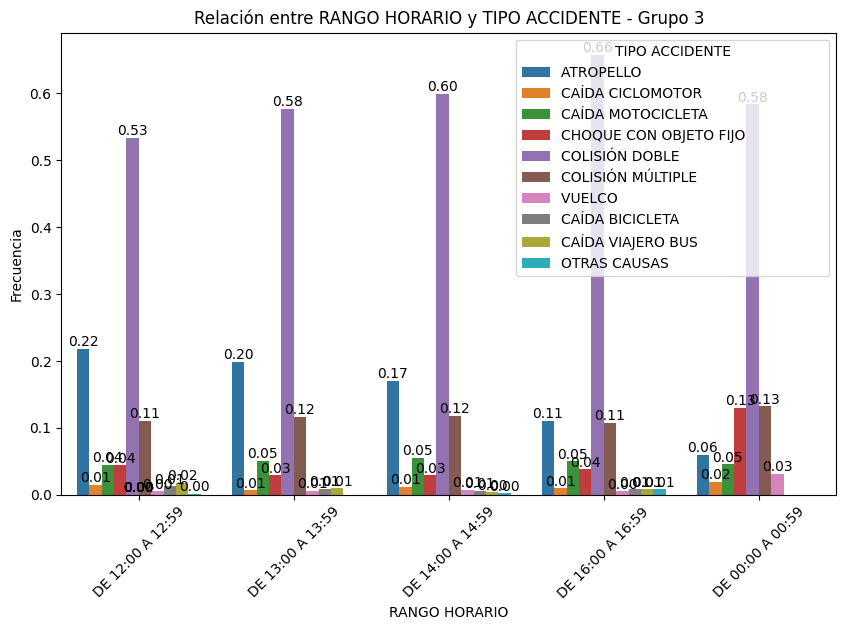

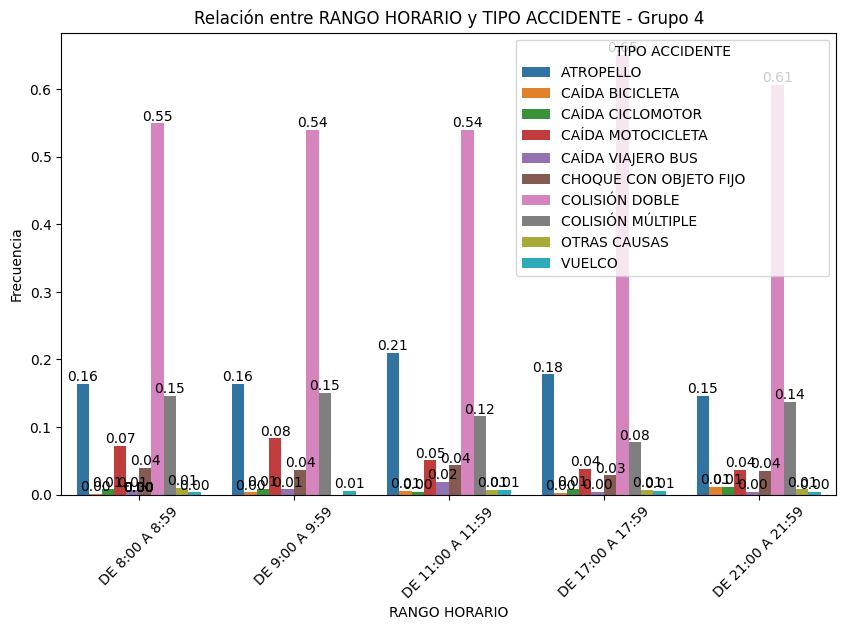

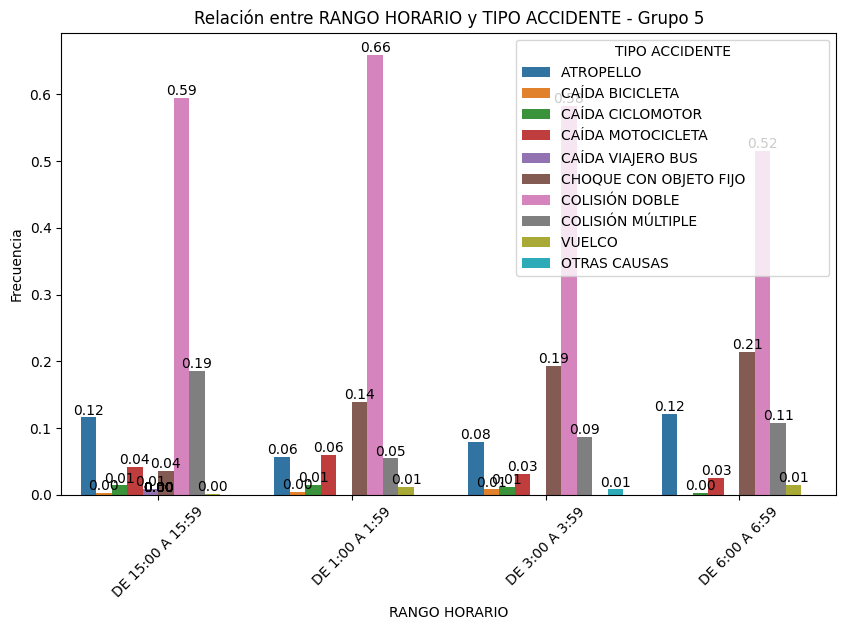

In [172]:
plot_categorical_relationship_fin(Accidentes_New,"RANGO HORARIO","TIPO ACCIDENTE", relative_freq= True, show_values=True)

Analisis multivariantes categóricos 

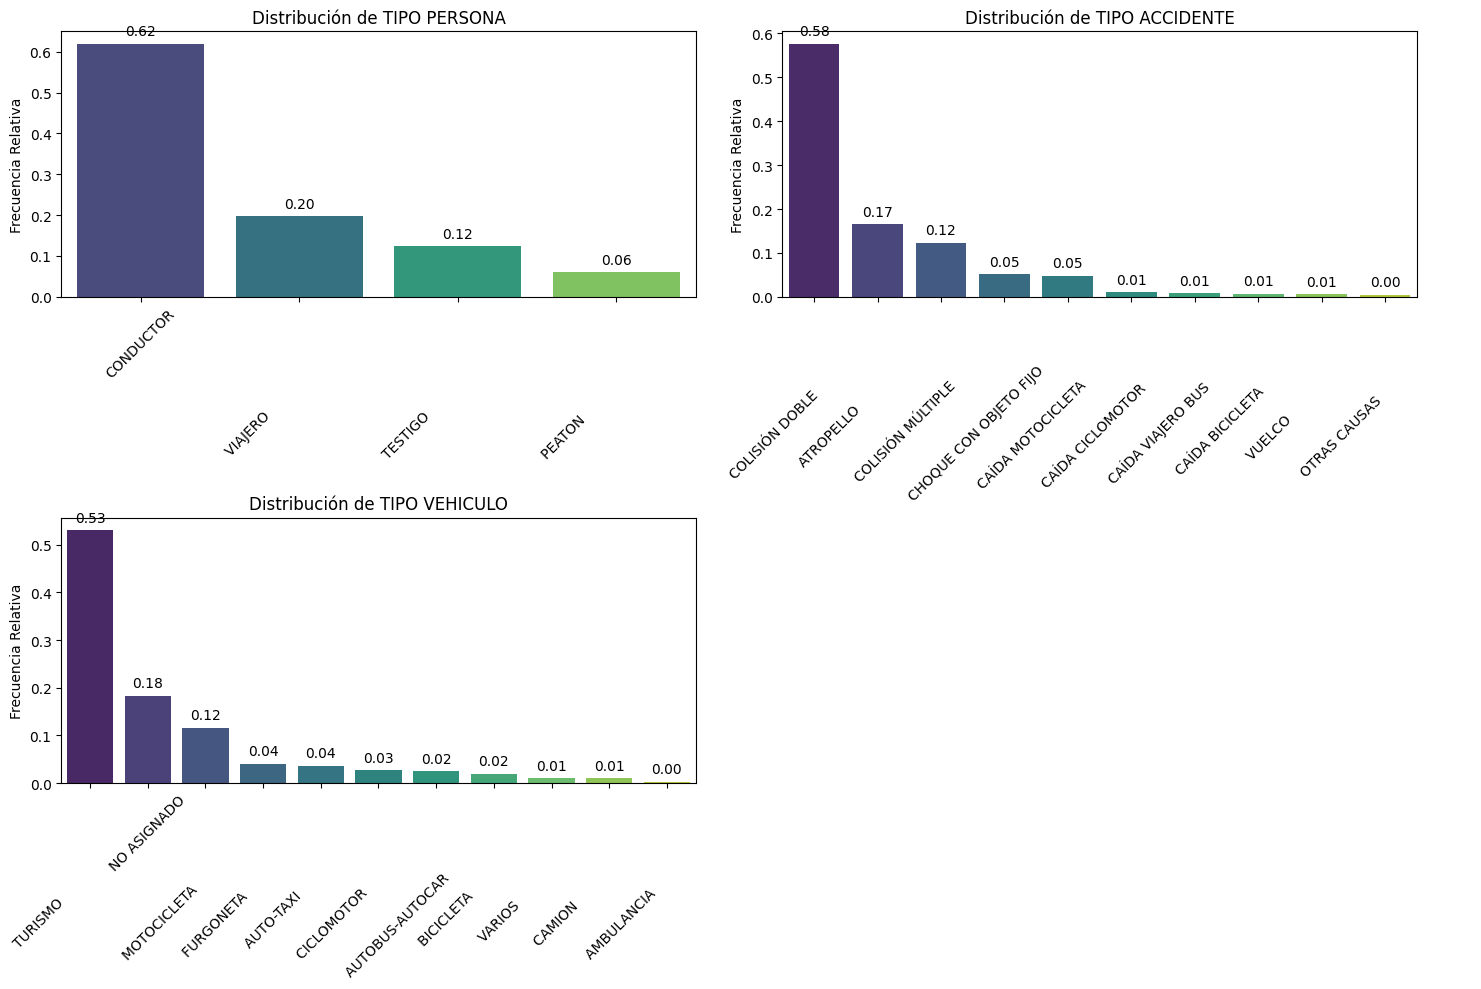

In [173]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO PERSONA","TIPO ACCIDENTE","TIPO VEHICULO"],relativa= True, mostrar_valores= True)

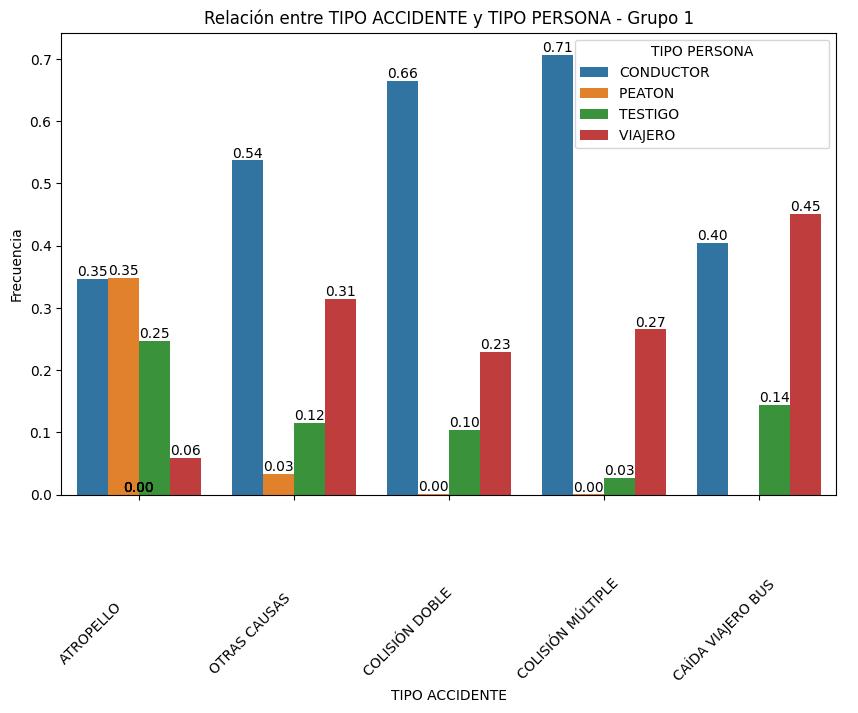

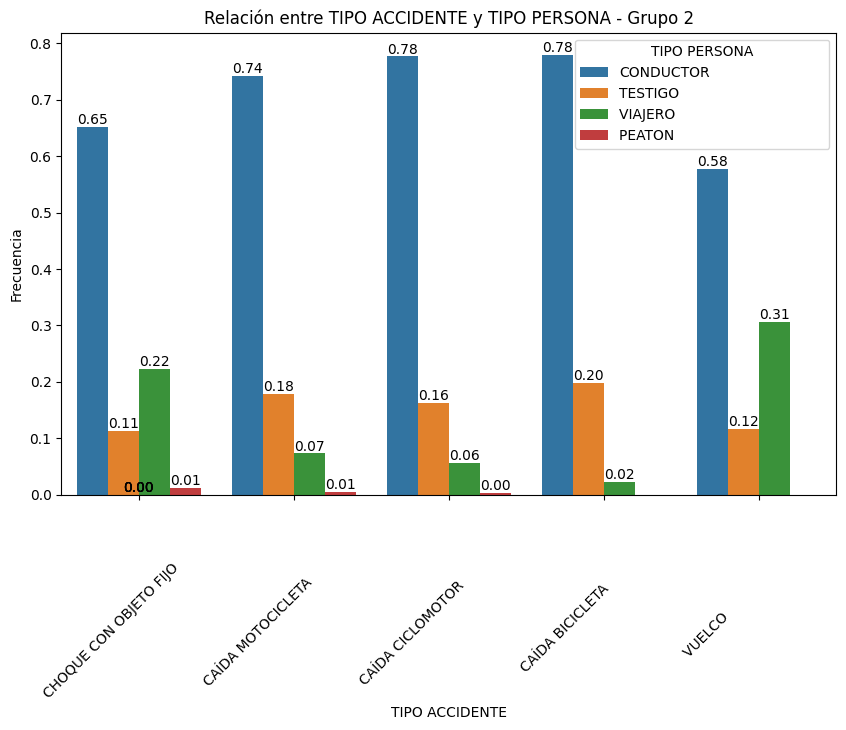

In [174]:
plot_categorical_relationship_fin(Accidentes_New,"TIPO ACCIDENTE","TIPO PERSONA", relative_freq= True, show_values=True)

In [175]:
columnas = ["TIPO PERSONA","TIPO VEHICULO","TIPO ACCIDENTE"] 
col_directora = "TIPO PERSONA"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in Accidentes_New[col_directora].unique():
    diccionario_multivariante[valor] = Accidentes_New.loc[Accidentes_New[col_directora] == valor,[col_2,col_1]] 

Respuesta PEATON                                  :


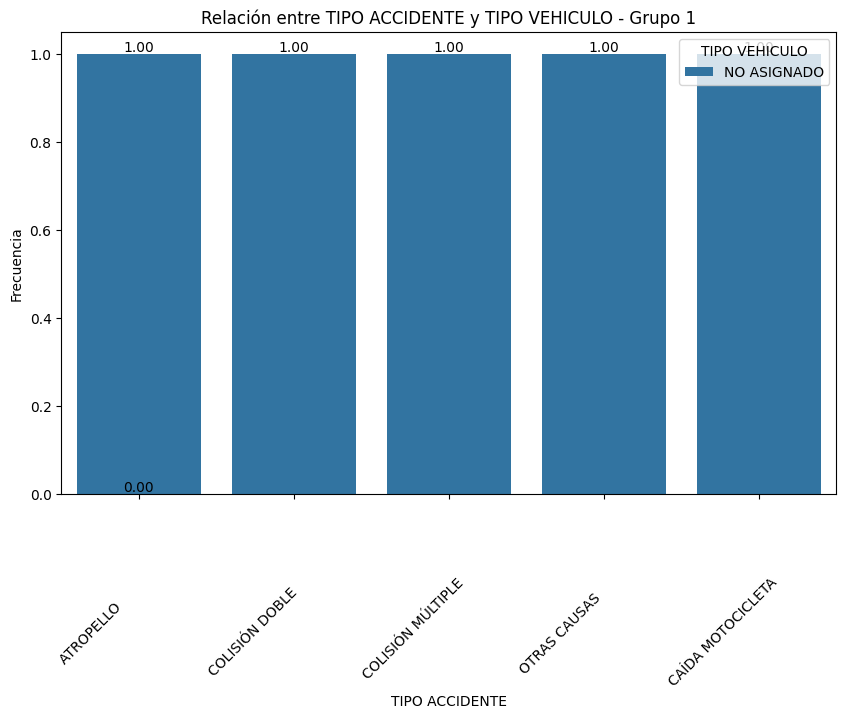

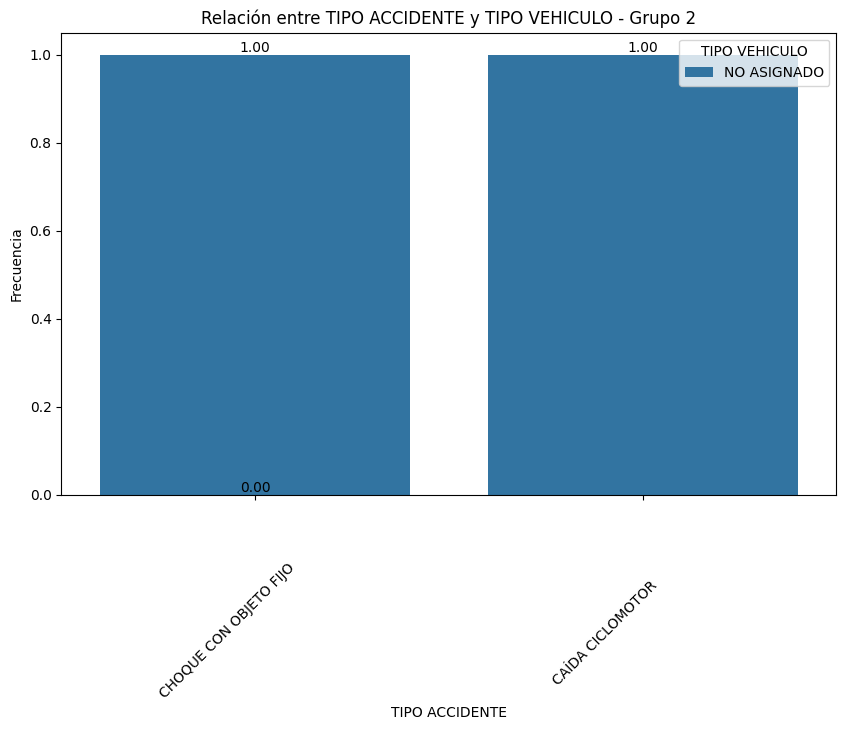

Respuesta TESTIGO                                 :


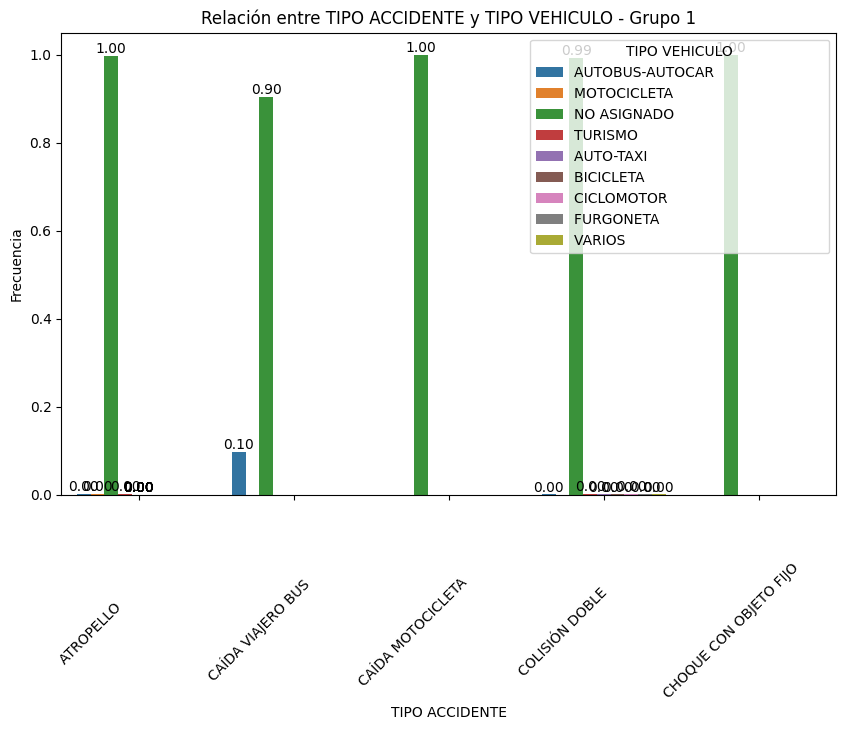

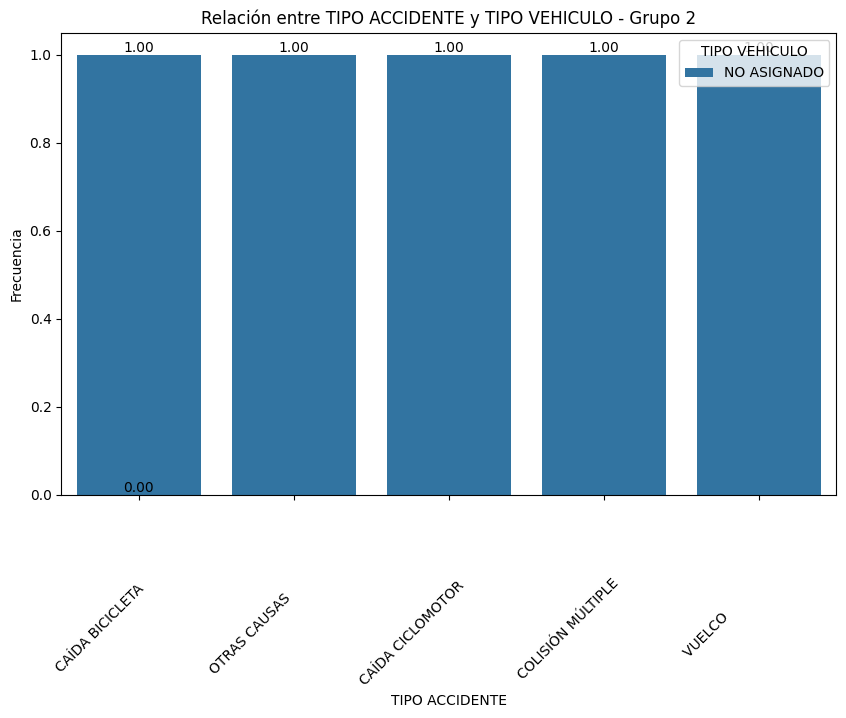

Respuesta CONDUCTOR:


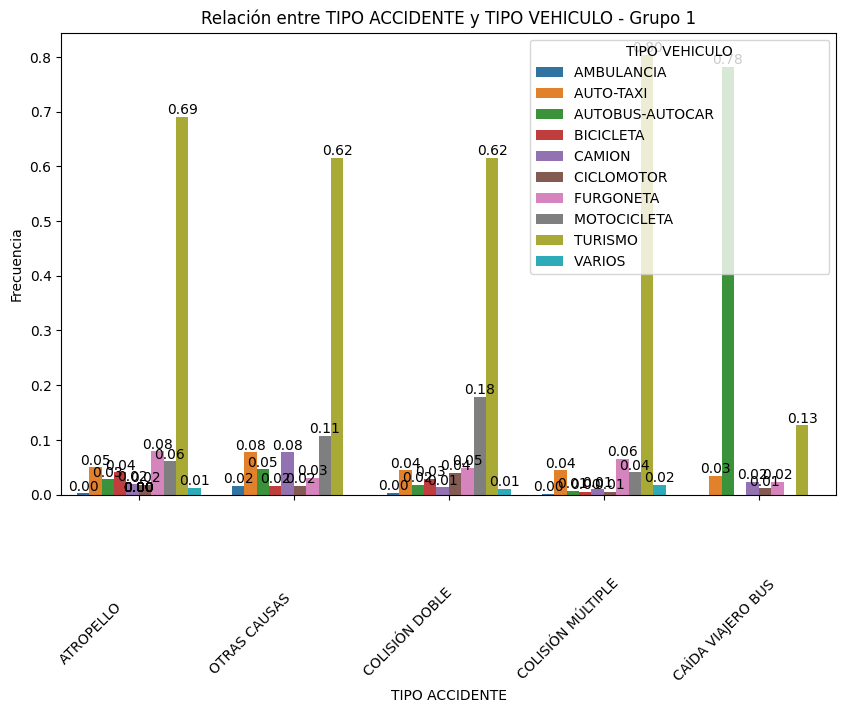

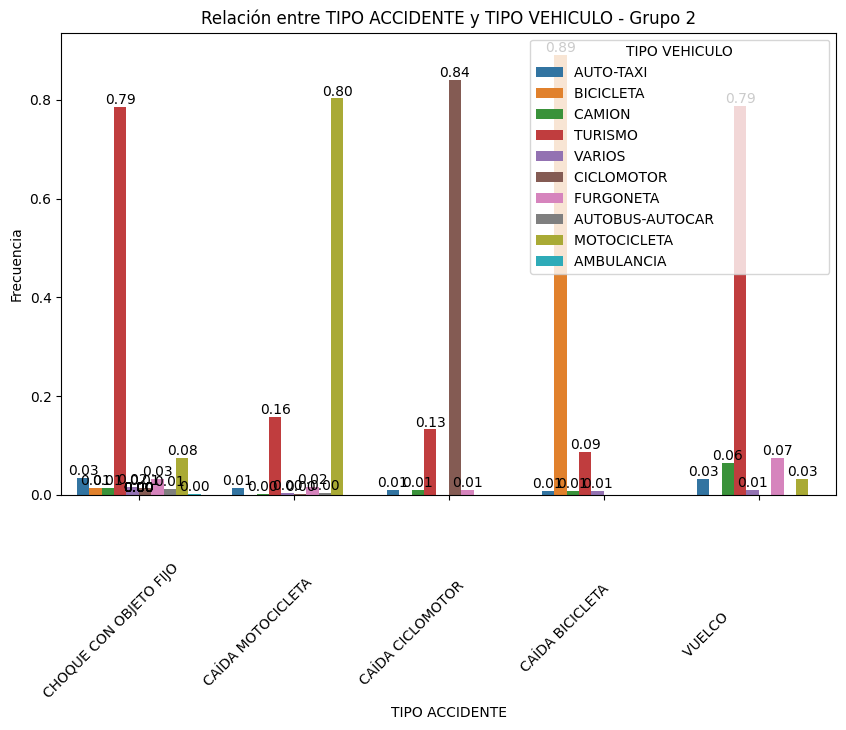

Respuesta VIAJERO                                 :


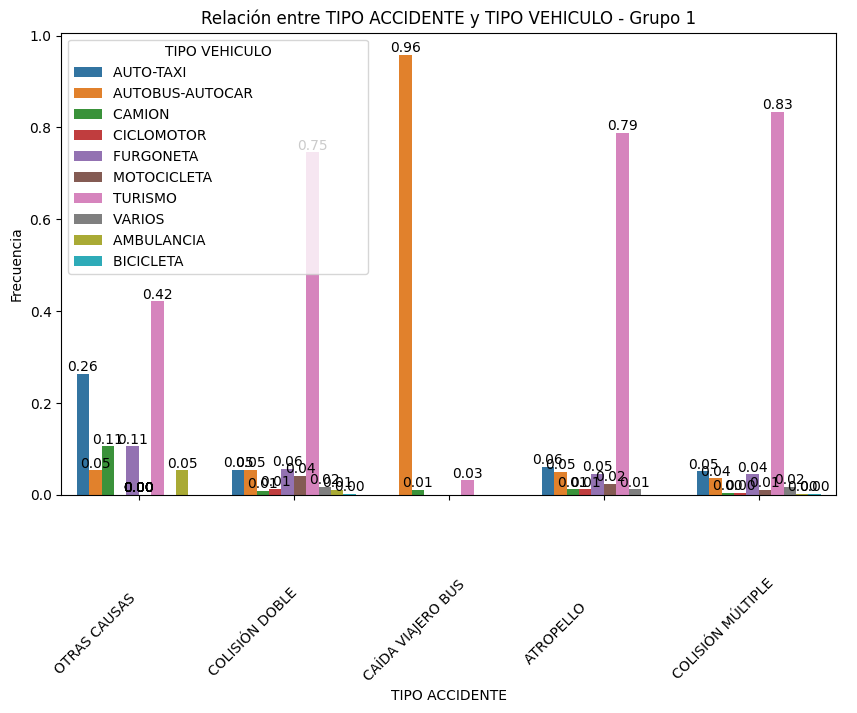

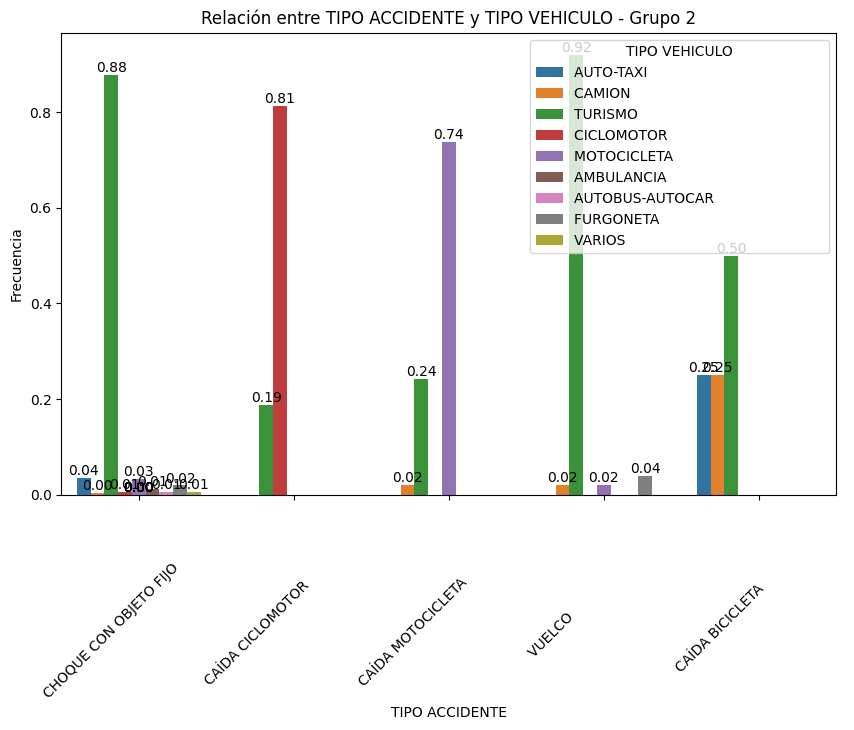

In [176]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

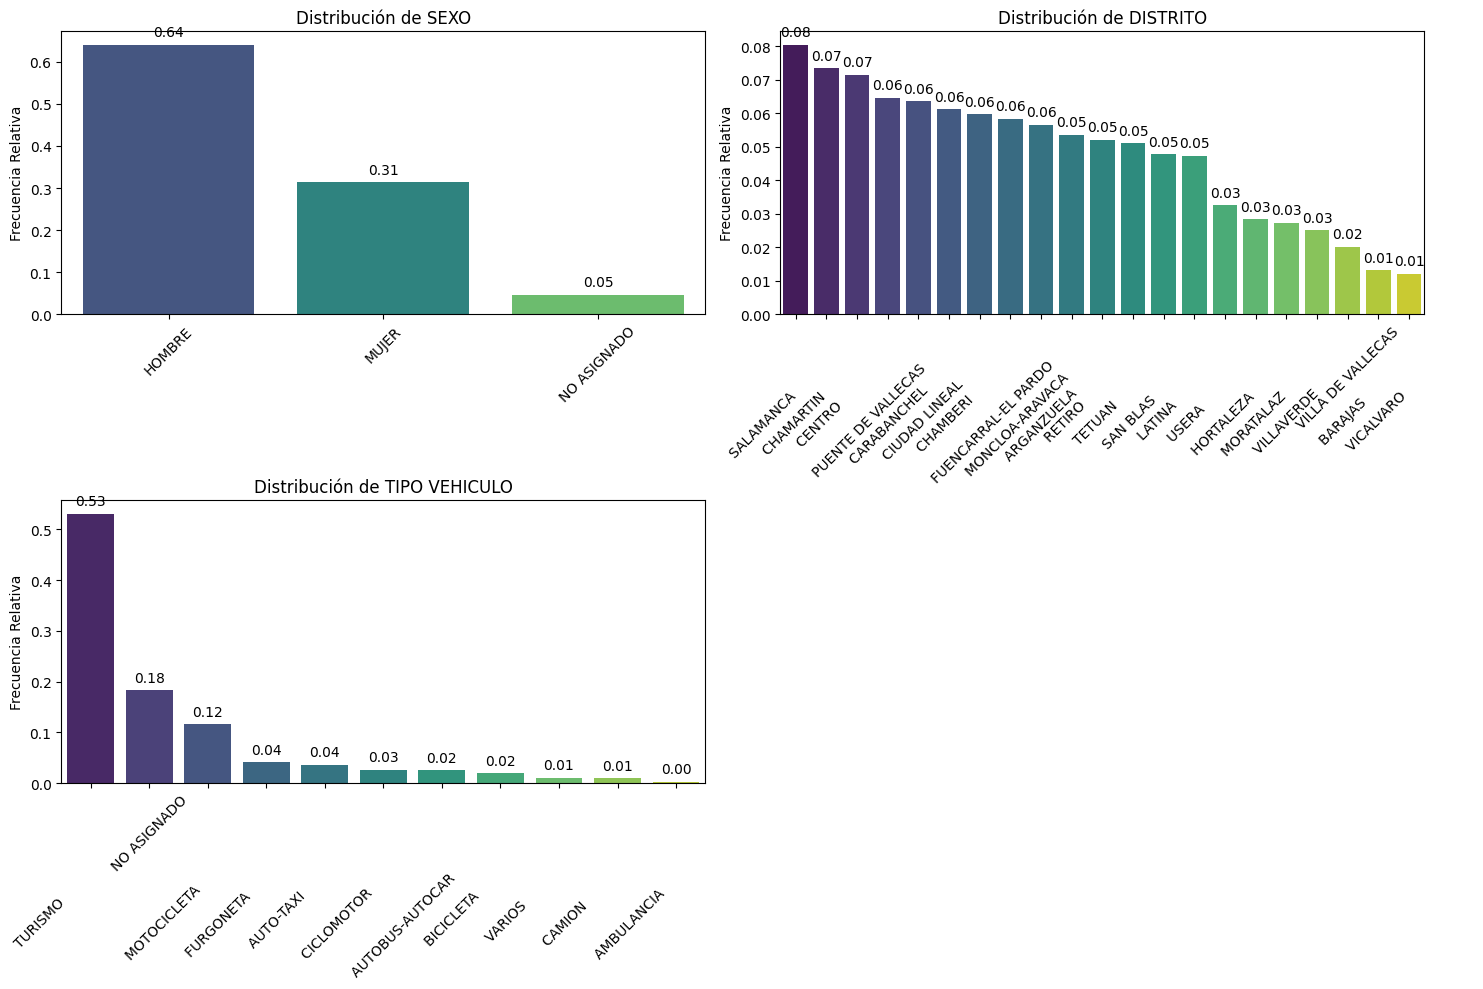

In [177]:
pinta_distribucion_categoricas(Accidentes_New,["SEXO","DISTRITO","TIPO VEHICULO"],relativa= True, mostrar_valores= True)

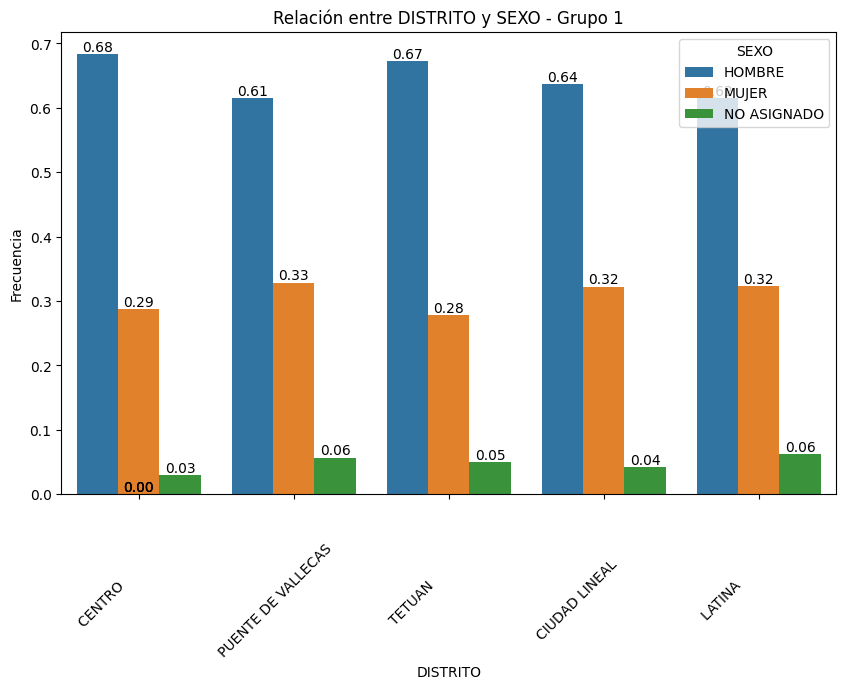

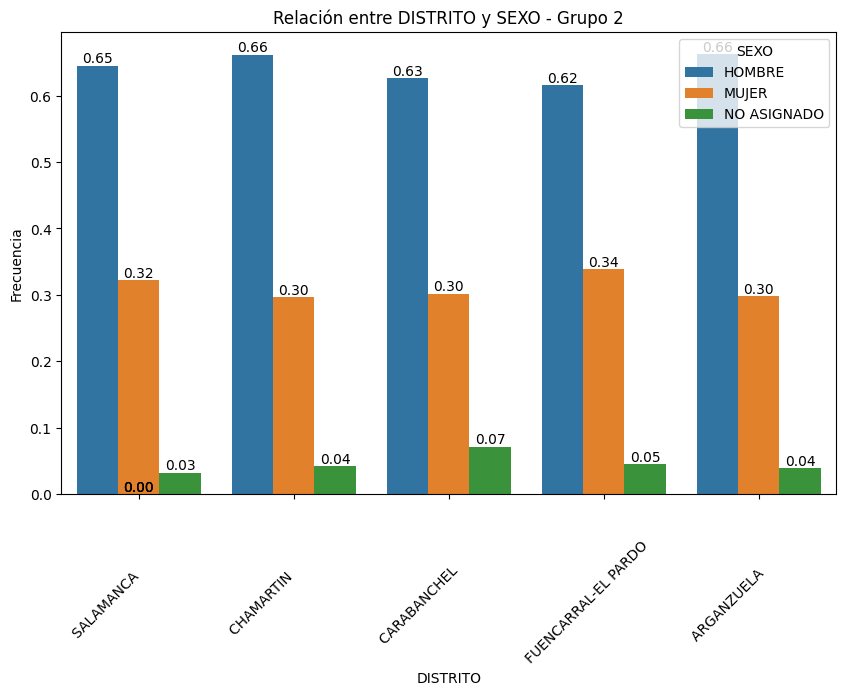

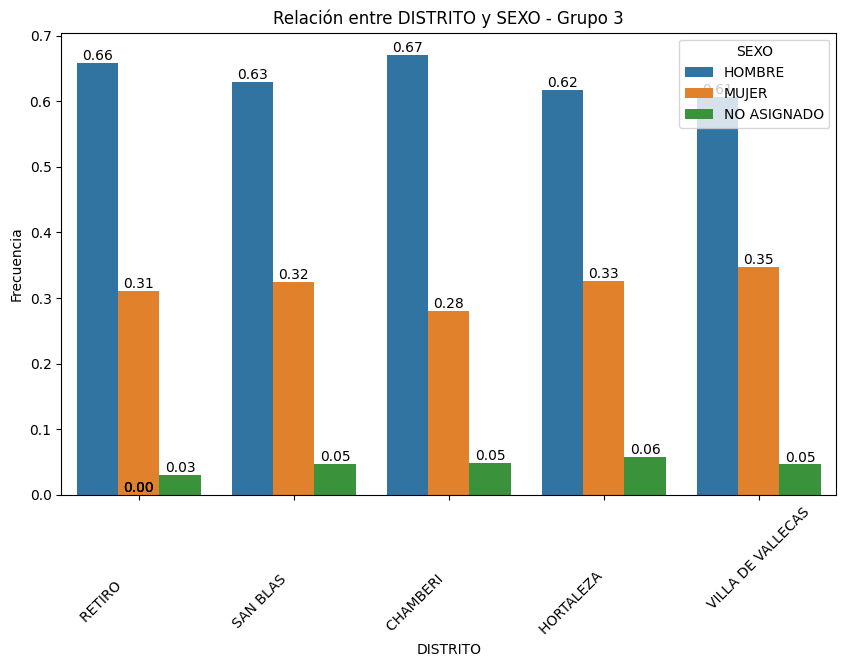

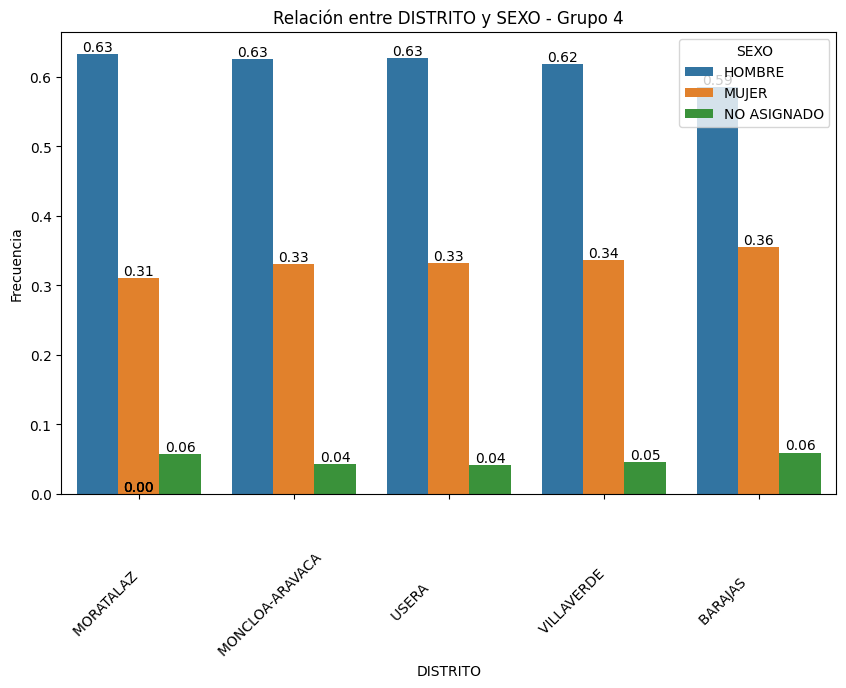

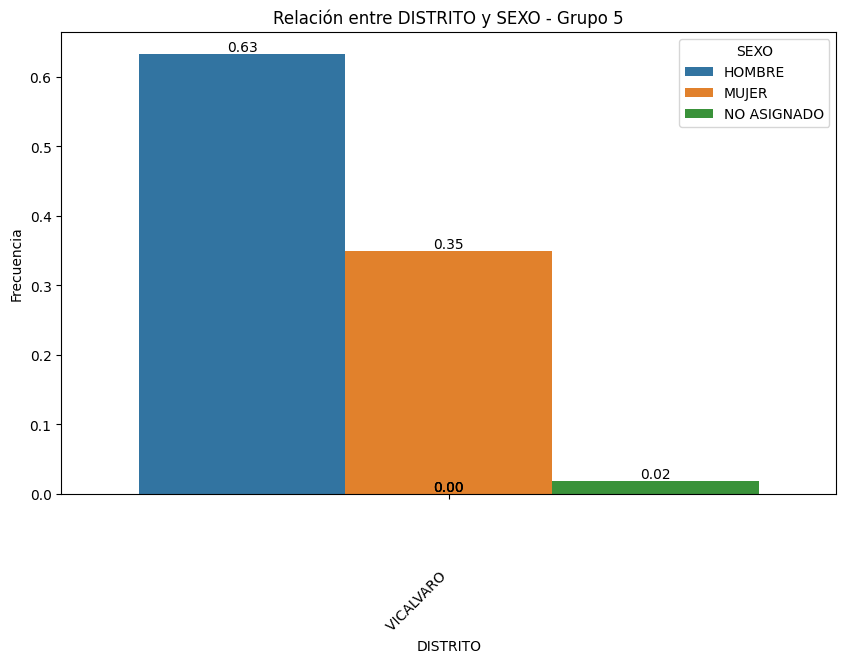

In [178]:
plot_categorical_relationship_fin(Accidentes_New,"DISTRITO","SEXO", relative_freq= True, show_values=True)

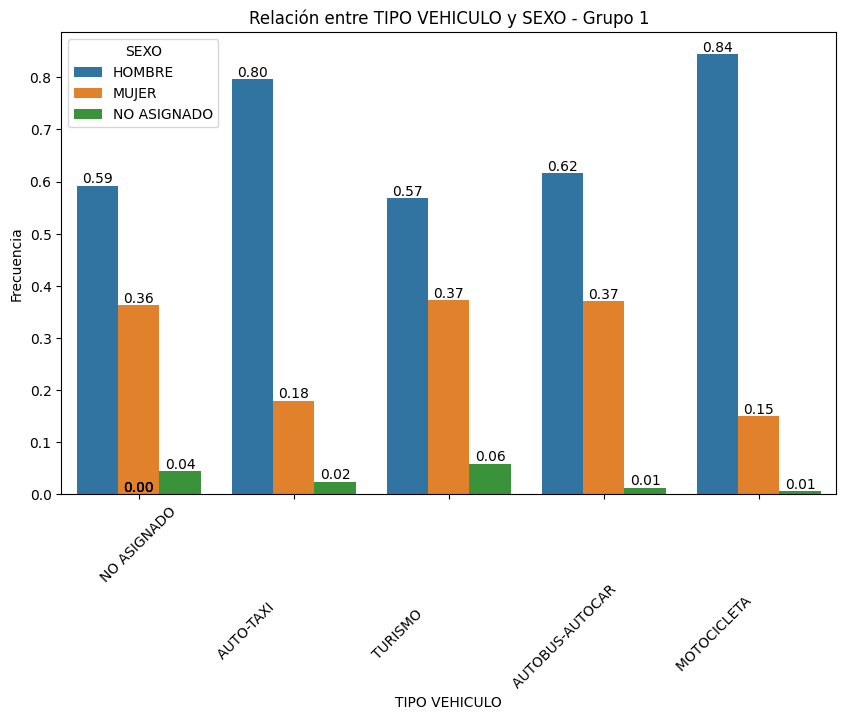

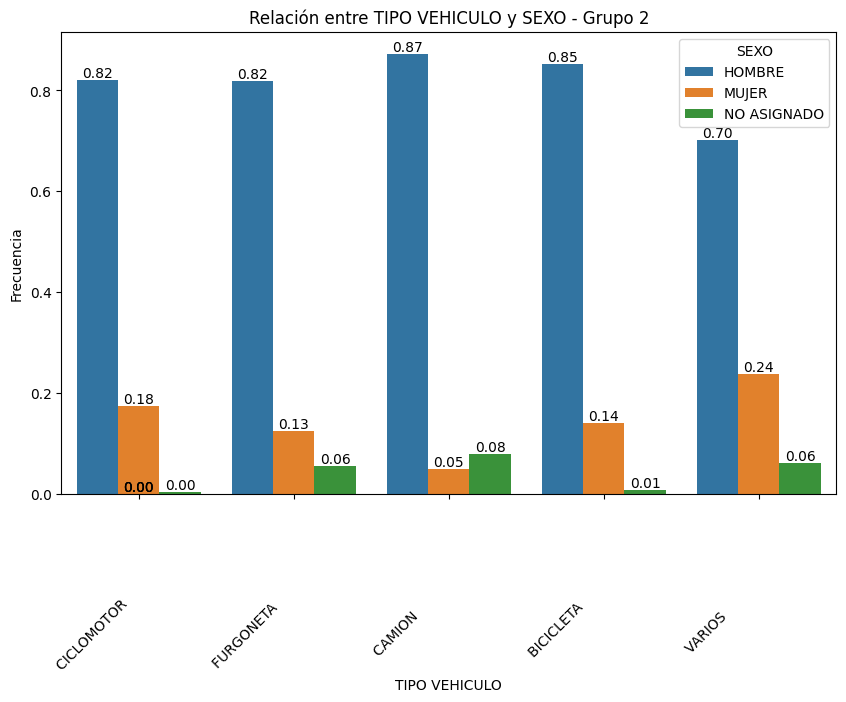

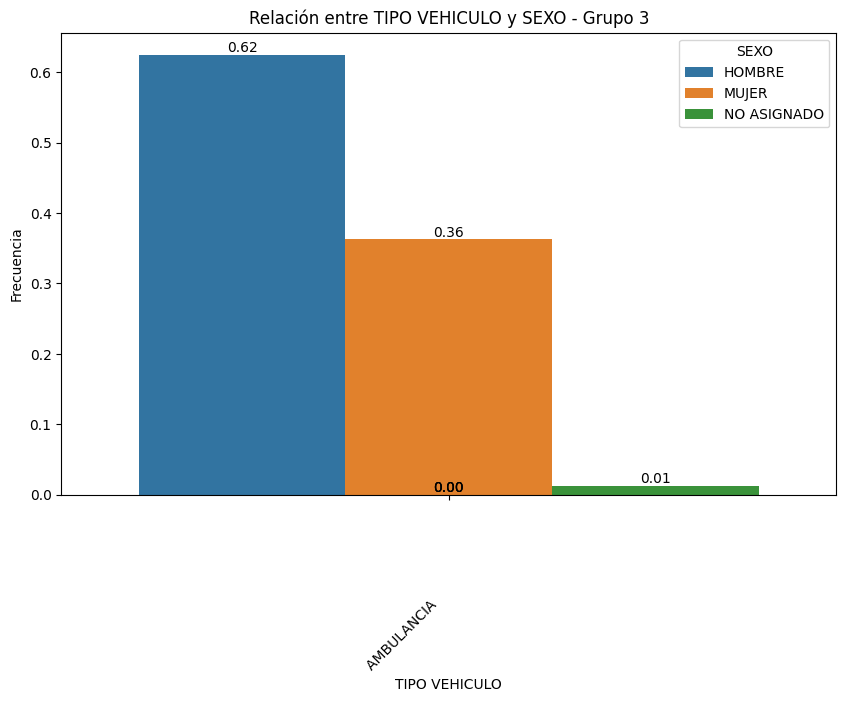

In [179]:
plot_categorical_relationship_fin(Accidentes_New,"TIPO VEHICULO","SEXO", relative_freq= True, show_values=True)

In [180]:
columnas = ["SEXO","TIPO VEHICULO","DISTRITO"] 
col_directora = "SEXO"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in Accidentes_New[col_directora].unique():
    diccionario_multivariante[valor] = Accidentes_New.loc[Accidentes_New[col_directora] == valor,[col_2,col_1]] 

Respuesta HOMBRE:


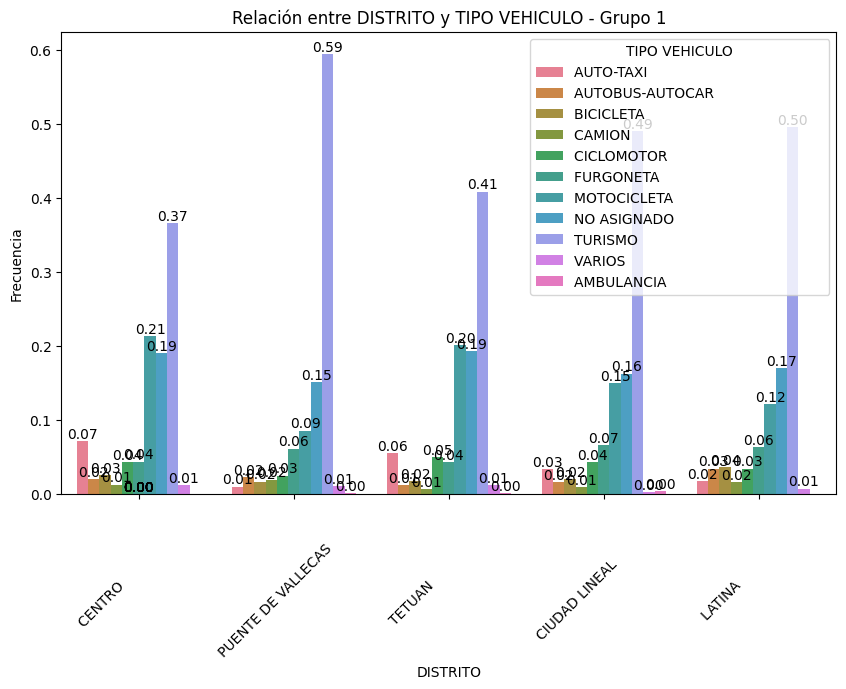

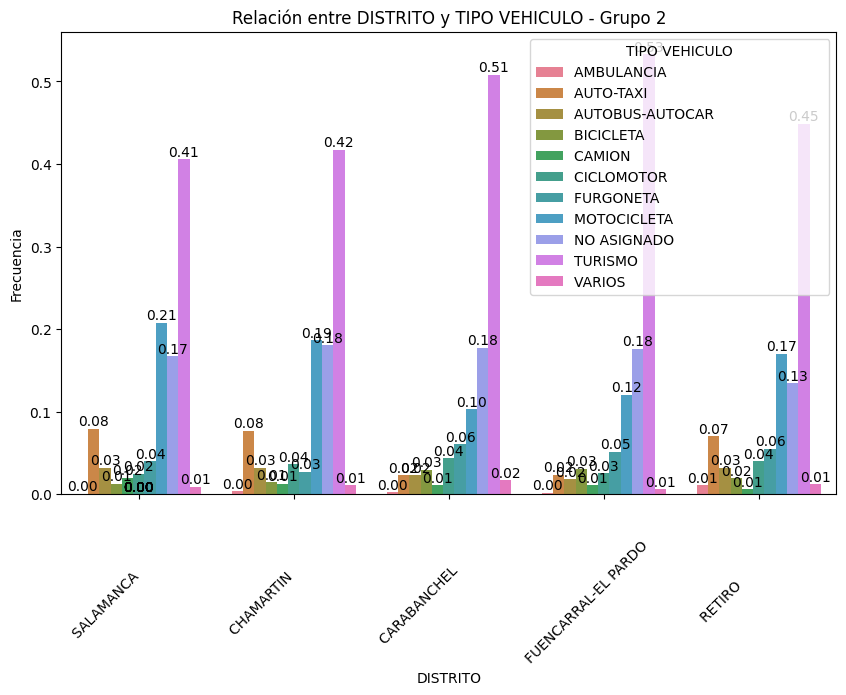

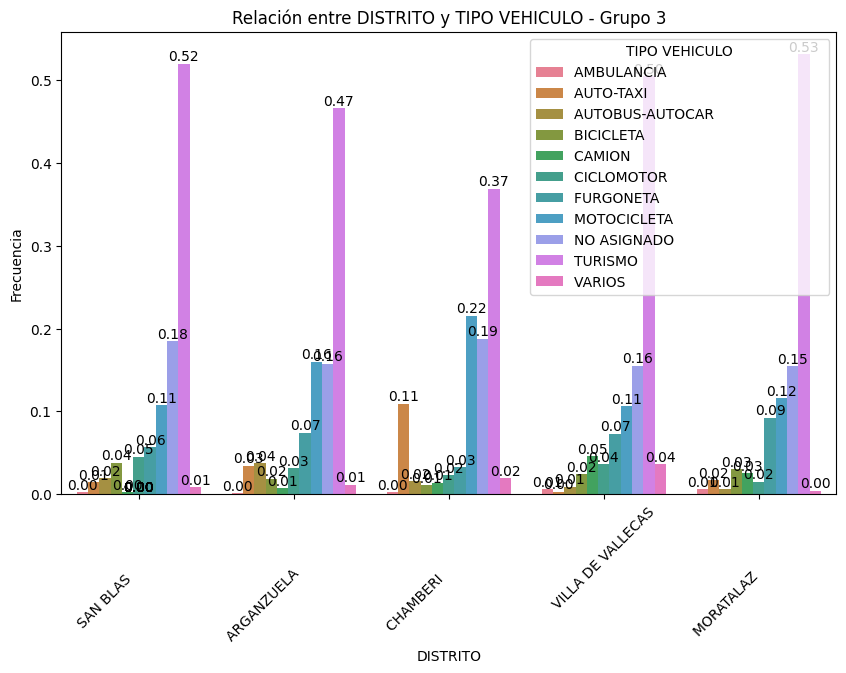

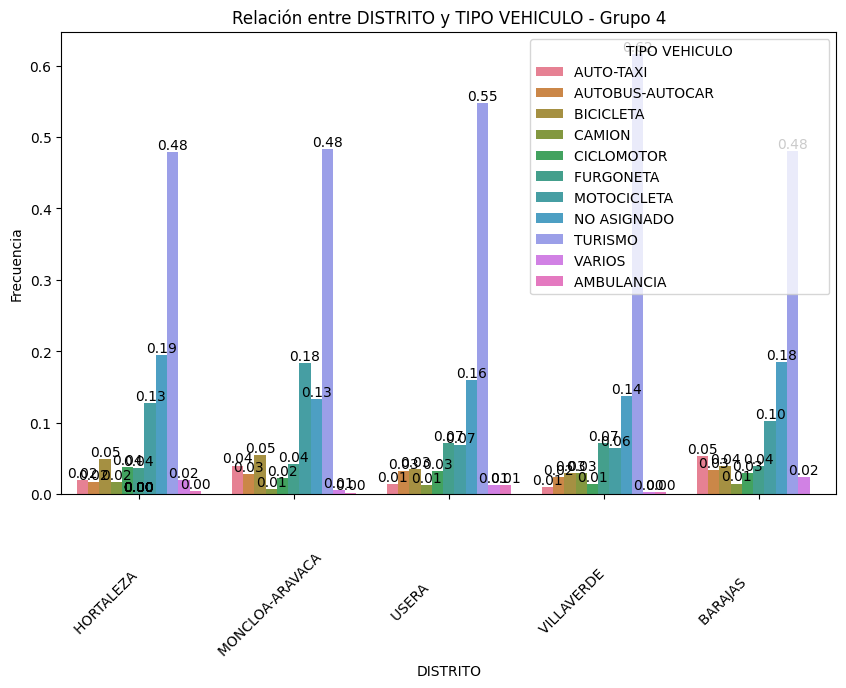

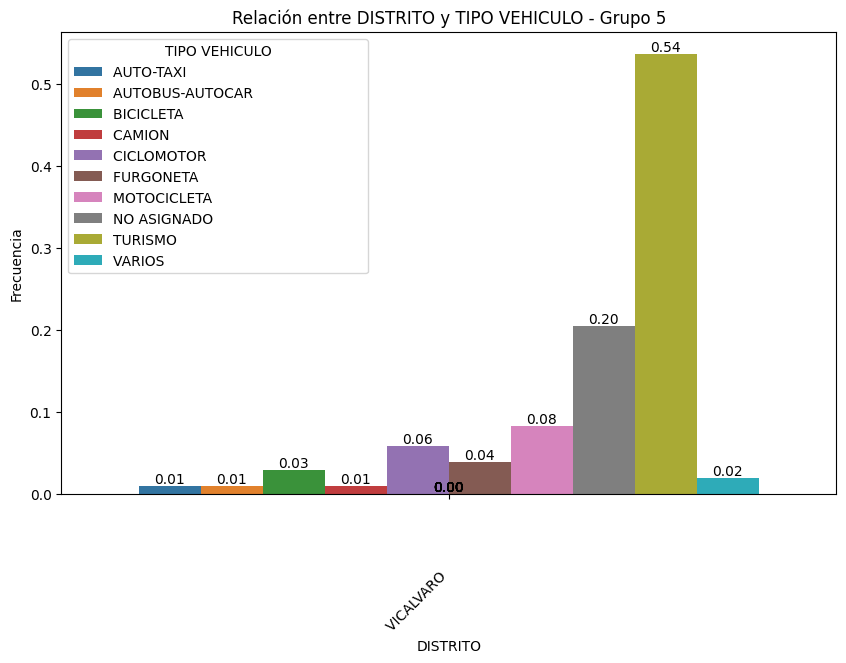

Respuesta MUJER:


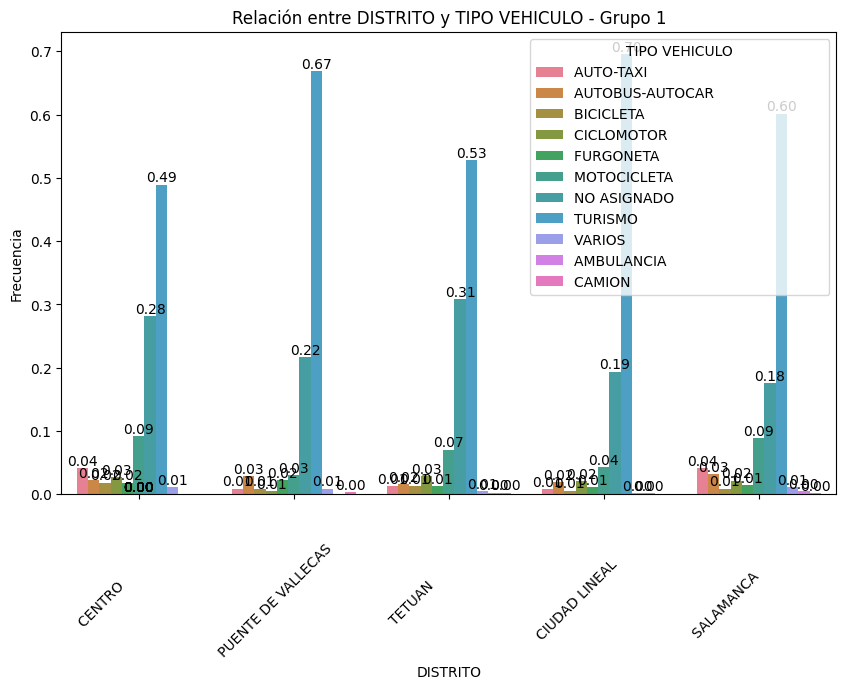

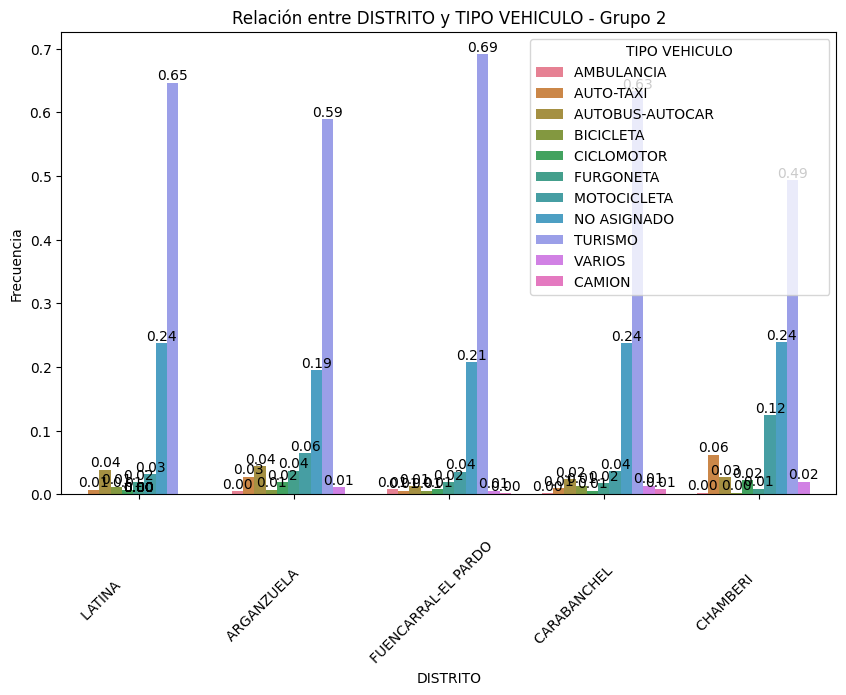

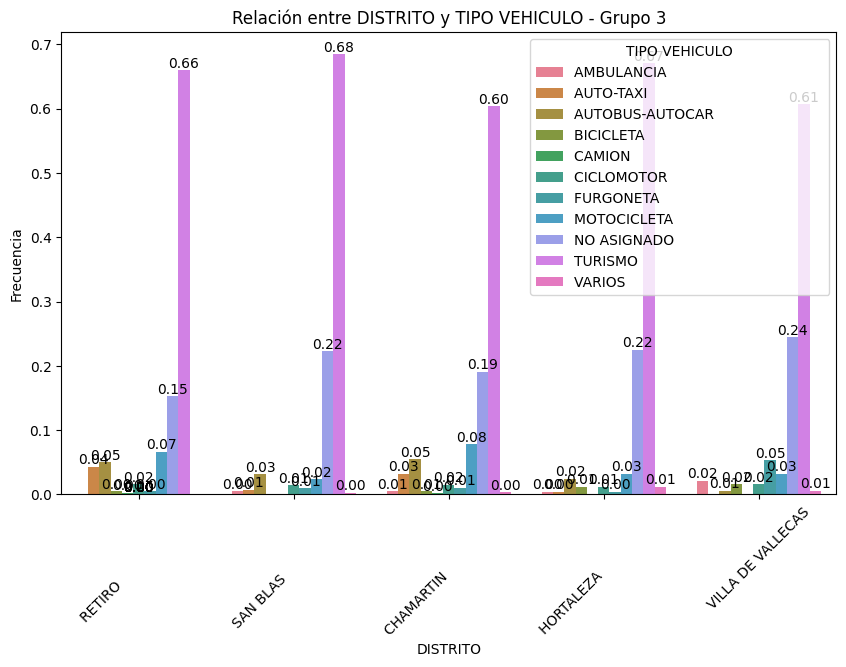

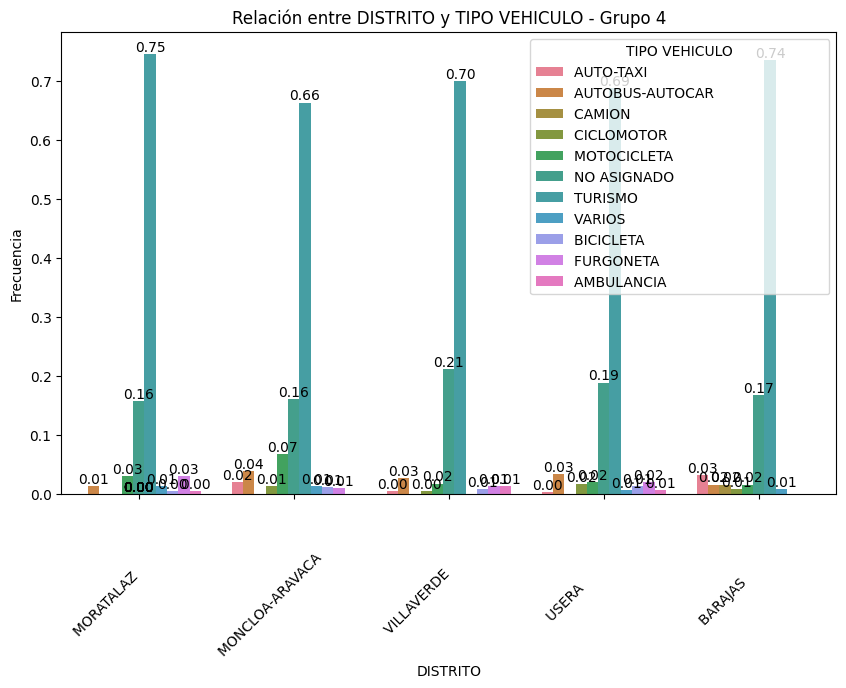

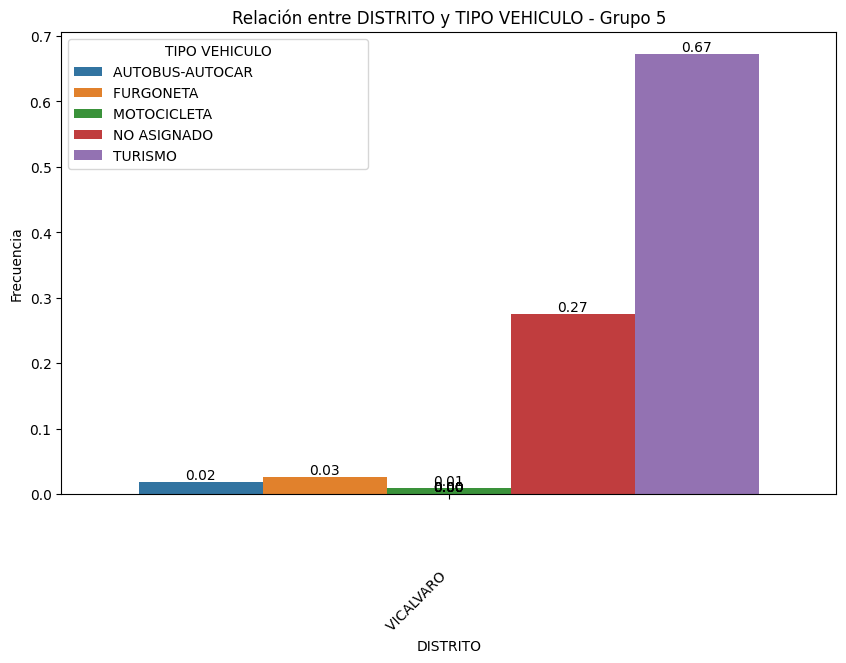

Respuesta NO ASIGNADO:


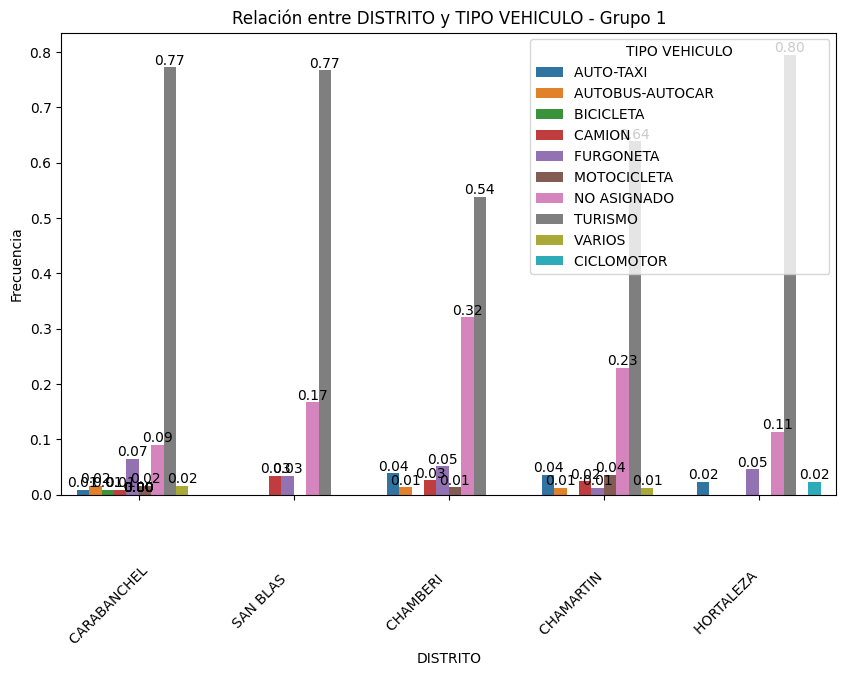

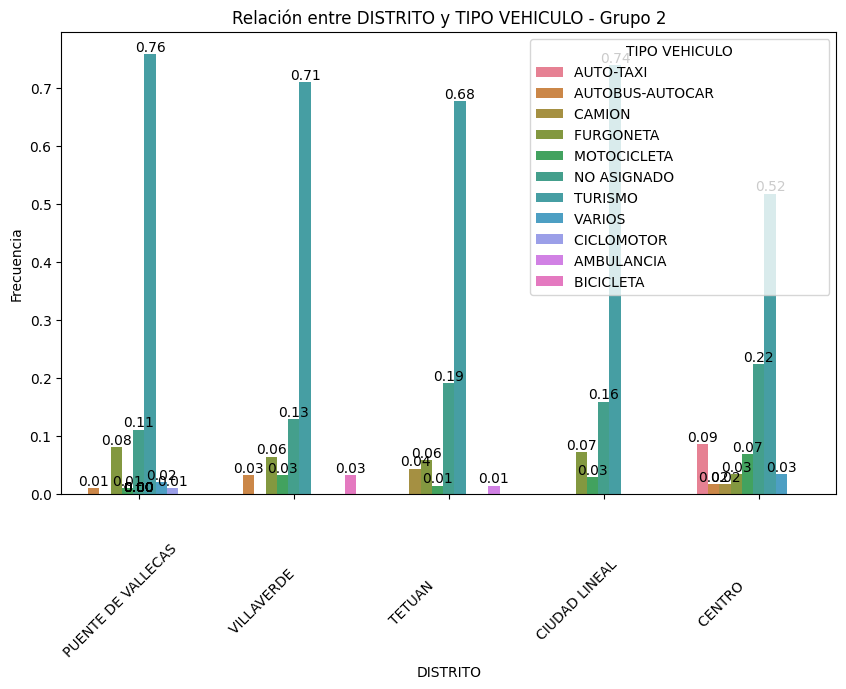

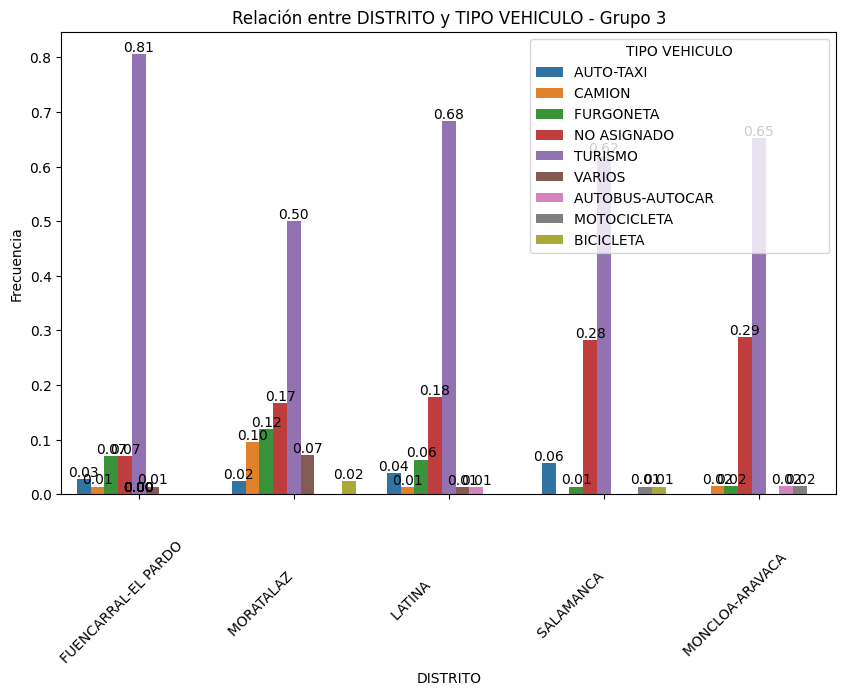

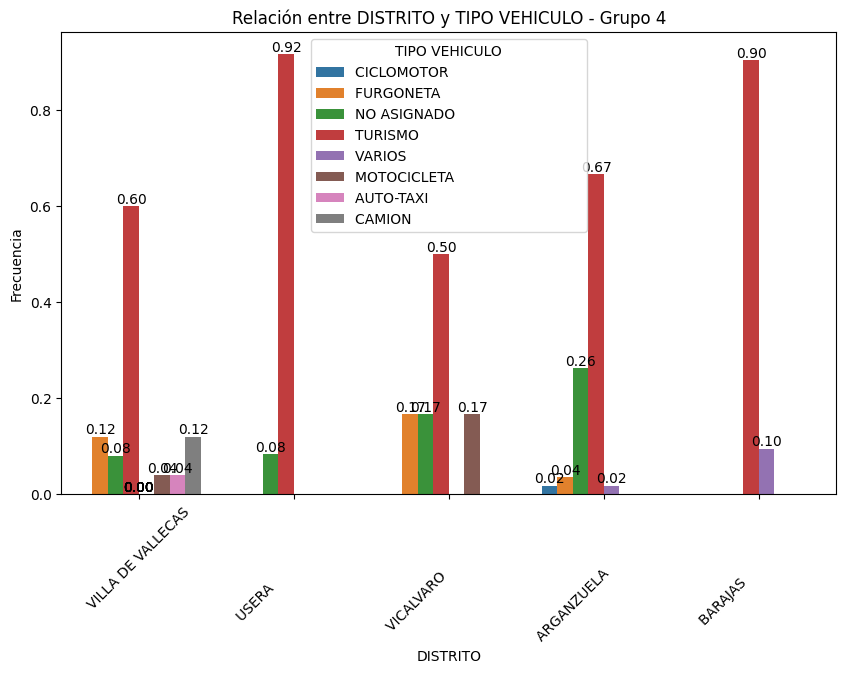

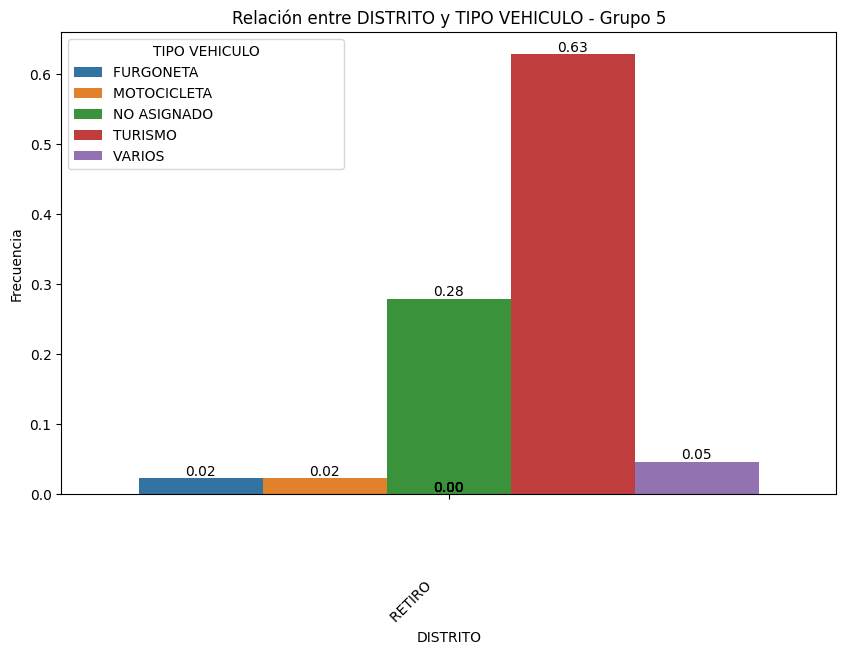

In [181]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

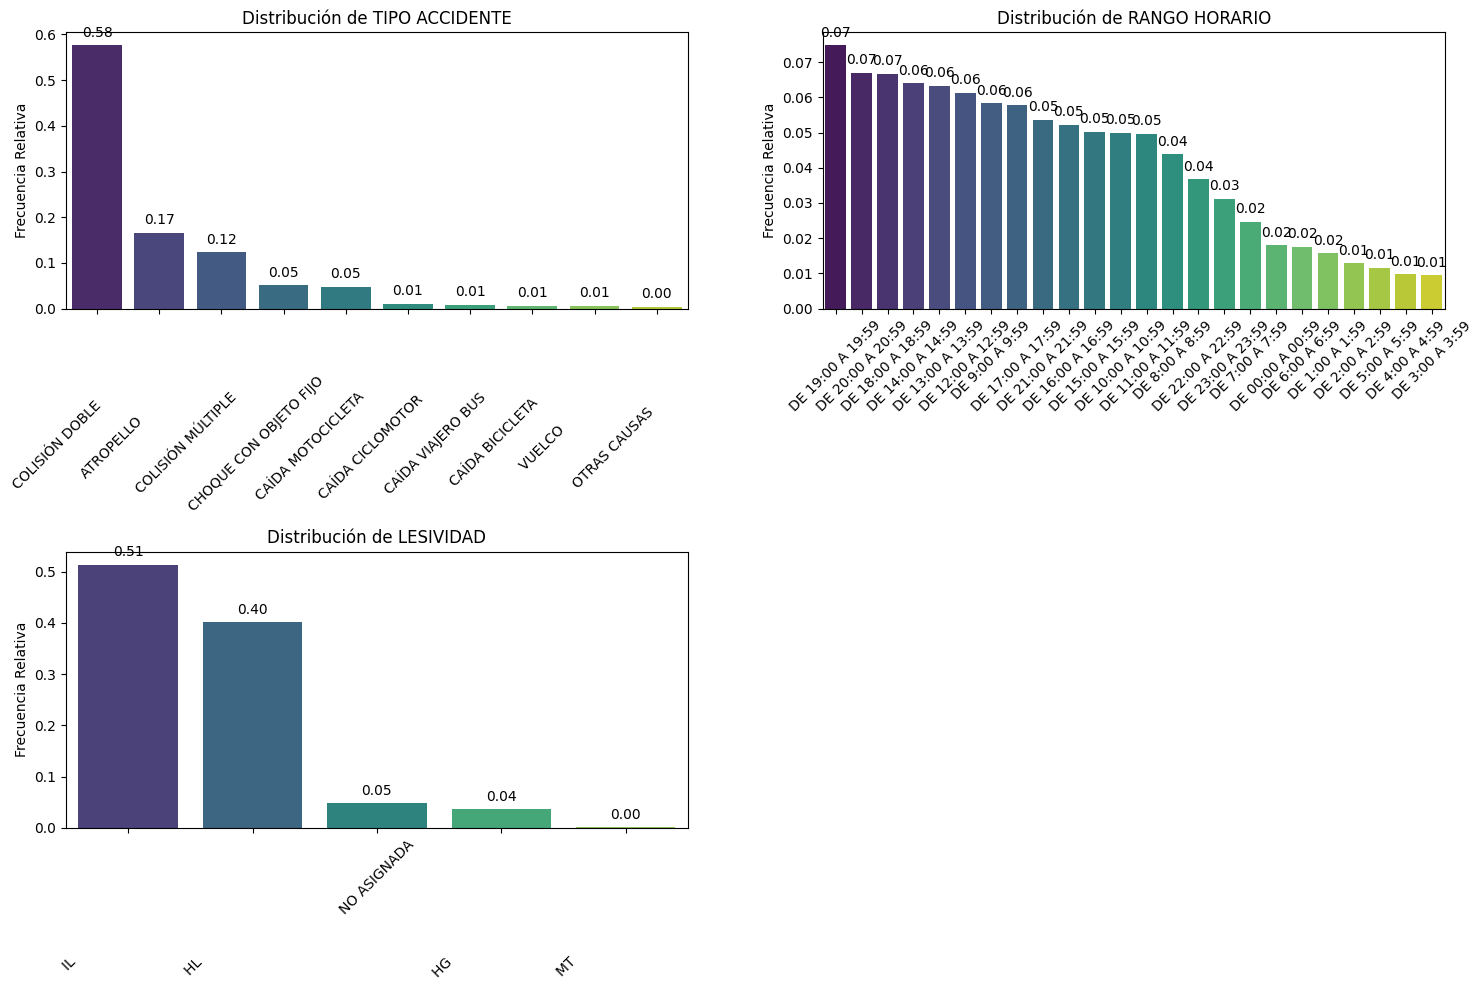

In [182]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO ACCIDENTE","RANGO HORARIO","LESIVIDAD"],relativa= True, mostrar_valores= True)

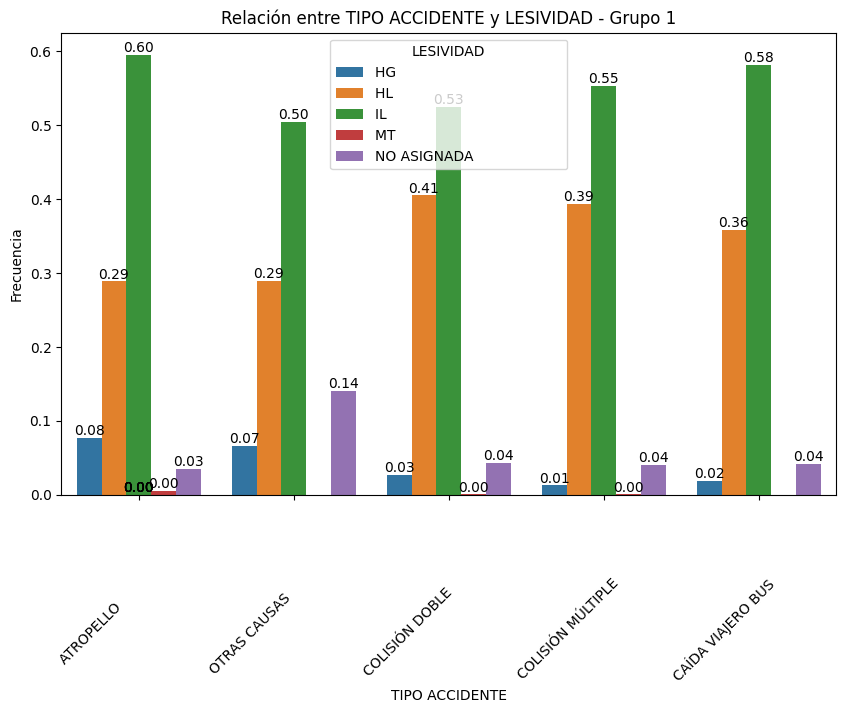

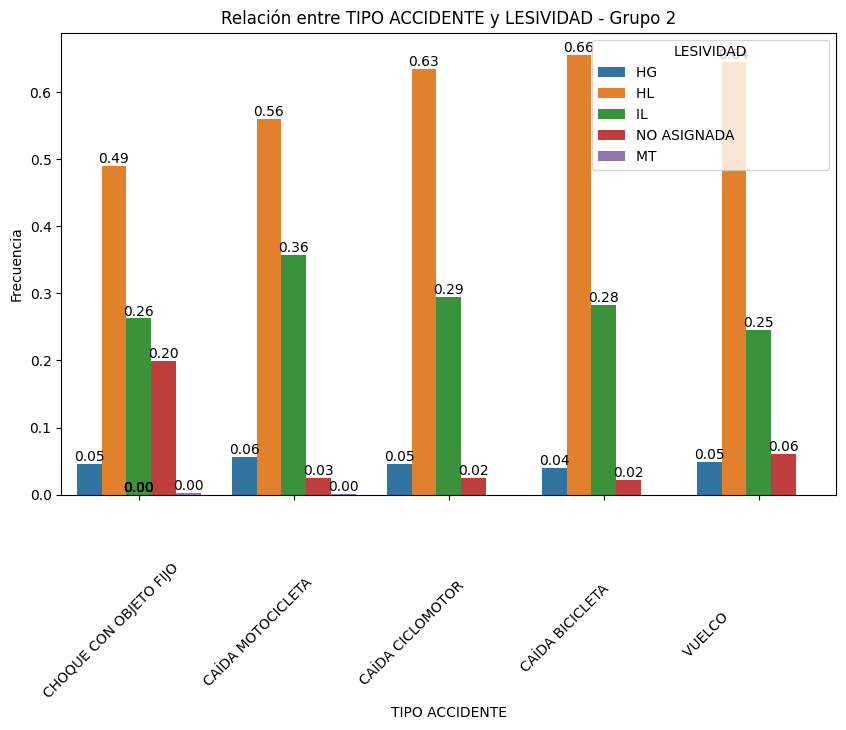

In [183]:
plot_categorical_relationship_fin(Accidentes_New,"TIPO ACCIDENTE","LESIVIDAD", relative_freq= True, show_values=True)

In [184]:
columnas = ["LESIVIDAD","TIPO ACCIDENTE","RANGO HORARIO"] 
col_directora = "TIPO ACCIDENTE"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in Accidentes_New[col_directora].unique():
    diccionario_multivariante[valor] = Accidentes_New.loc[Accidentes_New[col_directora] == valor,[col_2,col_1]] 

Respuesta ATROPELLO                               :


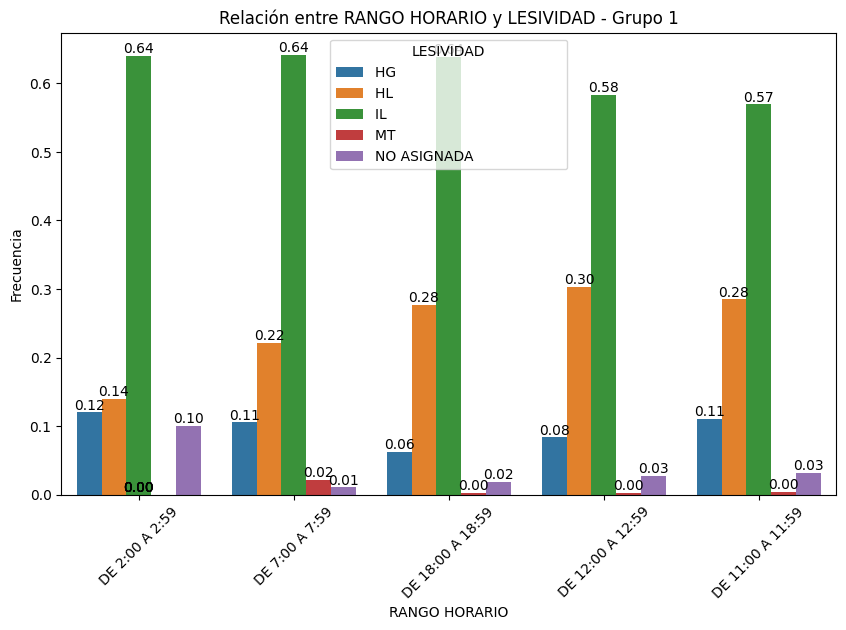

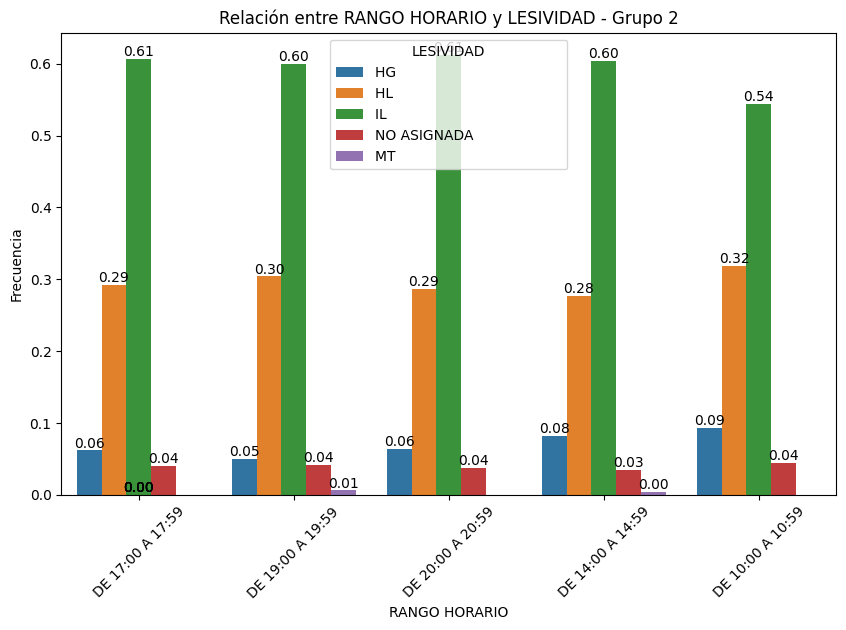

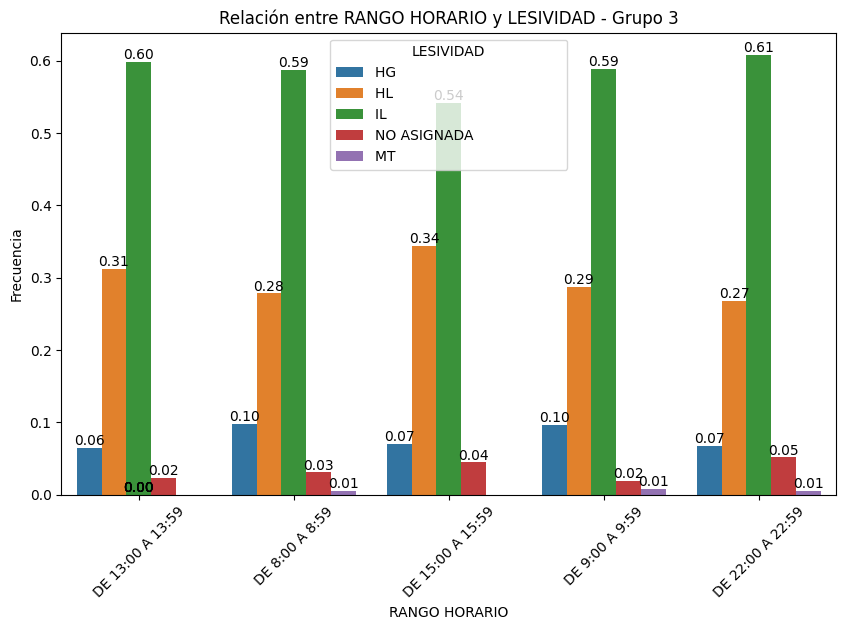

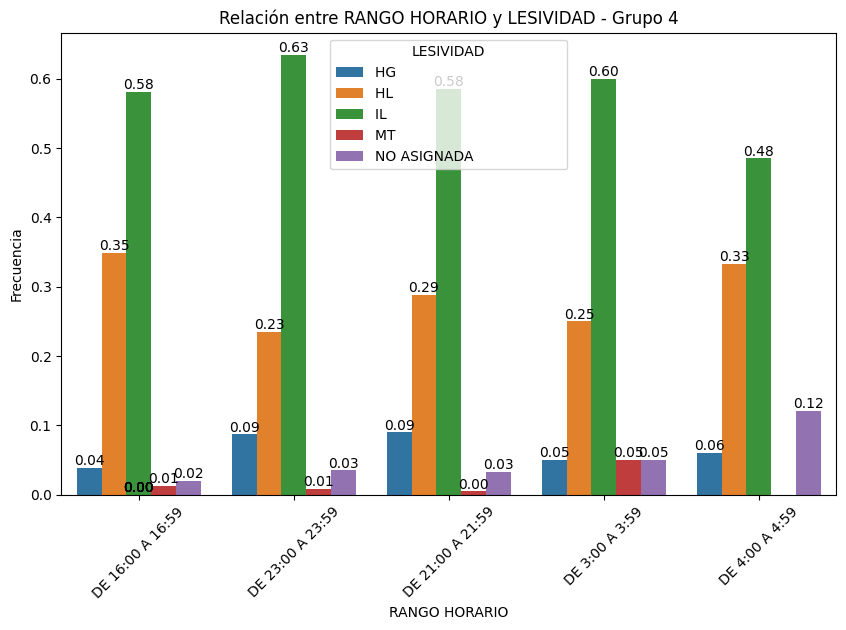

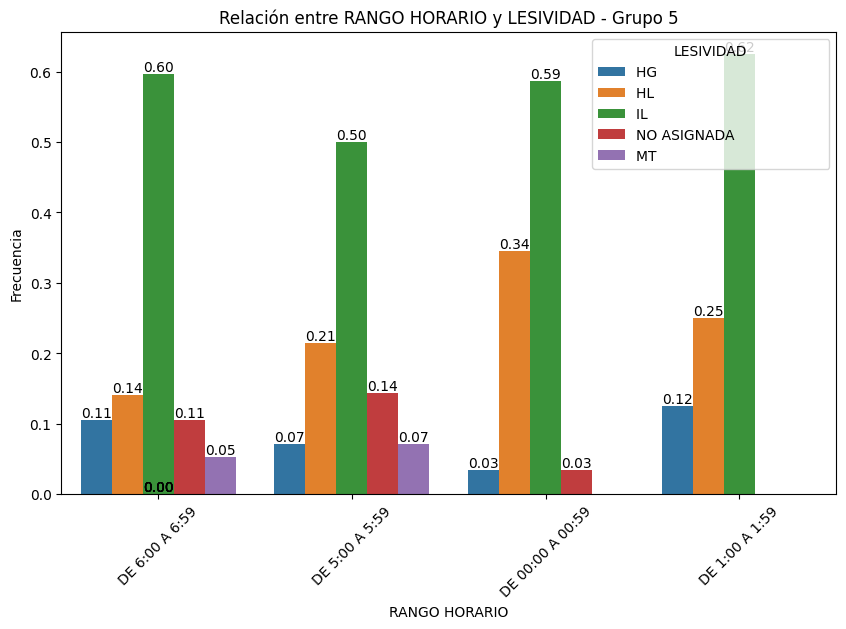

Respuesta OTRAS CAUSAS                            :


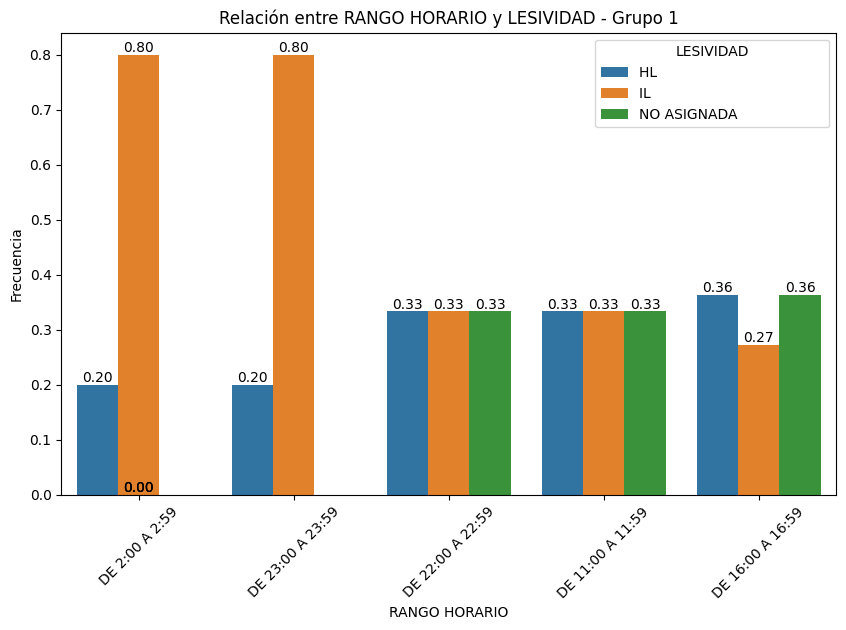

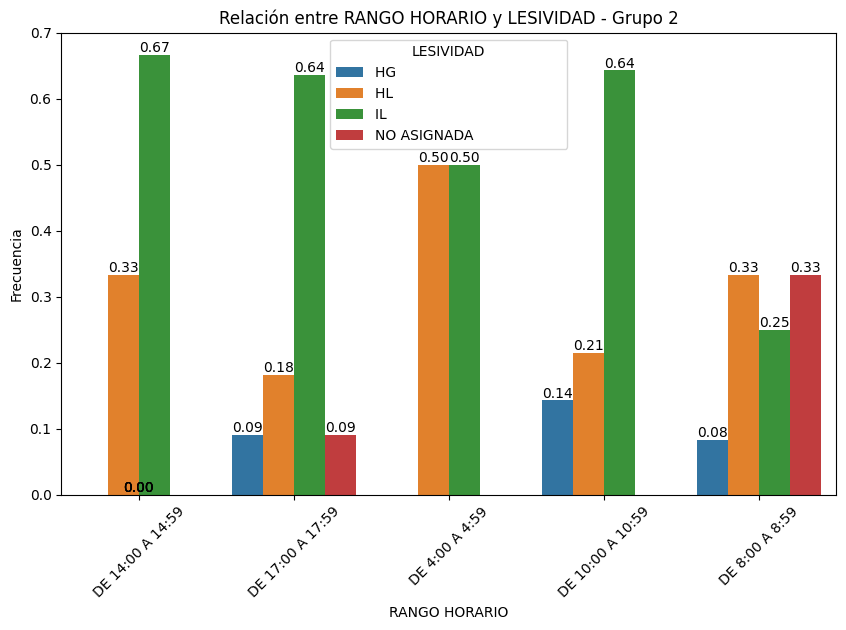

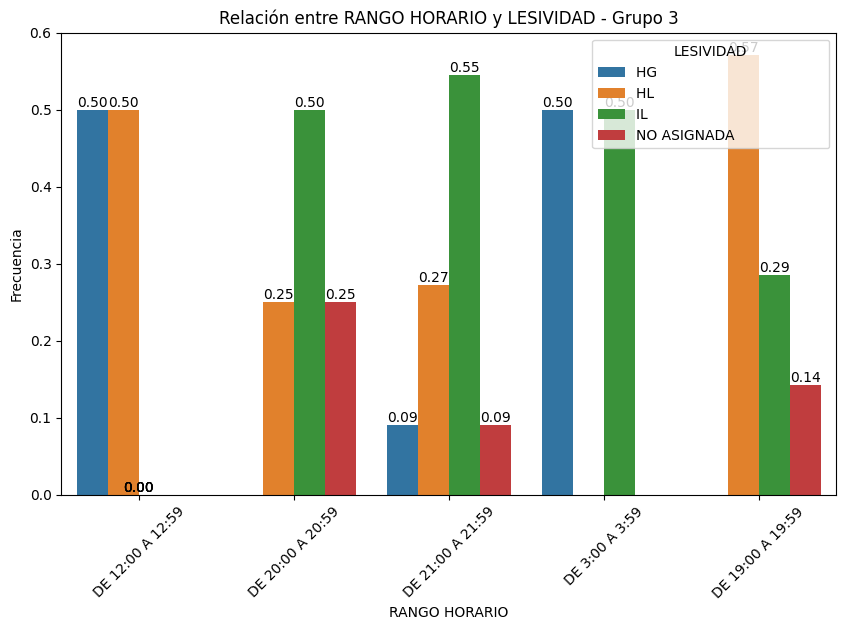

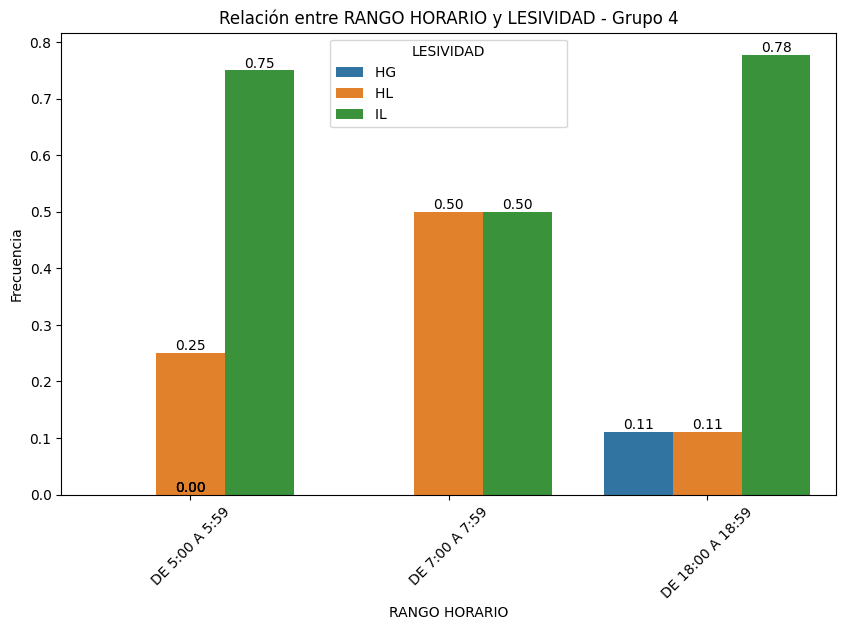

Respuesta COLISIÓN DOBLE                          :


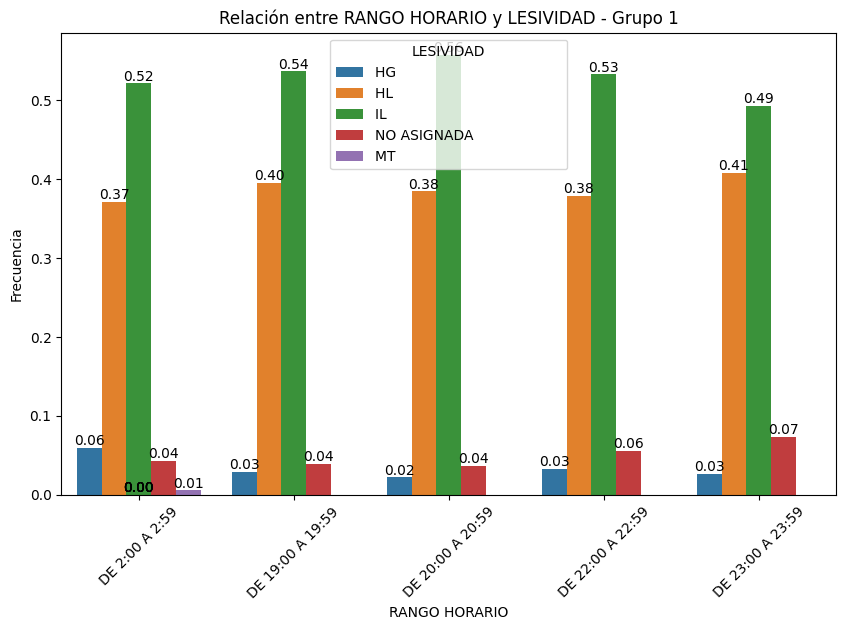

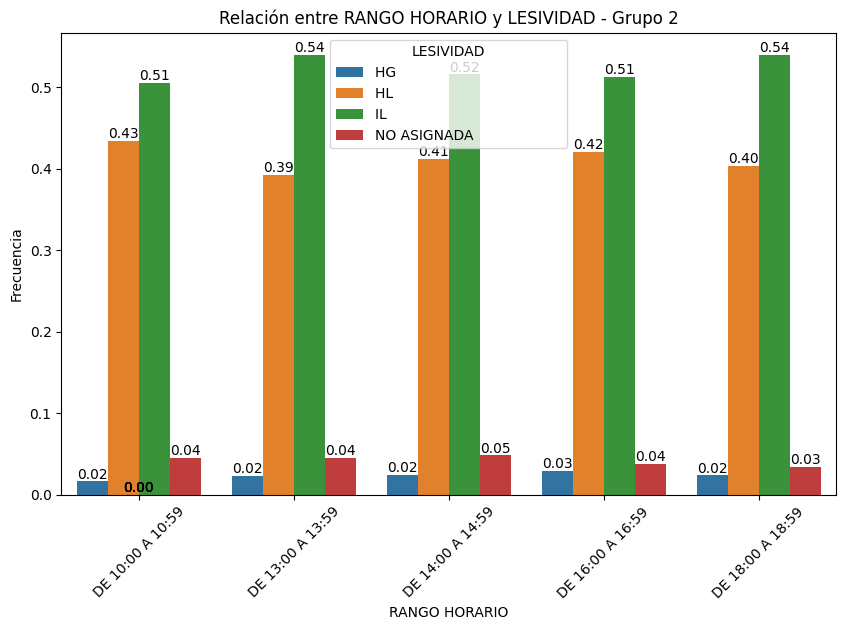

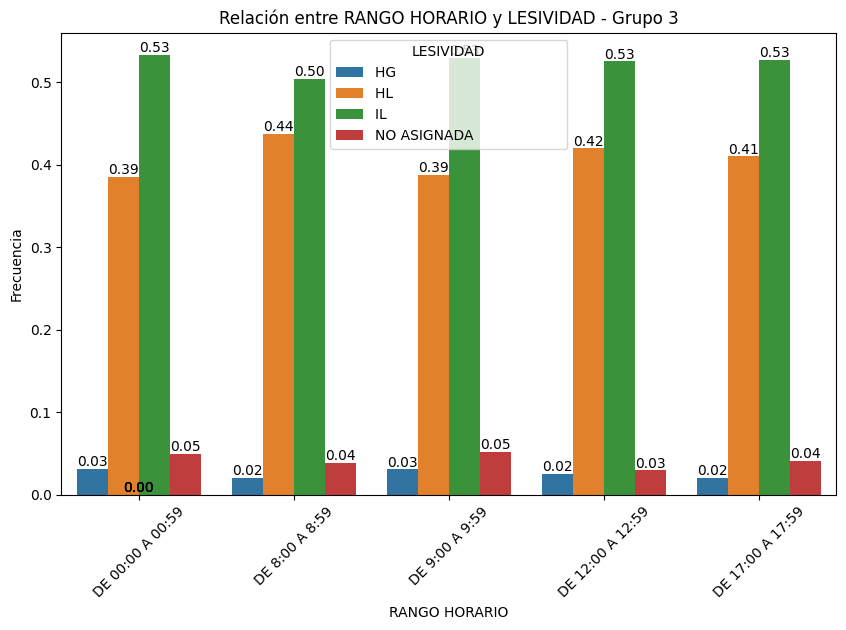

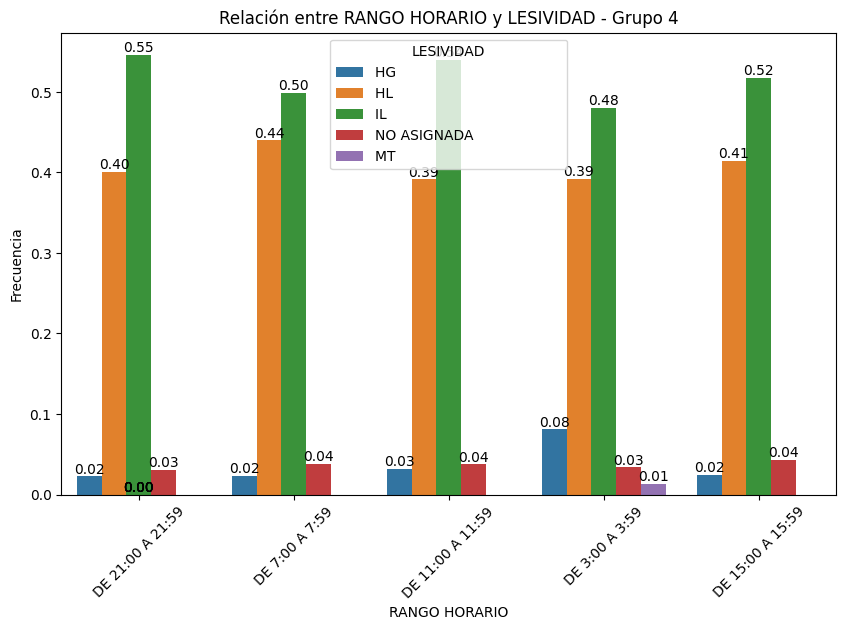

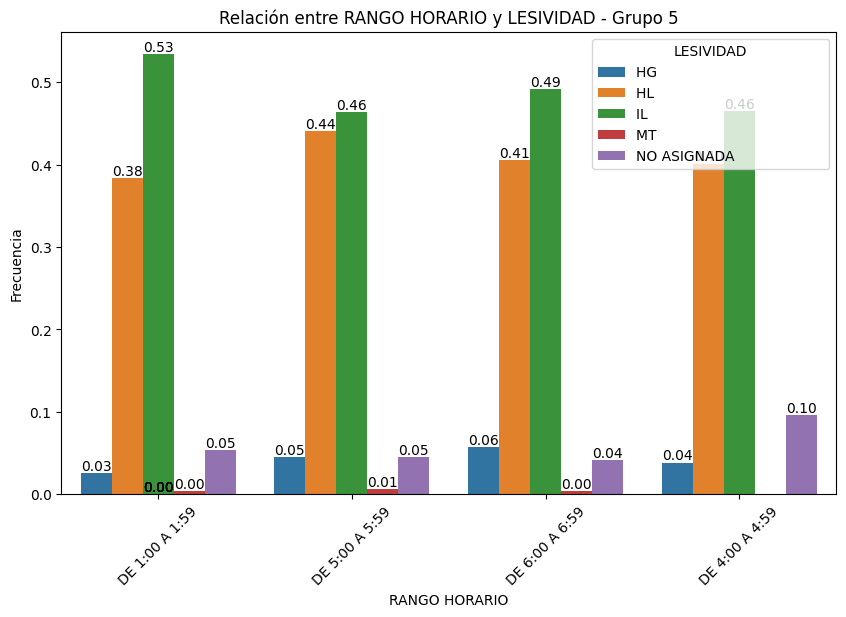

Respuesta COLISIÓN MÚLTIPLE                       :


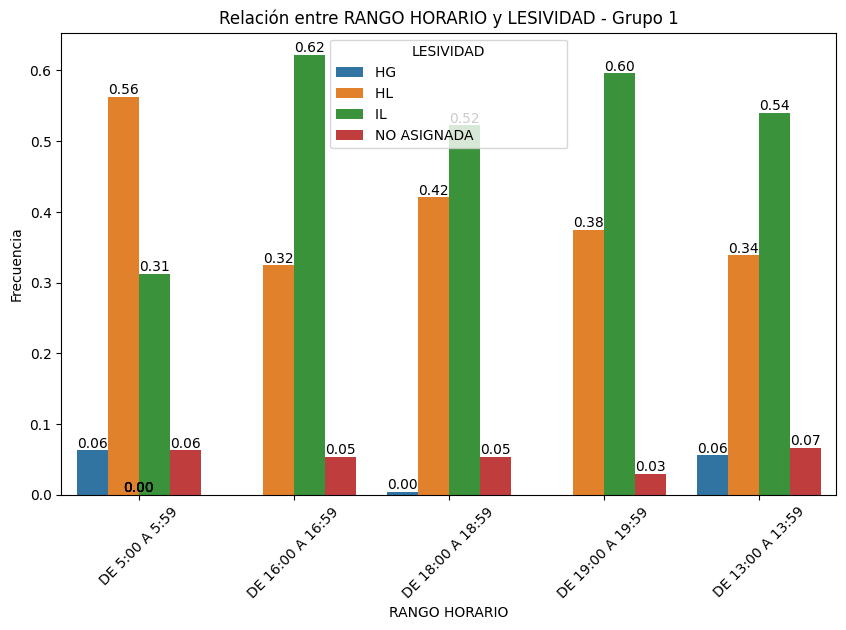

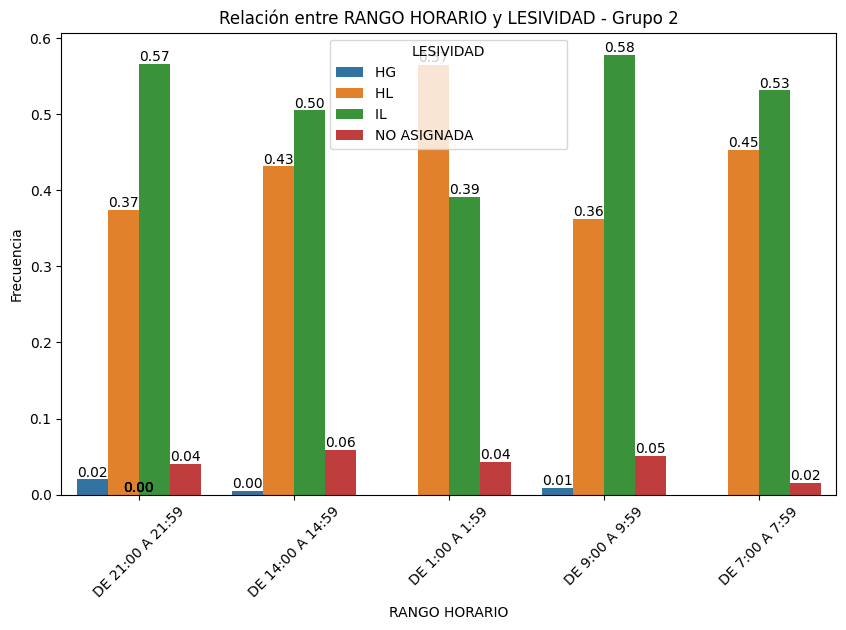

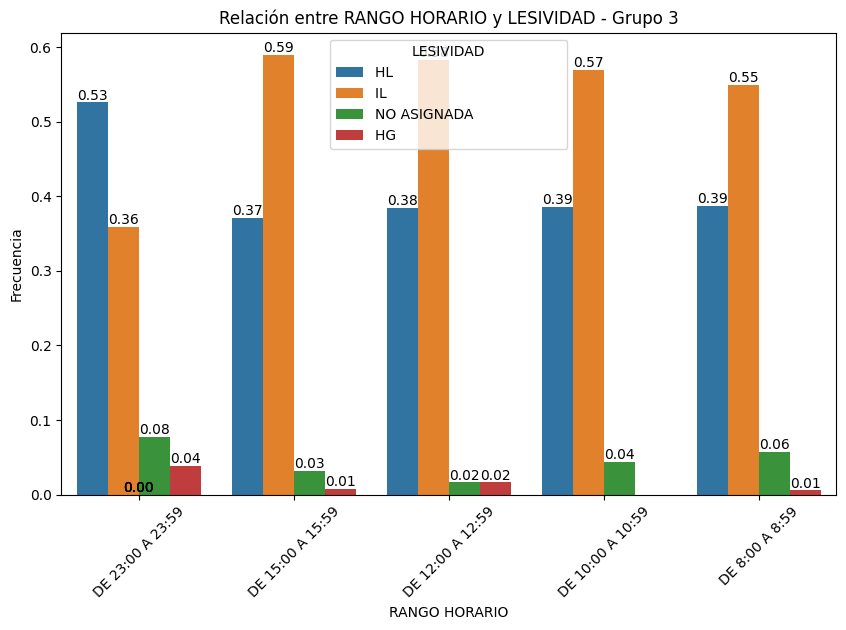

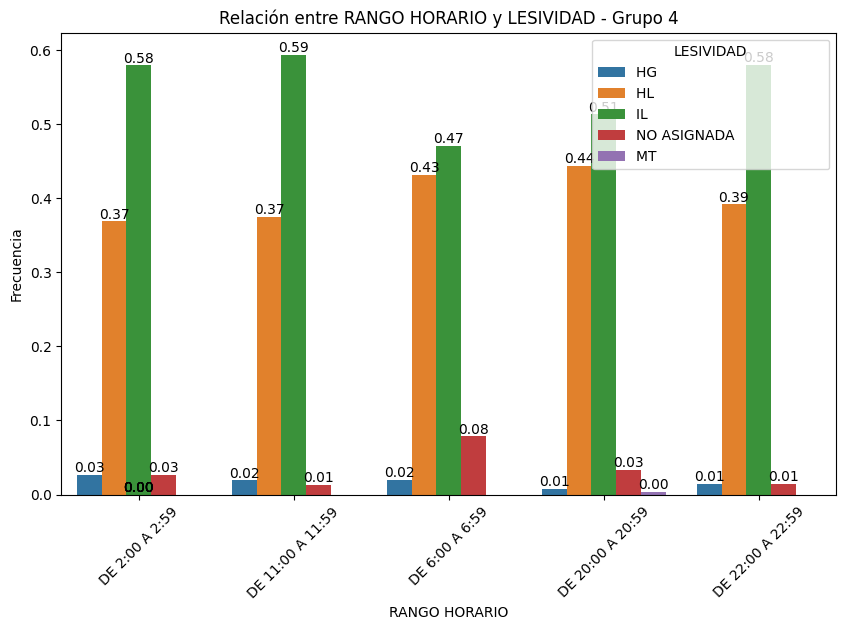

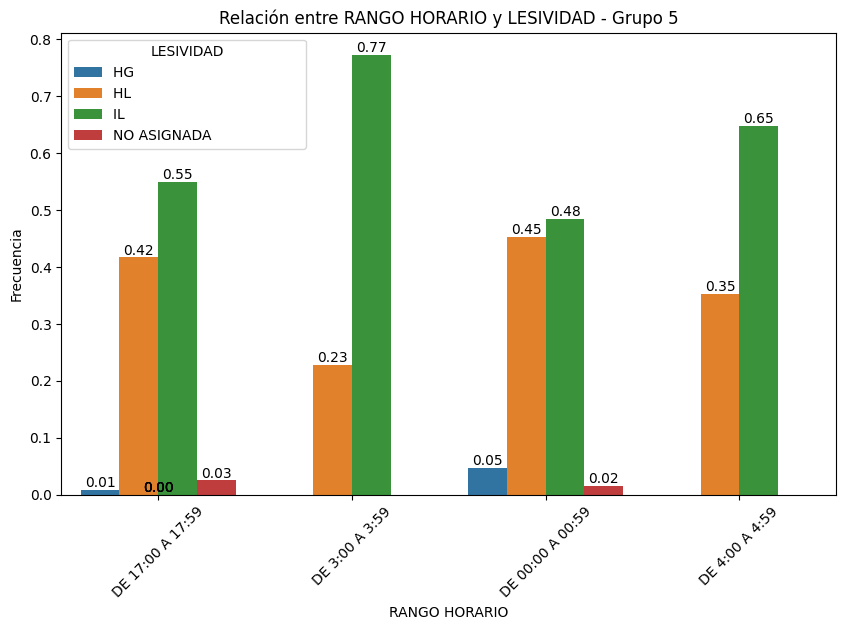

Respuesta CAÍDA VIAJERO BUS                       :


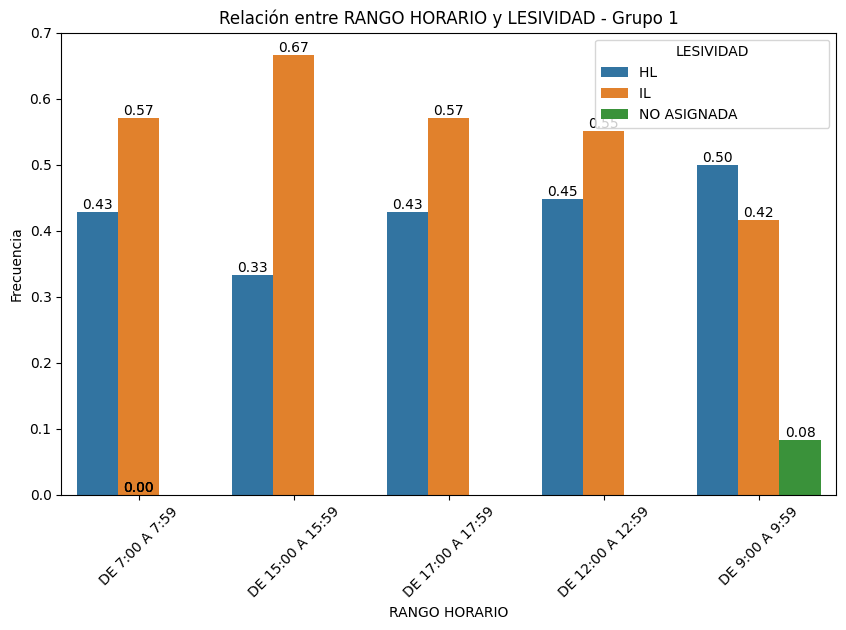

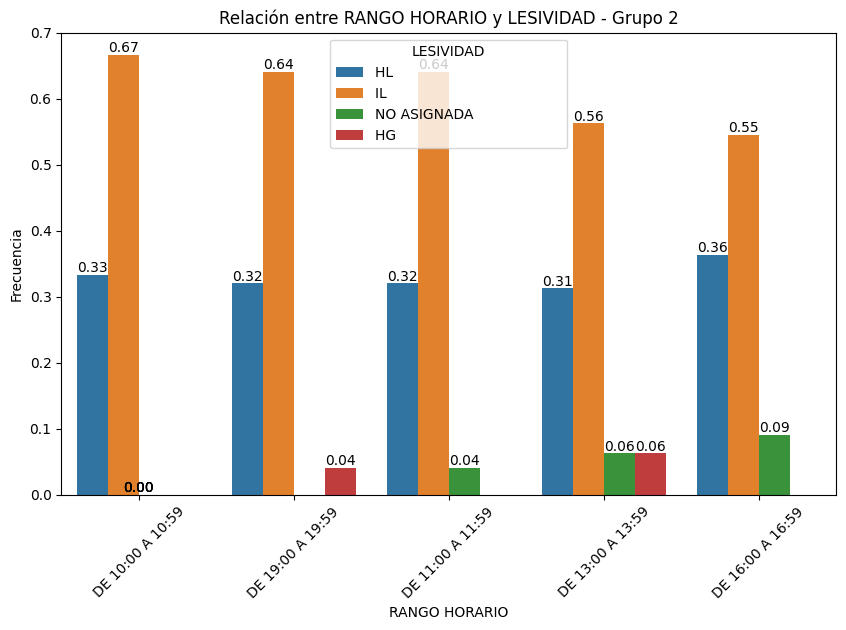

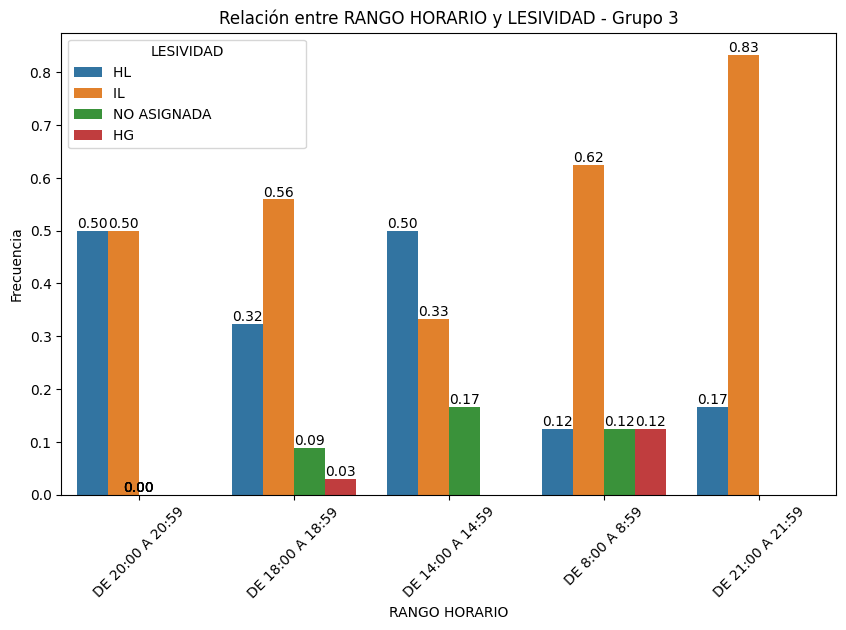

Respuesta CHOQUE CON OBJETO FIJO                  :


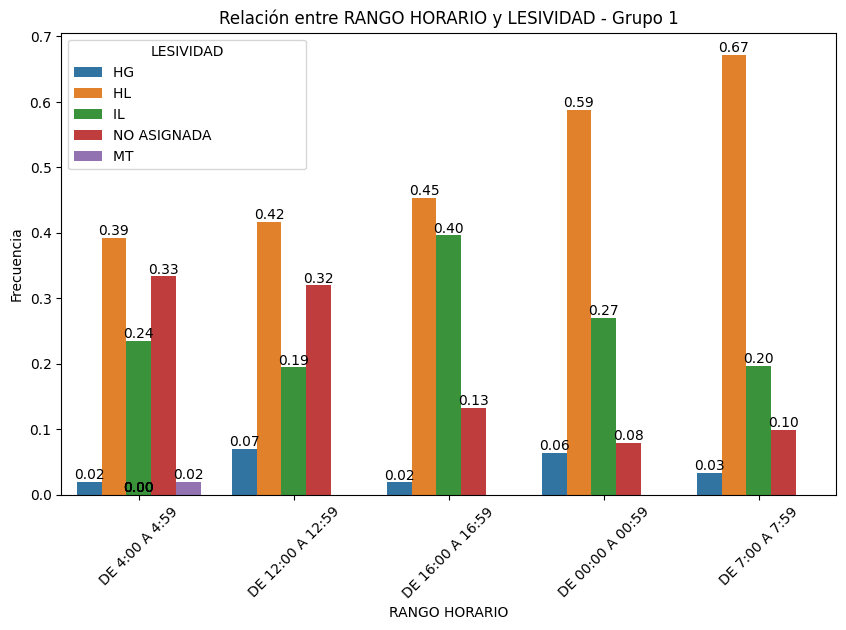

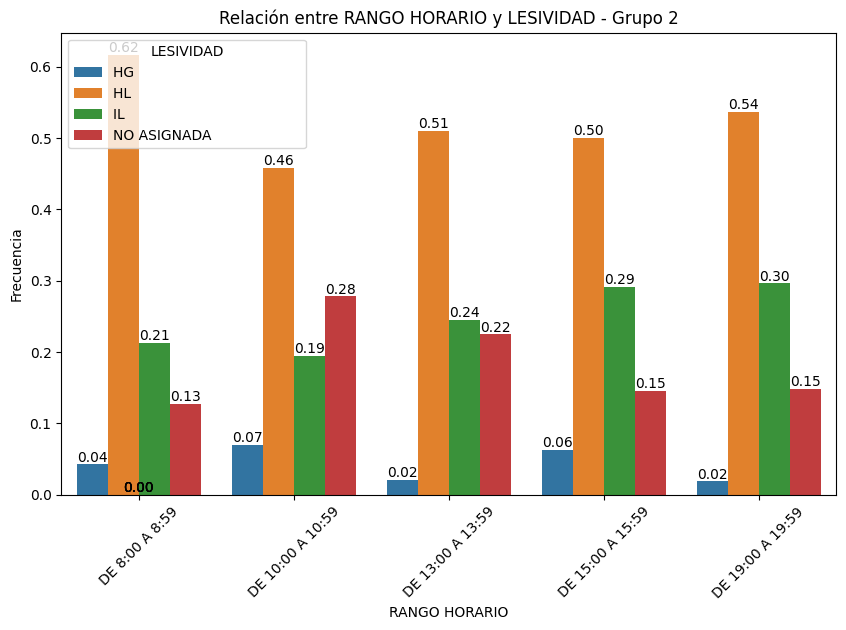

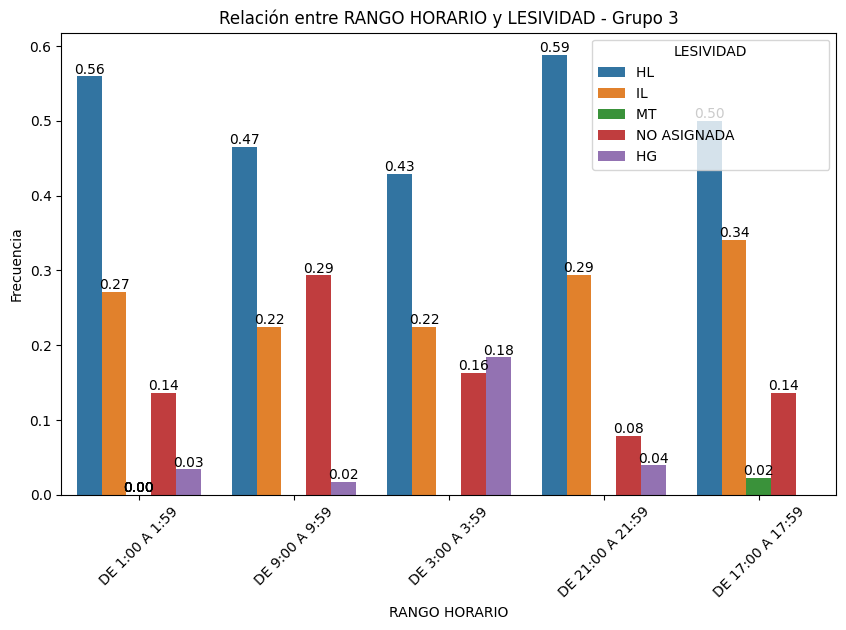

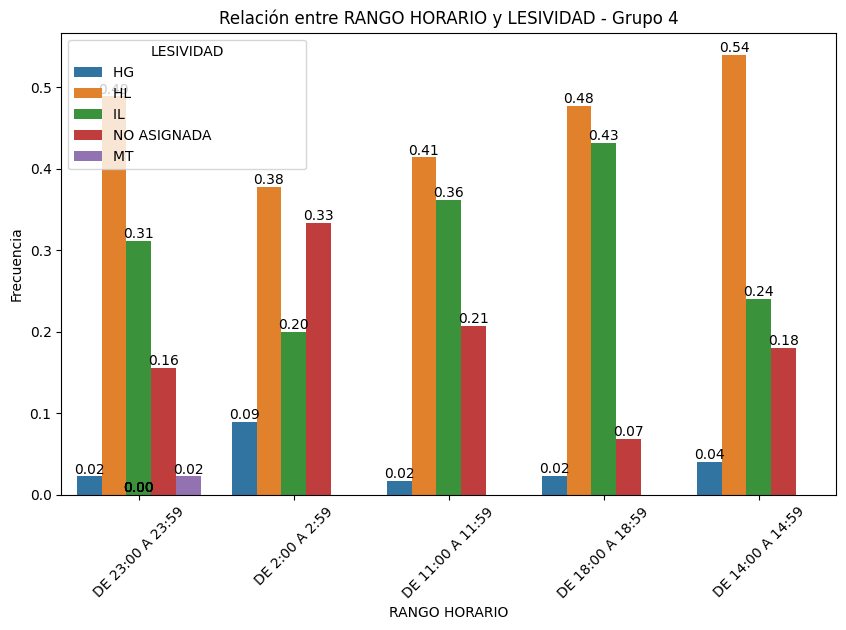

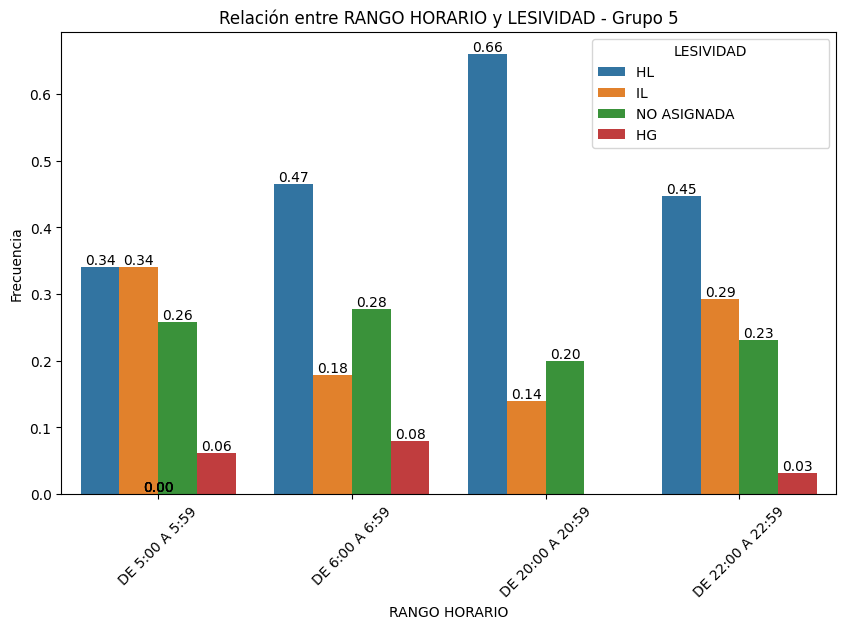

Respuesta CAÍDA MOTOCICLETA                       :


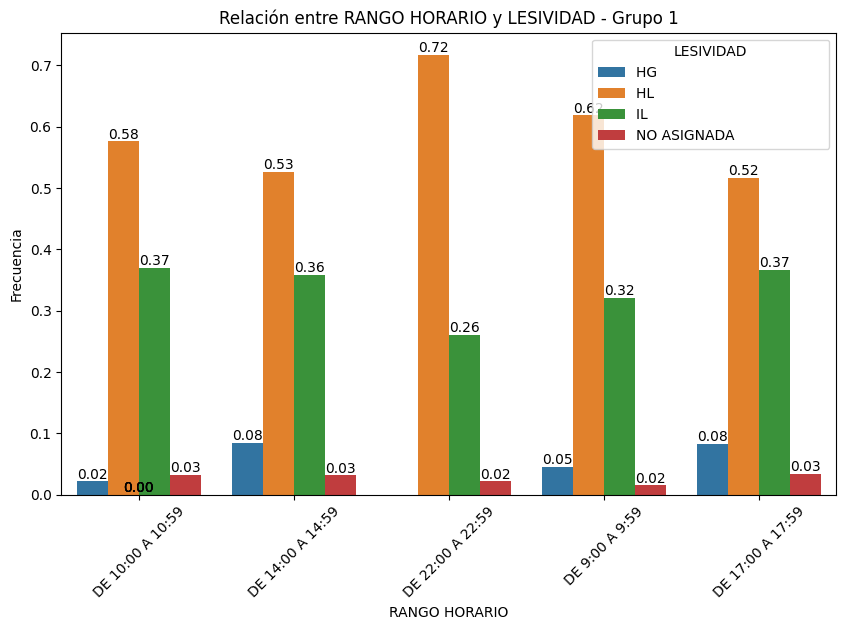

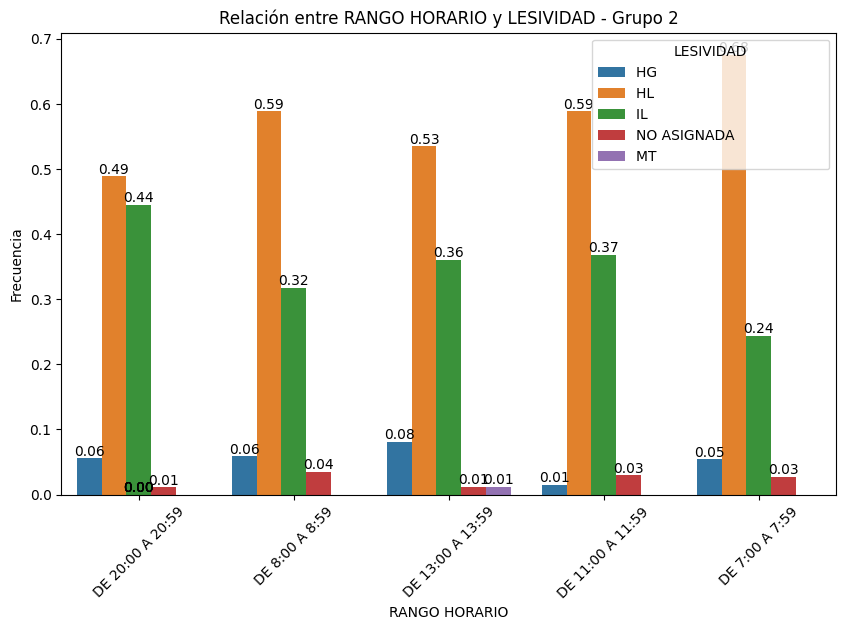

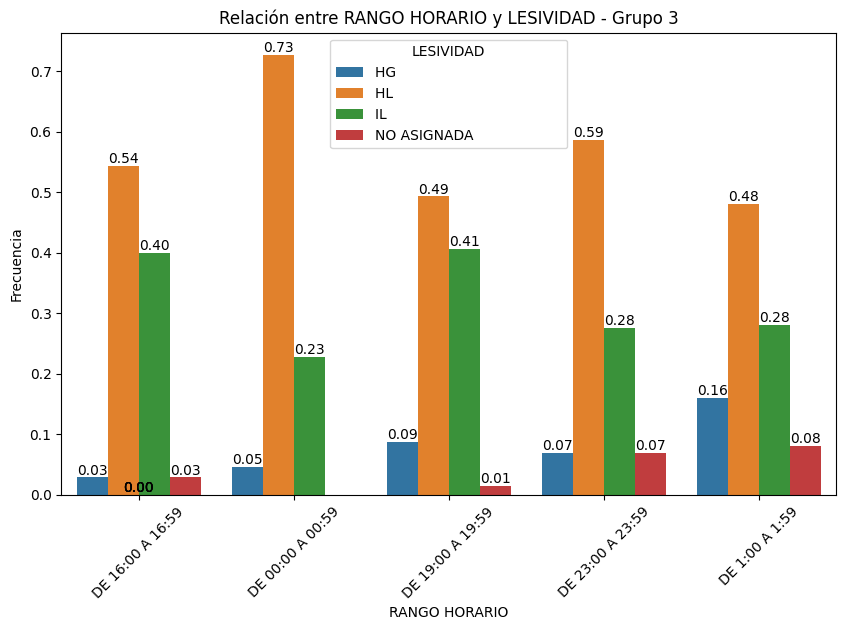

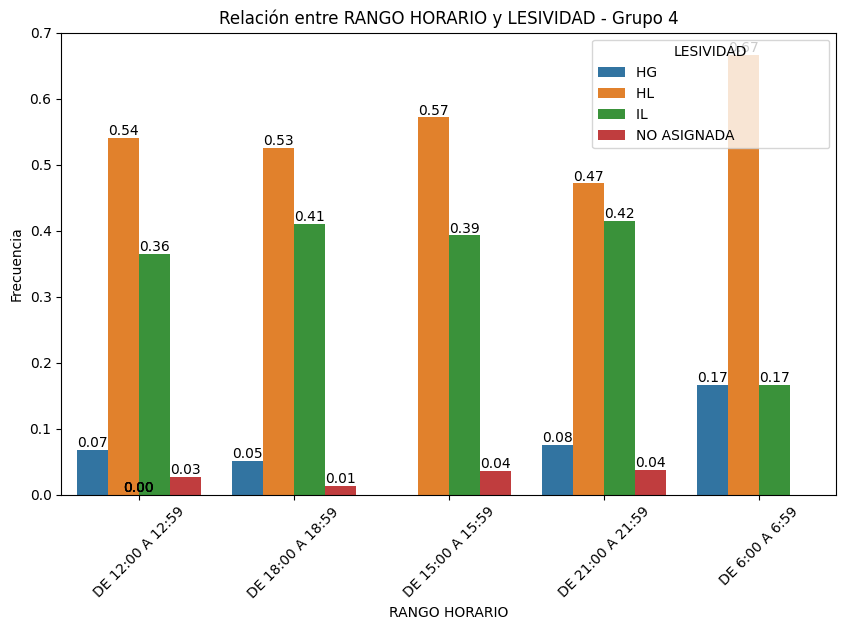

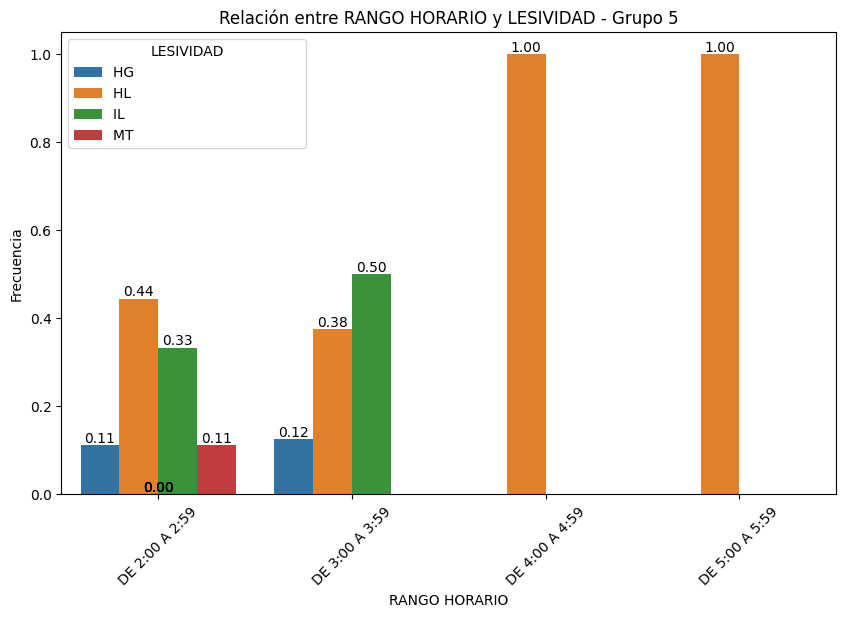

Respuesta CAÍDA CICLOMOTOR                        :


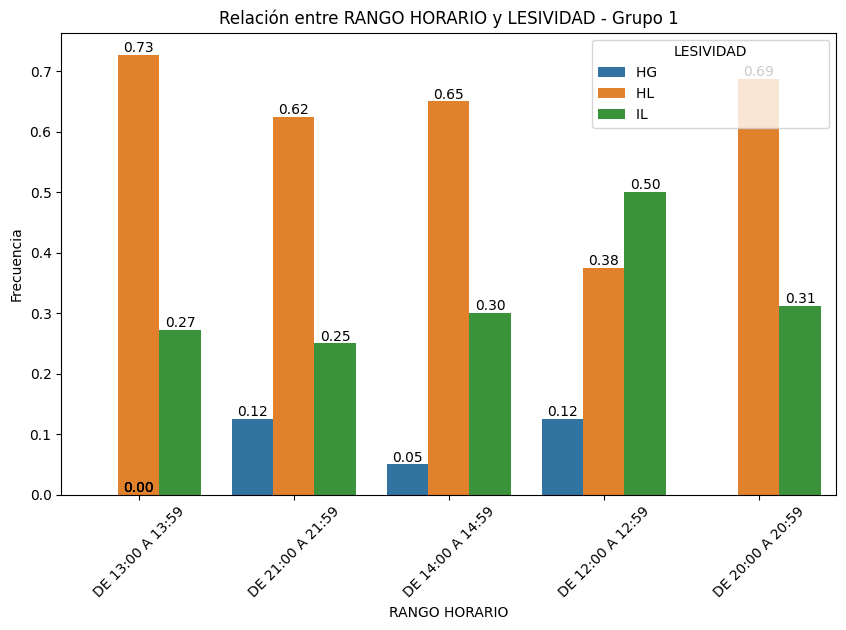

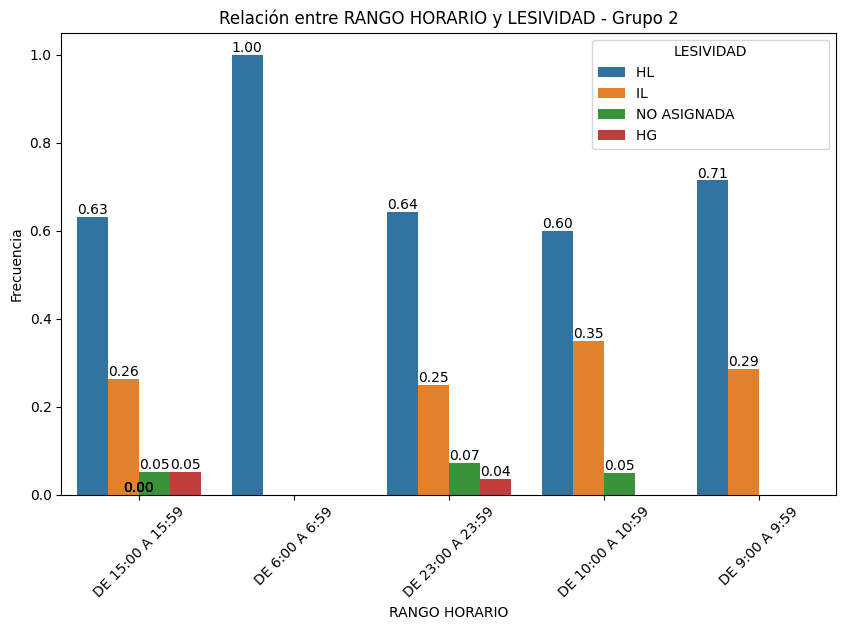

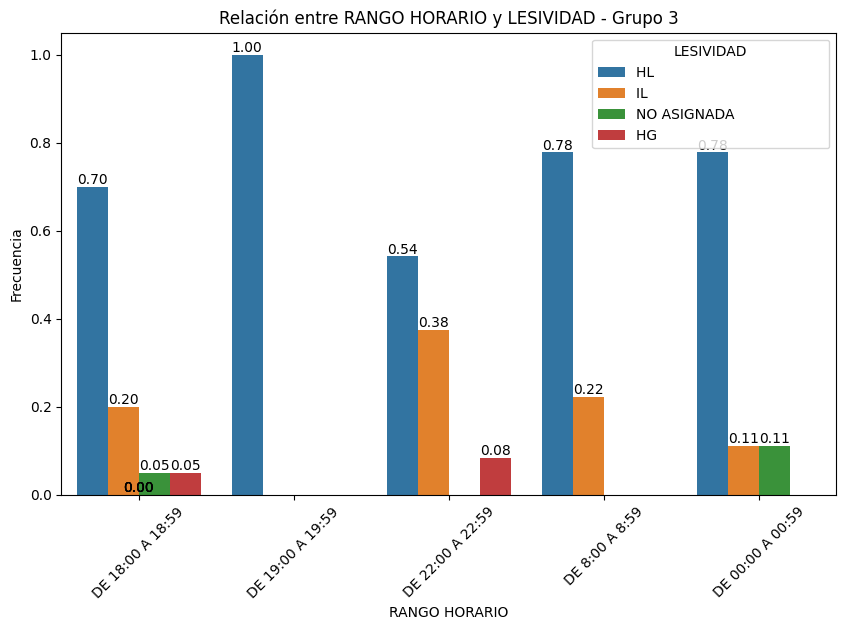

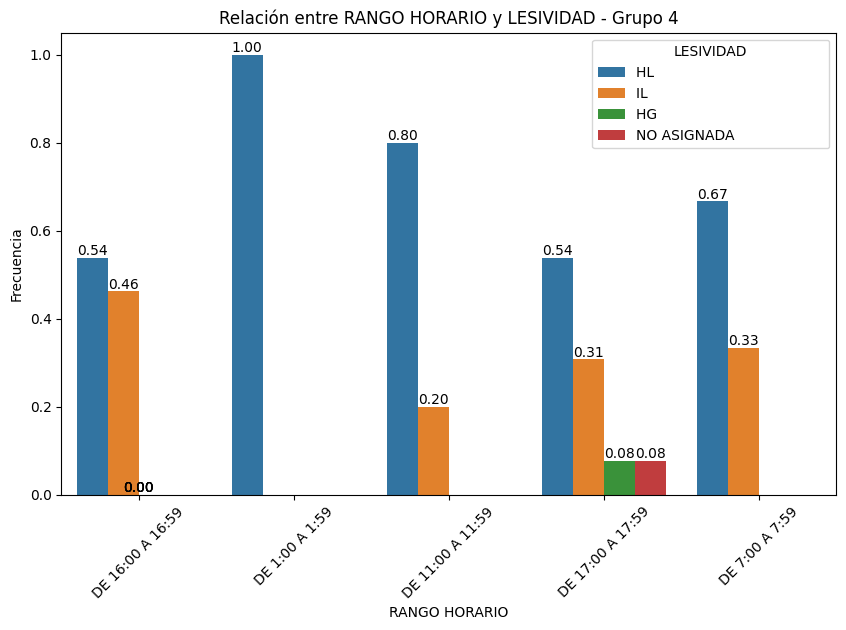

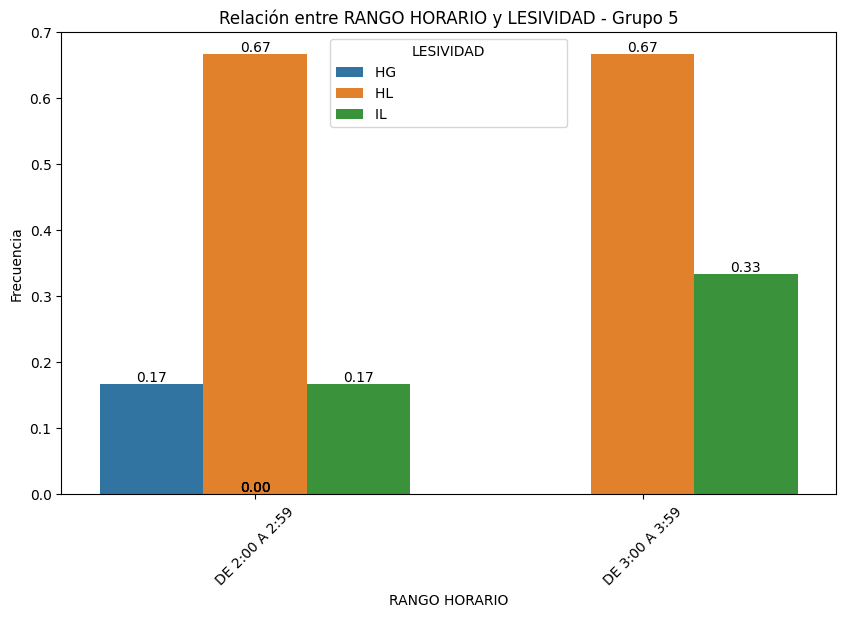

Respuesta CAÍDA BICICLETA                         :


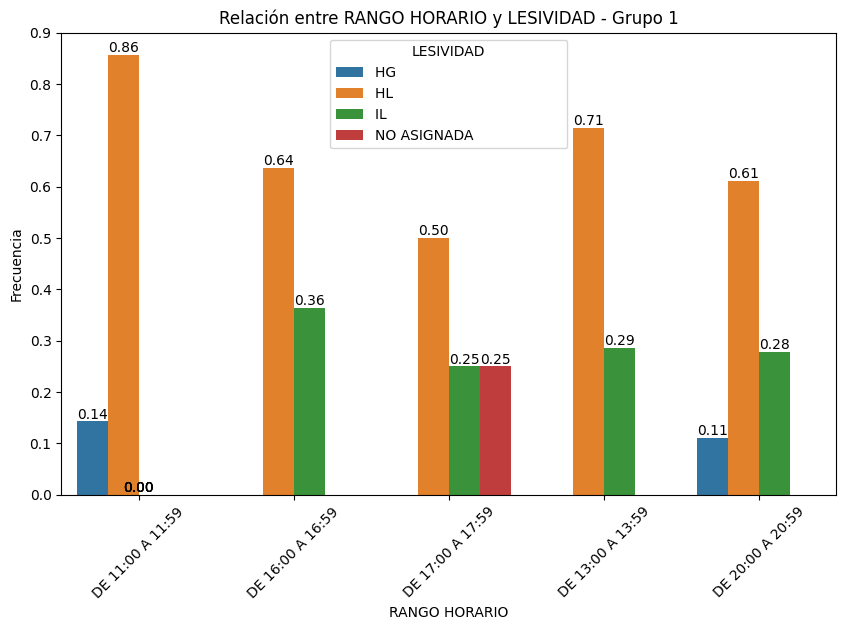

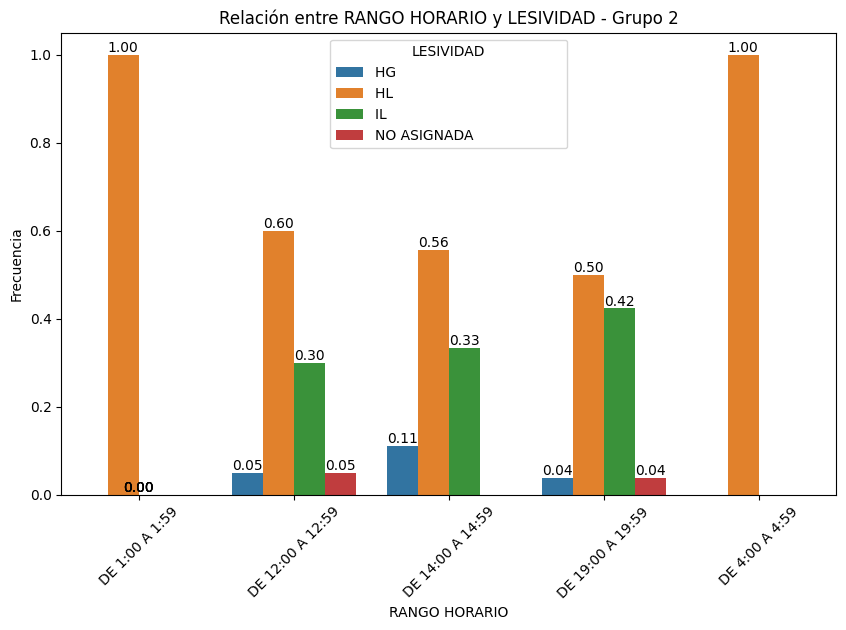

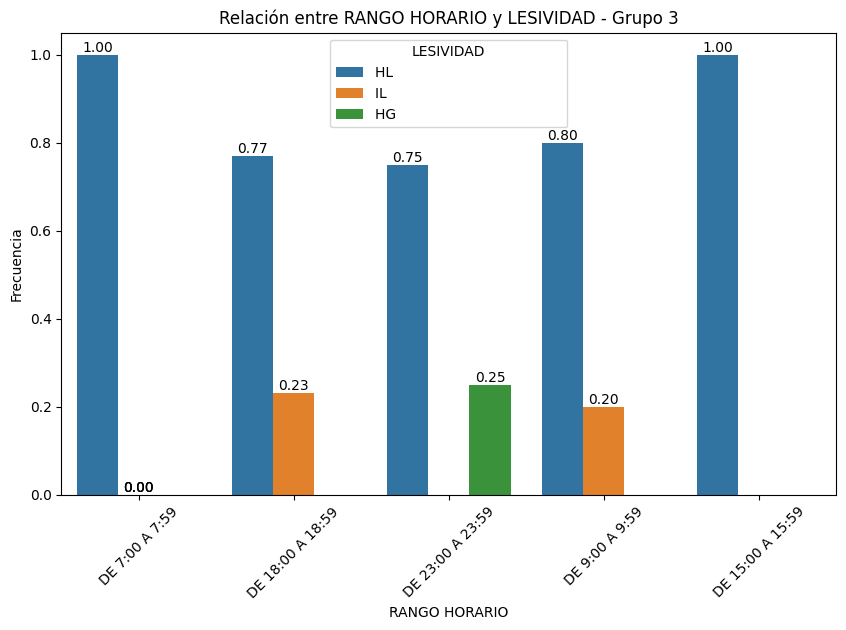

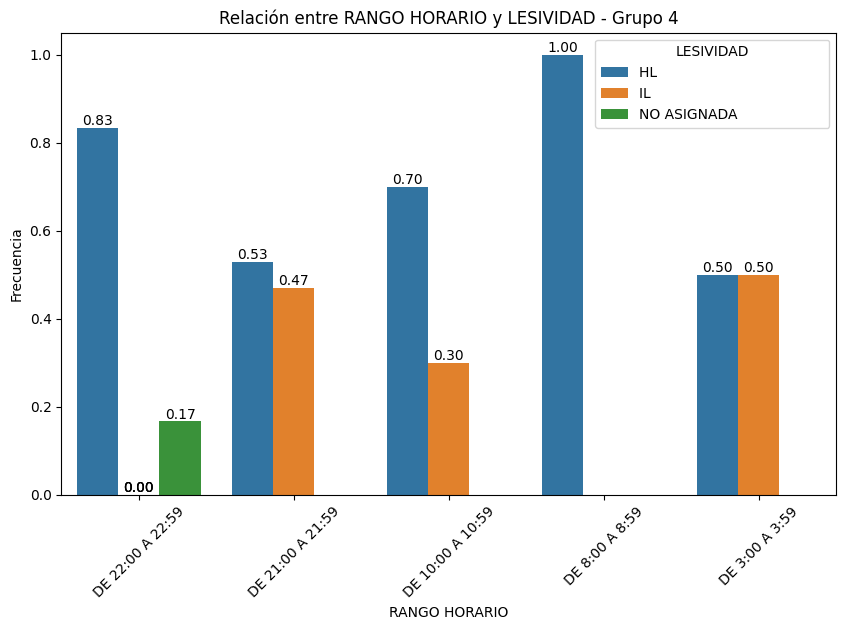

Respuesta VUELCO                                  :


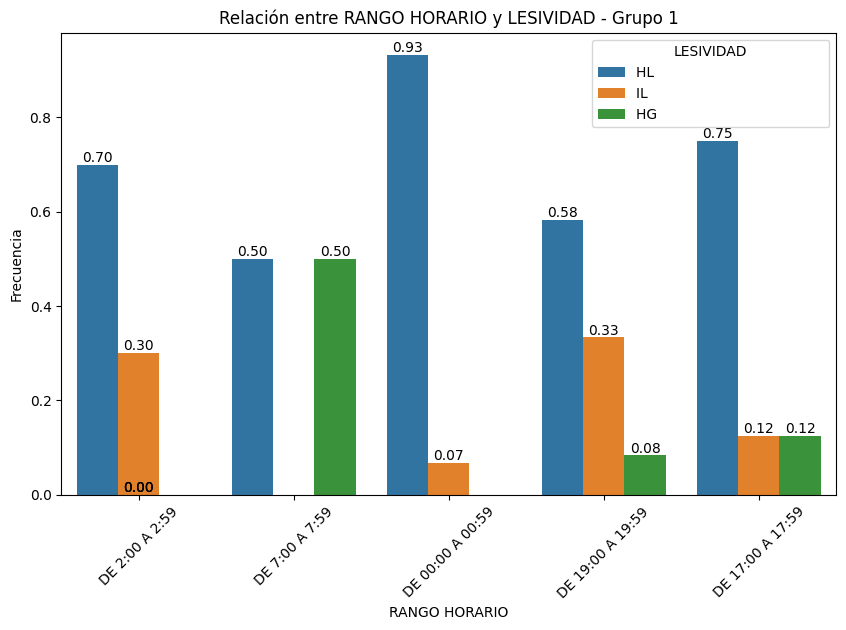

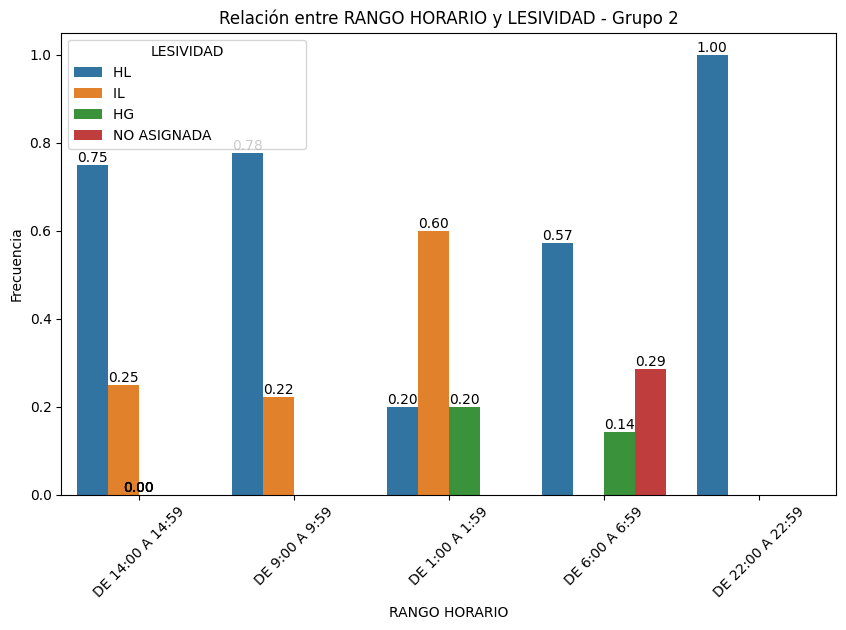

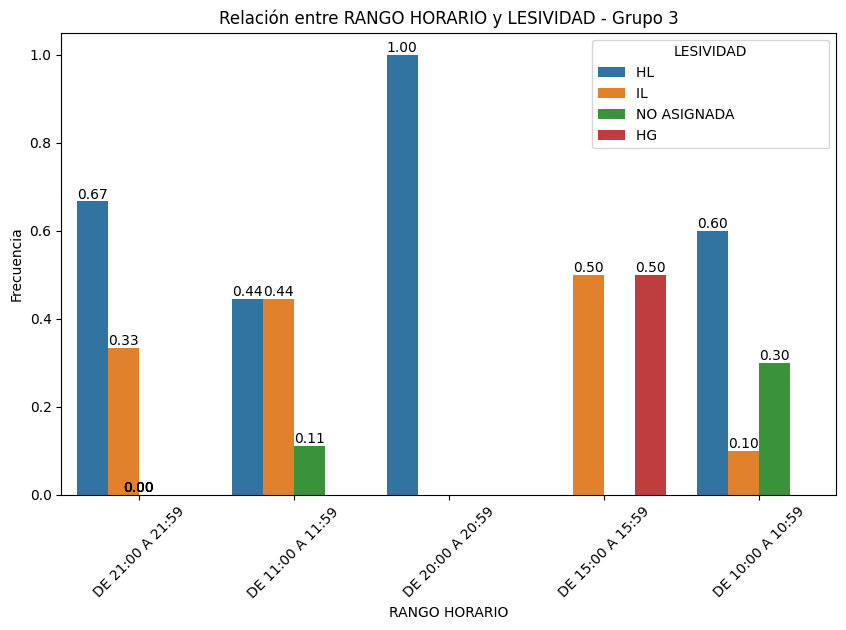

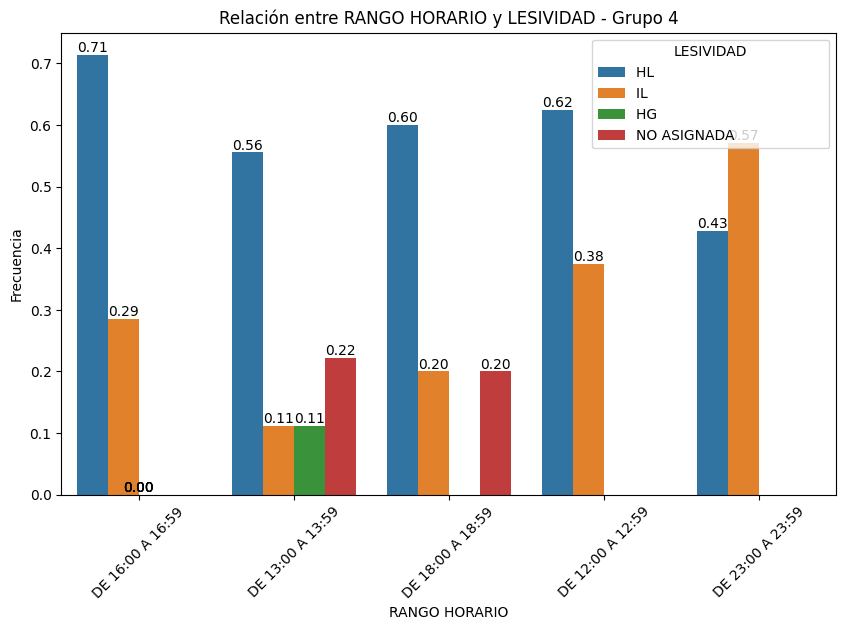

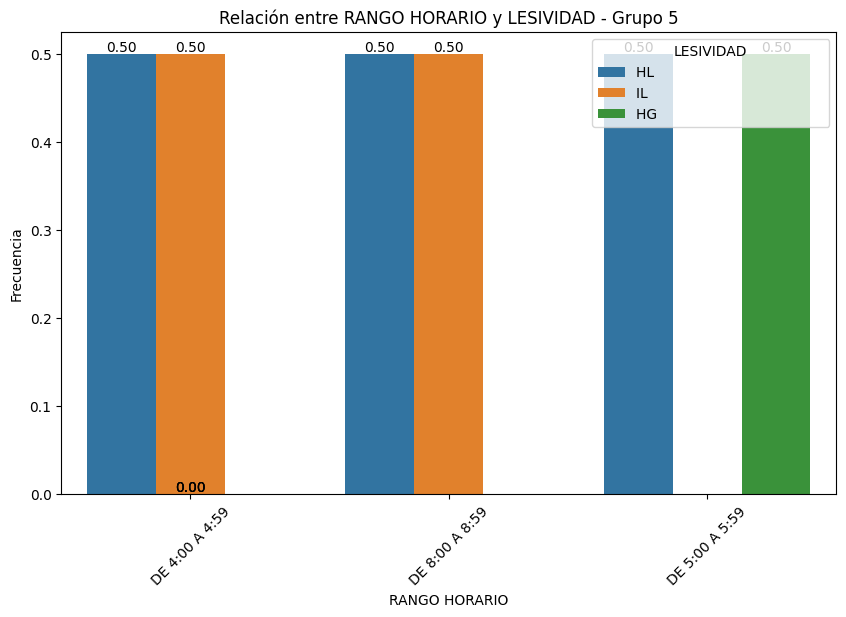

In [185]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

Responder las hipotesis 